# **Lending Club Loan Approval System**


# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

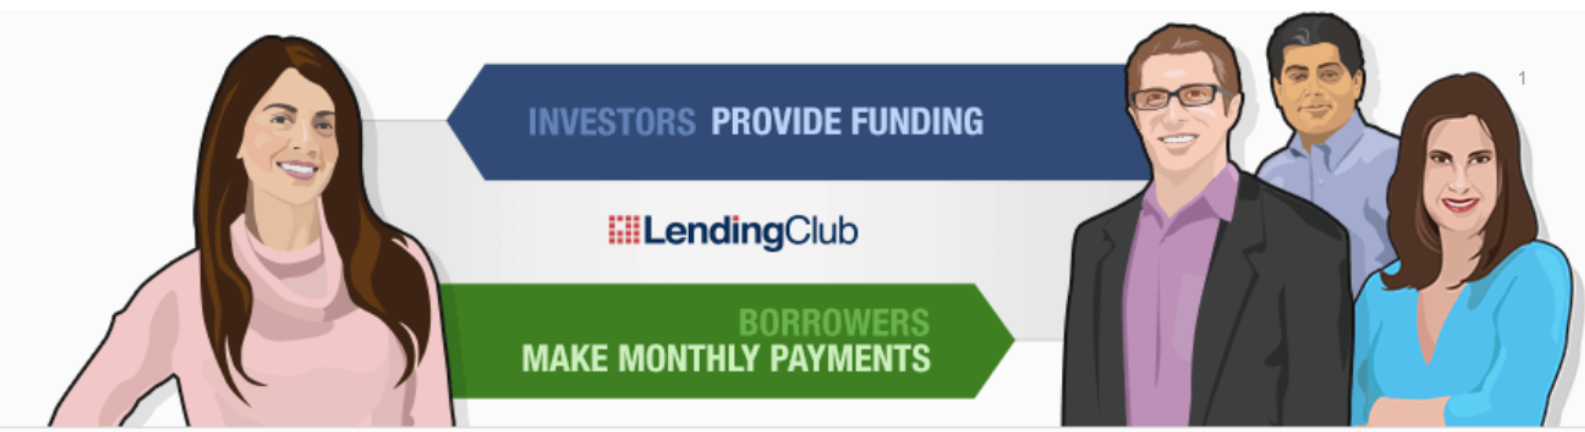

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [ ]:
# First, load the CSV files into dataframes using pandas.
# Type your code below.
from google.colab import files
uploaded = files.upload()

Saving loans.csv to loans (2).csv


In [ ]:
## Read the dataset
loan_data = pd.read_csv('loans.csv')
print(loan_data.head(100))
##loan_data.tail()

         id  member_id  loan_amnt        term int_rate  installment grade  \
0   1077501  1296599.0     5000.0   36 months   10.65%       162.87     B   
1   1077430  1314167.0     2500.0   60 months   15.27%        59.83     C   
2   1077175  1313524.0     2400.0   36 months   15.96%        84.33     C   
3   1076863  1277178.0    10000.0   36 months   13.49%       339.31     C   
4   1075269  1311441.0     5000.0   36 months    7.90%       156.46     A   
..      ...        ...        ...         ...      ...          ...   ...   
95  1034693  1264291.0    16000.0   60 months   17.58%       402.65     D   
96  1068508  1302906.0     6000.0   36 months    8.90%       190.52     A   
97  1066641  1300833.0     7200.0   36 months    9.91%       232.02     B   
98  1068315  1302930.0     9500.0   36 months    8.90%       301.66     A   
99  1068309  1302924.0    18825.0   60 months   16.77%       465.53     D   

   sub_grade emp_length home_ownership  annual_inc verification_status  \
0

In [ ]:
## Observe the first few rows
## Do you observe any issues?


1. The Member_id is supposed to be Integer but can see Decimal value for Member_id
2. int_rate is having the symbol % makes it Categorical, % needs to be dropped to make it Float
3. emp_length is categorical value with values example 10+years and <1 year needs to either 10 or 0 per definition of this column Integer.
4. revol_util is having the symbol % makes it Categorical, % needs to be dropped to make it Float
5. deling_2yrs is showing float but it is integer per definition of the column , so needs to be converted to Integer
6. inq_last_6mths is showing float but it is integer per definition of the column , so needs to be converted to Integer
7. open_acc is showing float but it is integer per definition of the column , so needs to be converted to Integer
8. pub_rec is showing float but it is integer per definition of the column , so needs to be converted to Integer
9. revol_bal is having the % character making it categorical, % needs to be dropped to make it Float
10.total_acc is showing float but it is integer per definition of the column , so needs to be converted to Integer
11. Term is showing with months but needs to be converted to Integer per definiton of the column

In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
from os import O_RDONLY
## information of floating columns from the Dataframe
loan_data.select_dtypes(include=['float64'])
print(loan_data.select_dtypes(include=['float64']).info(O_RDONLY))
loan_data.select_dtypes(include=['object']).info()
print(loan_data.select_dtypes(include=['object']).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   member_id        38770 non-null  float64
 1   loan_amnt        38770 non-null  float64
 2   installment      38770 non-null  float64
 3   annual_inc       38770 non-null  float64
 4   dti              38770 non-null  float64
 5   delinq_2yrs      38770 non-null  float64
 6   inq_last_6mths   38770 non-null  float64
 7   open_acc         38770 non-null  float64
 8   pub_rec          38770 non-null  float64
 9   revol_bal        38770 non-null  float64
 10  total_acc        38770 non-null  float64
 11  last_pymnt_amnt  38770 non-null  float64
dtypes: float64(12)
memory usage: 3.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  -

In [ ]:
## Check the shape- structure of the dataset
loan_data.shape


(38770, 23)

In [ ]:
## Check the missing values across the columns
loan_data.isnull().sum()


id                        0
member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1036
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

#### Observations

- Document your observations

##1.We have emp_length 1036 missing values denoting that some of the Loan _Seekers may not be employees where they are getting paid on a monthly basis, this should be replaced by the mean or dropped out for proper classification results.
##2.revol_util has 50 missing values denoting that borrower might not be using the credit on revolving basis and hence these 50 rows can be dropped from the dataframe.
##3.As per the information of the DataFrame we have only 1 integer Column, which is ID , Float datatype we have 12 columns,
 1   member_id    (Should have been actually Integer)    
 2   loan_amnt       
 3   installment      
 4   annual_inc       
 5   dti
 6   delinq_2yrs      
 7   inq_last_6mths   
 8   open_acc         
 9   pub_rec         
 10   revol_bal        
 11  total_acc        
 12  last_pymnt_amnt
Object - categorical values we have 10 columns and are as below as per the DataFrame
 0   term                 (Should have been Integer)
 1   int_rate             (Should have been Float)
 2   grade                
 3   sub_grade            
 4   emp_length           (Should have been Integer)
 5   home_ownership       
 6   verification_status  
 7   purpose              
 8   revol_util           (should have been Float)
 9   loan_status          

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [ ]:
## Write your code
## taking mean of the missing values
##print loan_data where emp_length is missing or Null
loan_data.isnull().sum()/len(loan_data)*100


id                     0.000000
member_id              0.000000
loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.672169
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
purpose                0.000000
dti                    0.000000
delinq_2yrs            0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.128966
total_acc              0.000000
last_pymnt_amnt        0.000000
loan_status            0.000000
dtype: float64

In [ ]:
## Write your code
## drop missing rows in columns emp_length and revol_util
loan_data.dropna(subset=['emp_length','revol_util'],inplace=True)
loan_data.isnull().sum()


id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_pymnt_amnt        0
loan_status            0
dtype: int64

## As the missing values percentage in columns emp_length and revol_util ==> is less than 5%, we can drop the rows instead of imputing them with Mean/Median and or Mode(for Categorical) of the particular column in question


In [ ]:
##remove the % symbol from columns revol_util, int_rate
loan_data['revol_util']=loan_data['revol_util'].str.replace('%','')
loan_data['int_rate']=loan_data['int_rate'].str.replace('%','')
##loan_data.head()
## Convert int_rate and revol_util from Object to float
loan_data['revol_util']=loan_data['revol_util'].astype(float)
loan_data['int_rate']=loan_data['int_rate'].astype(float)


In [ ]:
##And remove months from the term column to make it integer
loan_data['term']=loan_data['term'].str.replace('months','')
loan_data['term']=loan_data['term'].astype(int)

for column in loan_data.columns:
  if loan_data[column].dtype == 'object':
     print(f"Value counts for column '{column}':")
     print(loan_data[column].value_counts())
     print("\n")

Value counts for column 'grade':
grade
B    11408
A     9666
C     7701
D     4999
E     2645
F      970
G      298
Name: count, dtype: int64


Value counts for column 'sub_grade':
sub_grade
A4    2792
B3    2767
A5    2640
B5    2569
B4    2397
C1    2022
B2    1950
C2    1904
A3    1741
B1    1725
C3    1464
A2    1441
D2    1261
C4    1184
C5    1127
D3    1097
A1    1052
D4     913
D1     911
D5     817
E1     718
E2     607
E3     510
E4     425
E5     385
F1     303
F2     232
F3     175
F4     149
F5     111
G1      92
G2      76
G4      54
G3      46
G5      30
Name: count, dtype: int64


Value counts for column 'emp_length':
emp_length
10+ years    8546
< 1 year     4515
2 years      4303
3 years      4022
4 years      3355
5 years      3205
1 year       3177
6 years      2178
7 years      1715
8 years      1442
9 years      1229
Name: count, dtype: int64


Value counts for column 'home_ownership':
home_ownership
RENT        18117
MORTGAGE    16690
OWN          2781
OTHER     

## All above columns looks Good except for emp_length where we will replace the 10+ years to 10 and < 1 year to 0 per the problem statement requirement given.



In [ ]:
##and remove years from emp_length values to make it integer.
loan_data['emp_length']=loan_data['emp_length'].str.replace('+','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('< 1','0')
loan_data['emp_length']=loan_data['emp_length'].str.replace('years','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('year','')
for column in loan_data.columns:
  if loan_data[column].dtype == 'object':
     print(f"Value counts for column '{column}':")
     print(loan_data[column].value_counts())
     print("\n")

loan_data['emp_length']=loan_data['emp_length'].astype(int)


Value counts for column 'grade':
grade
B    11408
A     9666
C     7701
D     4999
E     2645
F      970
G      298
Name: count, dtype: int64


Value counts for column 'sub_grade':
sub_grade
A4    2792
B3    2767
A5    2640
B5    2569
B4    2397
C1    2022
B2    1950
C2    1904
A3    1741
B1    1725
C3    1464
A2    1441
D2    1261
C4    1184
C5    1127
D3    1097
A1    1052
D4     913
D1     911
D5     817
E1     718
E2     607
E3     510
E4     425
E5     385
F1     303
F2     232
F3     175
F4     149
F5     111
G1      92
G2      76
G4      54
G3      46
G5      30
Name: count, dtype: int64


Value counts for column 'emp_length':
emp_length
10     8546
0      4515
2      4303
3      4022
4      3355
5      3205
1      3177
6      2178
7      1715
8      1442
9      1229
Name: count, dtype: int64


Value counts for column 'home_ownership':
home_ownership
RENT        18117
MORTGAGE    16690
OWN          2781
OTHER          96
NONE            3
Name: count, dtype: int64


Value counts

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37687 non-null  int64  
 1   member_id            37687 non-null  float64
 2   loan_amnt            37687 non-null  float64
 3   term                 37687 non-null  int64  
 4   int_rate             37687 non-null  float64
 5   installment          37687 non-null  float64
 6   grade                37687 non-null  object 
 7   sub_grade            37687 non-null  object 
 8   emp_length           37687 non-null  int64  
 9   home_ownership       37687 non-null  object 
 10  annual_inc           37687 non-null  float64
 11  verification_status  37687 non-null  object 
 12  purpose              37687 non-null  object 
 13  dti                  37687 non-null  float64
 14  delinq_2yrs          37687 non-null  float64
 15  inq_last_6mths       37687 non-null  floa

In [ ]:
## Converting member_id, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc from float to integer
loan_data['member_id']=loan_data['member_id'].astype(int)
loan_data['delinq_2yrs']=loan_data['delinq_2yrs'].astype(int)
loan_data['inq_last_6mths']=loan_data['inq_last_6mths'].astype(int)
loan_data['open_acc']=loan_data['open_acc'].astype(int)
loan_data['pub_rec']=loan_data['pub_rec'].astype(int)
loan_data['total_acc']=loan_data['total_acc'].astype(int)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37687 non-null  int64  
 1   member_id            37687 non-null  int64  
 2   loan_amnt            37687 non-null  float64
 3   term                 37687 non-null  int64  
 4   int_rate             37687 non-null  float64
 5   installment          37687 non-null  float64
 6   grade                37687 non-null  object 
 7   sub_grade            37687 non-null  object 
 8   emp_length           37687 non-null  int64  
 9   home_ownership       37687 non-null  object 
 10  annual_inc           37687 non-null  float64
 11  verification_status  37687 non-null  object 
 12  purpose              37687 non-null  object 
 13  dti                  37687 non-null  float64
 14  delinq_2yrs          37687 non-null  int64  
 15  inq_last_6mths       37687 non-null  int6

In [ ]:
#Saving the id and member id
loan_id = loan_data['id']
loan_member_id = loan_data['member_id']


In [ ]:
#extract data for member_id=416195
loan_data[loan_data['member_id']==416195]

id  member_id  loan_amnt  term  int_rate  installment grade  \
30592  494000     416195     3000.0    36     10.99        98.21     B   

      sub_grade  emp_length home_ownership  annual_inc verification_status  \
30592        B4           0           RENT     13200.0        Not Verified   

                  purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  \
30592  debt_consolidation  14.18            0               2         7   

       pub_rec  revol_bal  revol_util  total_acc  last_pymnt_amnt  loan_status  
30592        0     2189.0        87.6          8            98.21  Charged Off

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [ ]:
## Drop the above columns
loan_data.drop(['id','member_id','installment','last_pymnt_amnt'],axis=1,inplace=True)
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37687 non-null  float64
 1   term                 37687 non-null  int64  
 2   int_rate             37687 non-null  float64
 3   grade                37687 non-null  object 
 4   sub_grade            37687 non-null  object 
 5   emp_length           37687 non-null  int64  
 6   home_ownership       37687 non-null  object 
 7   annual_inc           37687 non-null  float64
 8   verification_status  37687 non-null  object 
 9   purpose              37687 non-null  object 
 10  dti                  37687 non-null  float64
 11  delinq_2yrs          37687 non-null  int64  
 12  inq_last_6mths       37687 non-null  int64  
 13  open_acc             37687 non-null  int64  
 14  pub_rec              37687 non-null  int64  
 15  revol_bal            37687 non-null  floa

In [ ]:
## Check the dataframe again
loan_data.head()
loan_data.tail()
loan_data.shape

(37687, 19)

Perform any additional data preparation steps if needed

In [ ]:
## Write the code
loan_data.describe()


loan_amnt          term      int_rate    emp_length    annual_inc  \
count  37687.000000  37687.000000  37687.000000  37687.000000  3.768700e+04   
mean   11149.580757     42.014169     11.974705      4.946639  6.945842e+04   
std     7367.994735     10.400611      3.688806      3.558070  6.461280e+04   
min      500.000000     36.000000      5.420000      0.000000  4.000000e+03   
25%     5500.000000     36.000000      9.010000      2.000000  4.100000e+04   
50%    10000.000000     36.000000     11.830000      4.000000  6.000000e+04   
75%    15000.000000     60.000000     14.440000      9.000000  8.300000e+04   
max    35000.000000     60.000000     24.590000     10.000000  6.000000e+06   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  37687.000000  37687.000000    37687.000000  37687.000000  37687.000000   
mean      13.291368      0.147080        0.872104      9.307427      0.053732   
std        6.662125      0.493167        1.071076      4.395255      0.234604   
min        0.000000      0.000000        0.000000      2.000000      0.000000   
25%        8.165000      0.000000        0.000000      6.000000      0.000000   
50%       13.390000      0.000000        1.000000      9.000000      0.000000   
75%       18.560000      0.000000        1.000000     12.000000      0.000000   
max       29.990000     11.000000        8.000000     44.000000      4.000000   

           revol_bal    revol_util     total_acc  
count   37687.000000  37687.000000  37687.000000  
mean    13386.674344     48.870176     22.105049  
std     15892.178874     28.339081     11.408375  
min         0.000000      0.000000      2.000000  
25%      3711.500000     25.500000     14.000000  
50%      8867.000000     49.300000     20.000000  
75%     17040.000000     72.400000     29.000000  
max    149588.000000     99.900000     90.000000

##Looking at the above we migth or might not have Outliers for the below Attributes in our DataFrame
**Loan-amt** => Q1-1.5*IQR = 5500 - 1.5* (15000-5500) = -8750 , not practical so we can ignore as Minimum value is 500.00
and Q3 + 1.5 * IQR  = 15000 + 1.5 *(15000-5500) = 29250, all Values above 29250 might be outliers

**Term max**
 Value is 60 - so this attribute looks Good without any Outliers

**int_rate** we may or may not have Outliers for int_rate , need to further analyse and calculate the outliers to be perfect.

**emp_length** Does not look like having any outliers per definition of this attributte in problem statement

**Annula_income** does look like having Outliers as Max vlaue is much more than
the mean value

**dti** debt to income ratios - the mean and 50% almost matches , no outliers here most probably

**delinq_2yrs** all Zero values , so any non zero value can be an outlier for this Attribute

**inq_last_6mths** the Max value is 8 , might have Outliers

**open_acc** Max value is 44 - it definitly has Outliers

**pub_rec** any Non zero value will be an outlier for this attribute

**revol_bal** max value is too much compared to mean and or 50% , it might have outliers

**revol_util anf tot_Acc** the mean and 50% are close , they might not have any outliers







In [ ]:
## Write the code
loan_data.describe(include='object')

grade sub_grade home_ownership verification_status  \
count   37687     37687          37687               37687   
unique      7        35              5                   3   
top         B        A4           RENT        Not Verified   
freq    11408      2792          18117               16287   

                   purpose loan_status  
count                37687       37687  
unique                  14           2  
top     debt_consolidation  Fully Paid  
freq                 17754       32296

**Observation for Object attributes**
Value B consideres to be at Low risk for Lender and the Freq is more 11408 out of 37687 (atleast 11408 will be Given the approval of loan)
sub_grade -A4 is also good 2792
Many of the people ar applying loan for the reason of debt_consolidation.

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

In [ ]:
## Write Code here
loan_data.columns


Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'loan_status'],
      dtype='object')

Value counts for column 'grade':
grade
B    11408
A     9666
C     7701
D     4999
E     2645
F      970
G      298
Name: count, dtype: int64




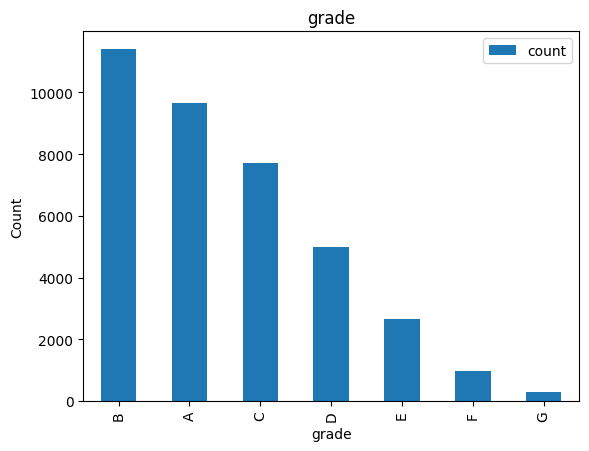

Value counts for column 'sub_grade':
sub_grade
A4    2792
B3    2767
A5    2640
B5    2569
B4    2397
C1    2022
B2    1950
C2    1904
A3    1741
B1    1725
C3    1464
A2    1441
D2    1261
C4    1184
C5    1127
D3    1097
A1    1052
D4     913
D1     911
D5     817
E1     718
E2     607
E3     510
E4     425
E5     385
F1     303
F2     232
F3     175
F4     149
F5     111
G1      92
G2      76
G4      54
G3      46
G5      30
Name: count, dtype: int64




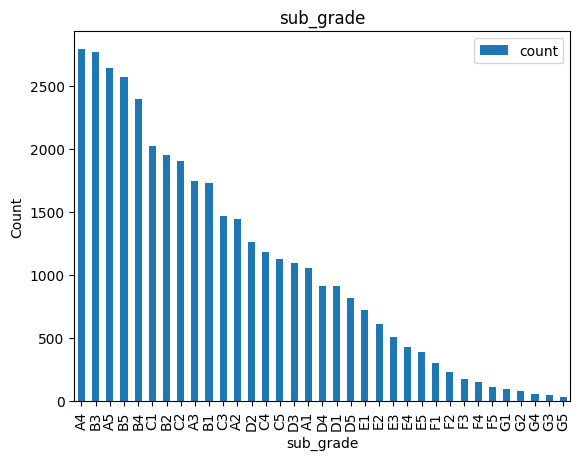

Value counts for column 'home_ownership':
home_ownership
RENT        18117
MORTGAGE    16690
OWN          2781
OTHER          96
NONE            3
Name: count, dtype: int64




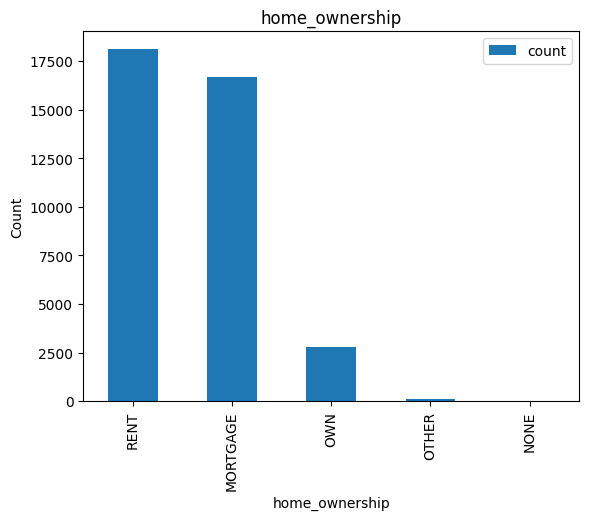

Value counts for column 'verification_status':
verification_status
Not Verified       16287
Verified           11858
Source Verified     9542
Name: count, dtype: int64




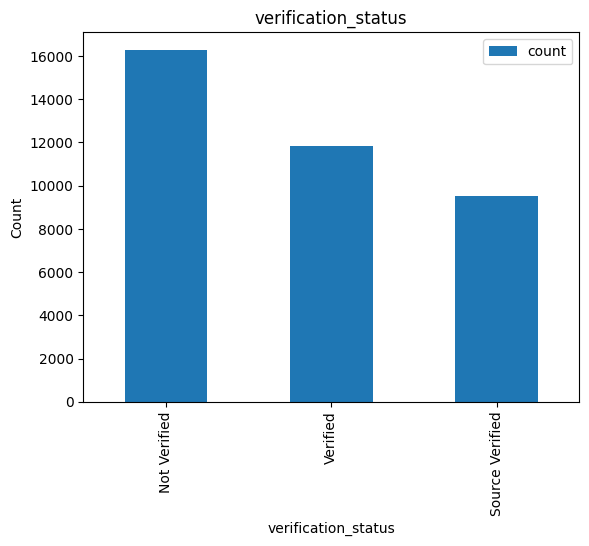

Value counts for column 'purpose':
purpose
debt_consolidation    17754
credit_card            4912
other                  3714
home_improvement       2808
major_purchase         2084
small_business         1721
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             314
renewable_energy         94
Name: count, dtype: int64




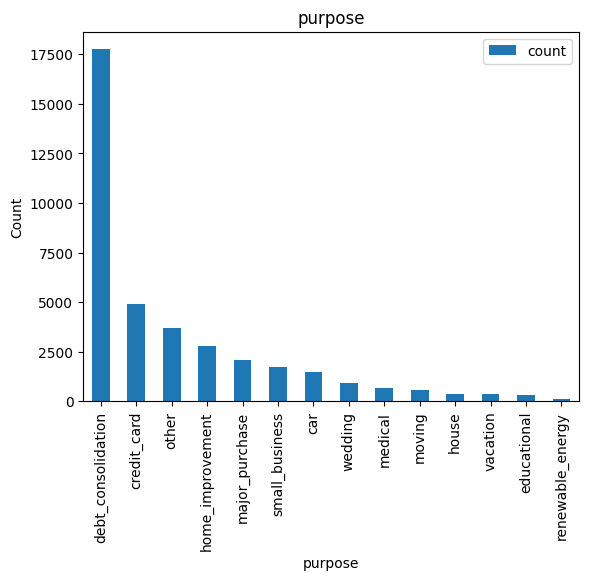

Value counts for column 'loan_status':
loan_status
Fully Paid     32296
Charged Off     5391
Name: count, dtype: int64




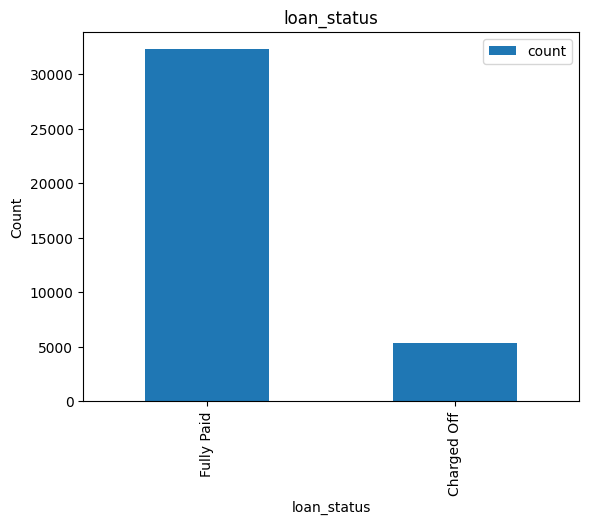

In [ ]:
## Graphical Represention with Bar chart(Categorical) for Univariate analysis
for column in loan_data.columns:
  if loan_data[column].dtype == 'object':
     print(f"Value counts for column '{column}':")
     print(loan_data[column].value_counts())
     print("\n")
     plt.xlabel(column)
     plt.ylabel('Count')
     plt.title(column)
     loan_data[column].value_counts().plot(kind='bar')
     plt.legend(loc='upper right')
     plt.show()


Value counts for column 'loan_amnt':
loan_amnt
10000.0    2745
12000.0    2219
5000.0     1960
6000.0     1842
15000.0    1811
           ... 
16550.0       1
20900.0       1
17175.0       1
24400.0       1
22550.0       1
Name: count, Length: 865, dtype: int64


Value counts for column 'term':
term
36    28243
60     9444
Name: count, dtype: int64


Value counts for column 'int_rate':
int_rate
10.99    906
11.49    771
7.51     756
13.49    747
7.88     701
        ... 
16.01      1
10.64      1
17.34      1
16.71      1
17.46      1
Name: count, Length: 371, dtype: int64


Value counts for column 'emp_length':
emp_length
10    8546
0     4515
2     4303
3     4022
4     3355
5     3205
1     3177
6     2178
7     1715
8     1442
9     1229
Name: count, dtype: int64


Value counts for column 'annual_inc':
annual_inc
60000.0     1441
50000.0     1012
40000.0      843
45000.0      794
75000.0      783
            ... 
42204.0        1
410000.0       1
47232.0        1
9960.0         1
2

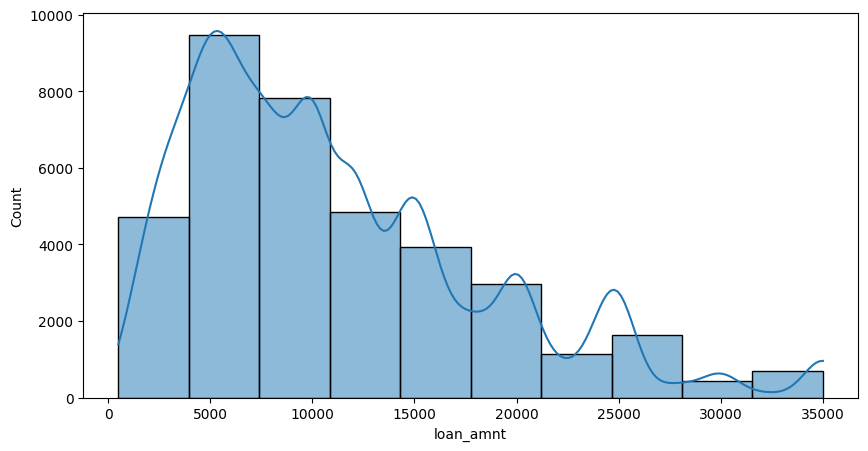

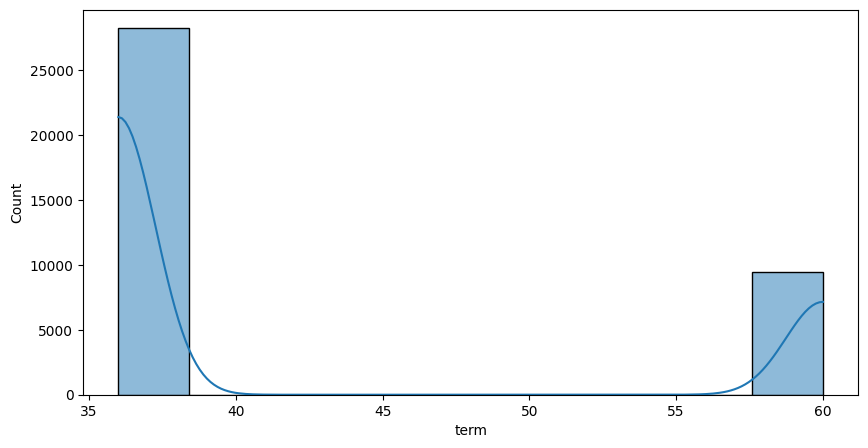

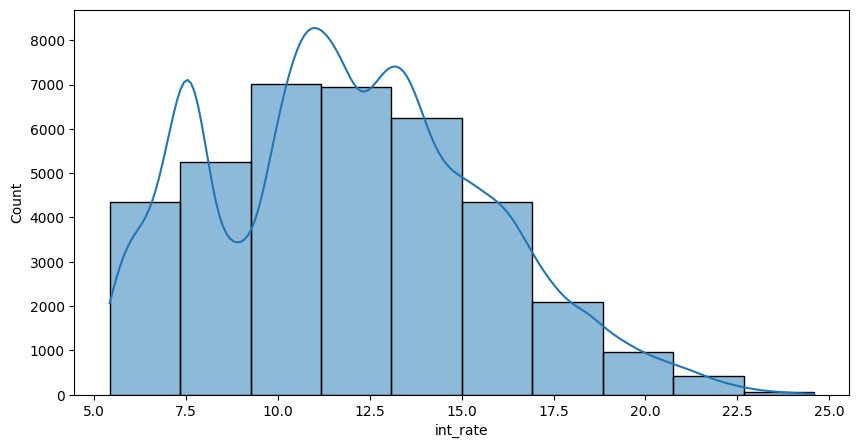

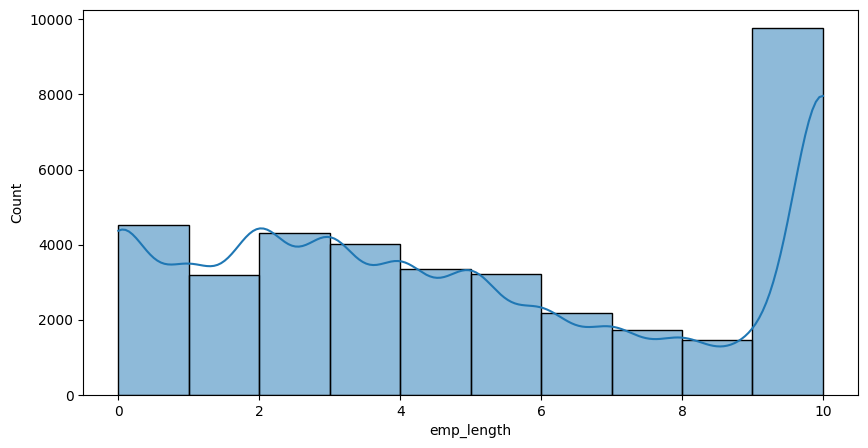

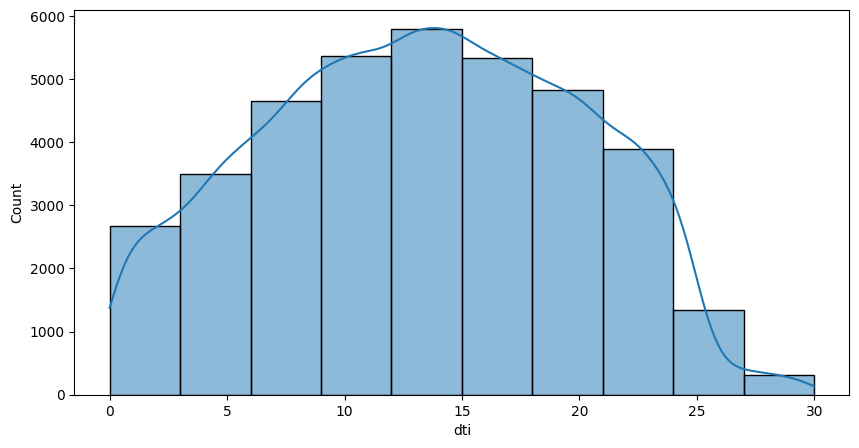

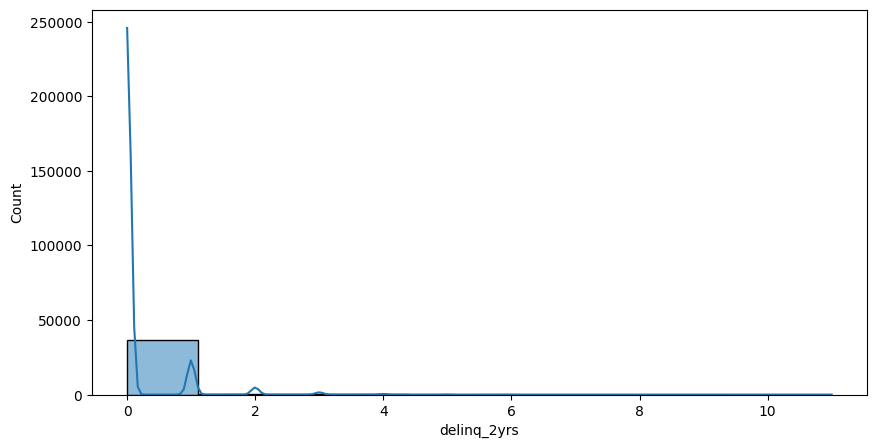

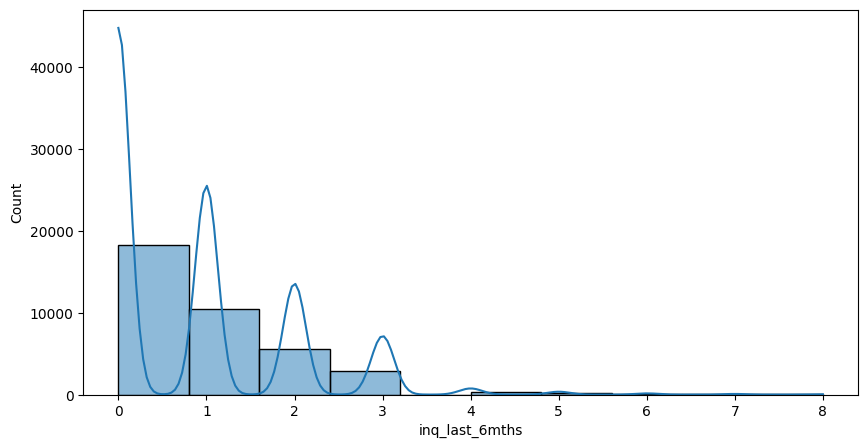

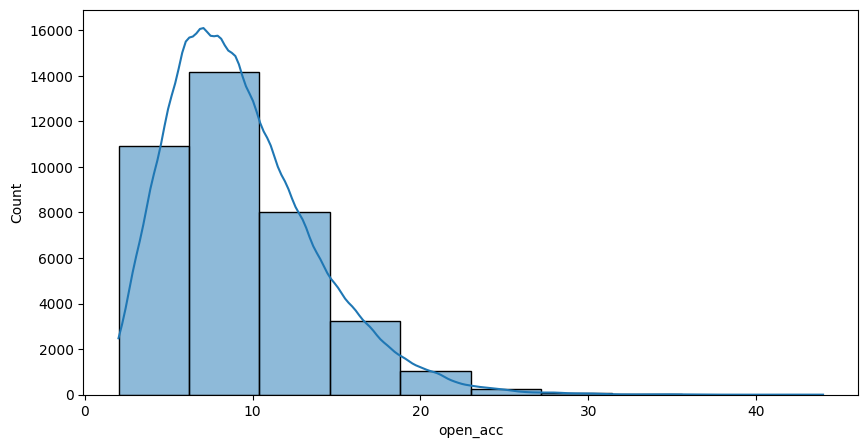

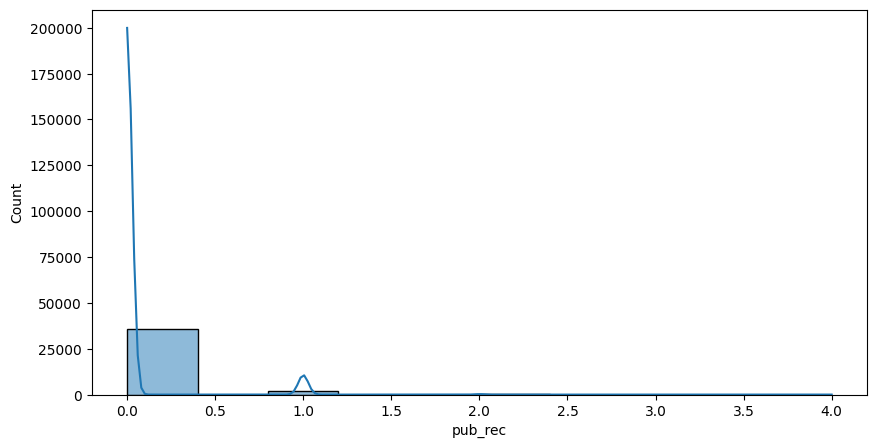

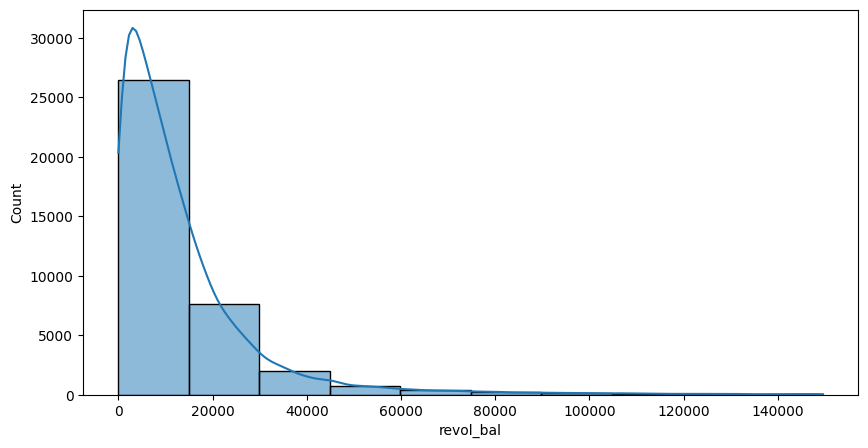

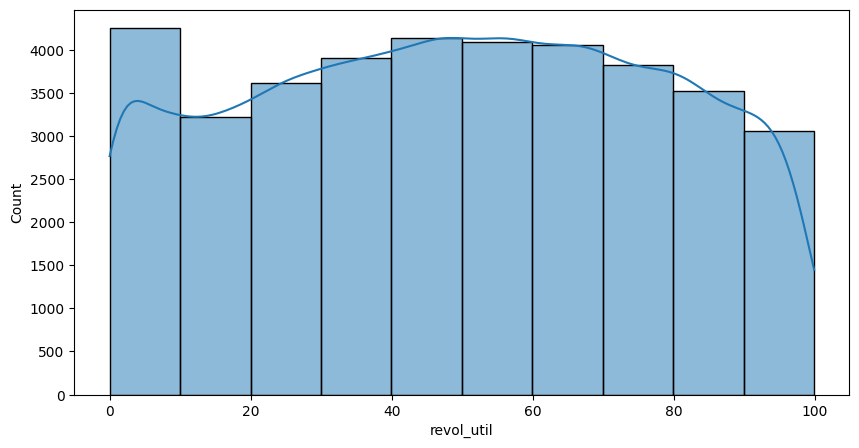

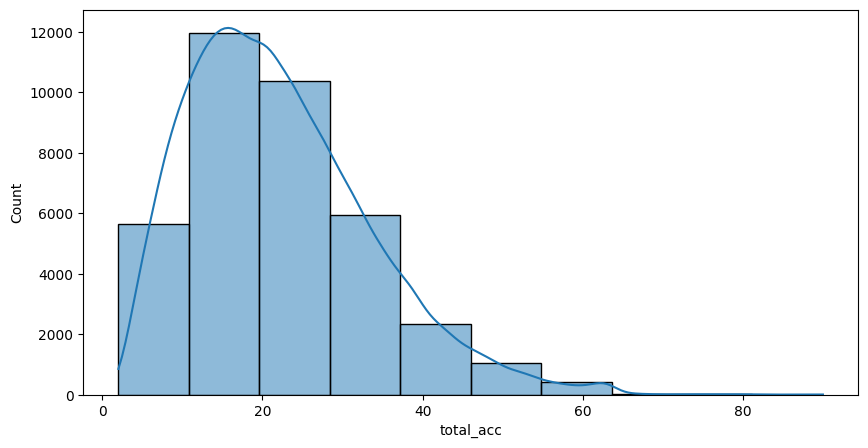

In [ ]:

## Graphical Represention with histogram (int and float) for Univariate analysis
for column in loan_data.columns:
  if loan_data[column].dtype == 'int64' or loan_data[column].dtype == 'float64':
     print(f"Value counts for column '{column}':")
     print(loan_data[column].value_counts())
     print("\n")
for column in loan_data.columns:
  if loan_data[column].dtype == 'int64' or loan_data[column].dtype == 'float64':
    if loan_data[column].name != 'annual_inc':
     plt.figure(figsize=(10, 5))
     sns.histplot(data=loan_data, x=column, bins=10,kde=True)

Value counts for column 'annual_inc':
annual_inc
60000.0     1441
50000.0     1012
40000.0      843
45000.0      794
75000.0      783
            ... 
42204.0        1
410000.0       1
47232.0        1
9960.0         1
27376.0        1
Name: count, Length: 5019, dtype: int64




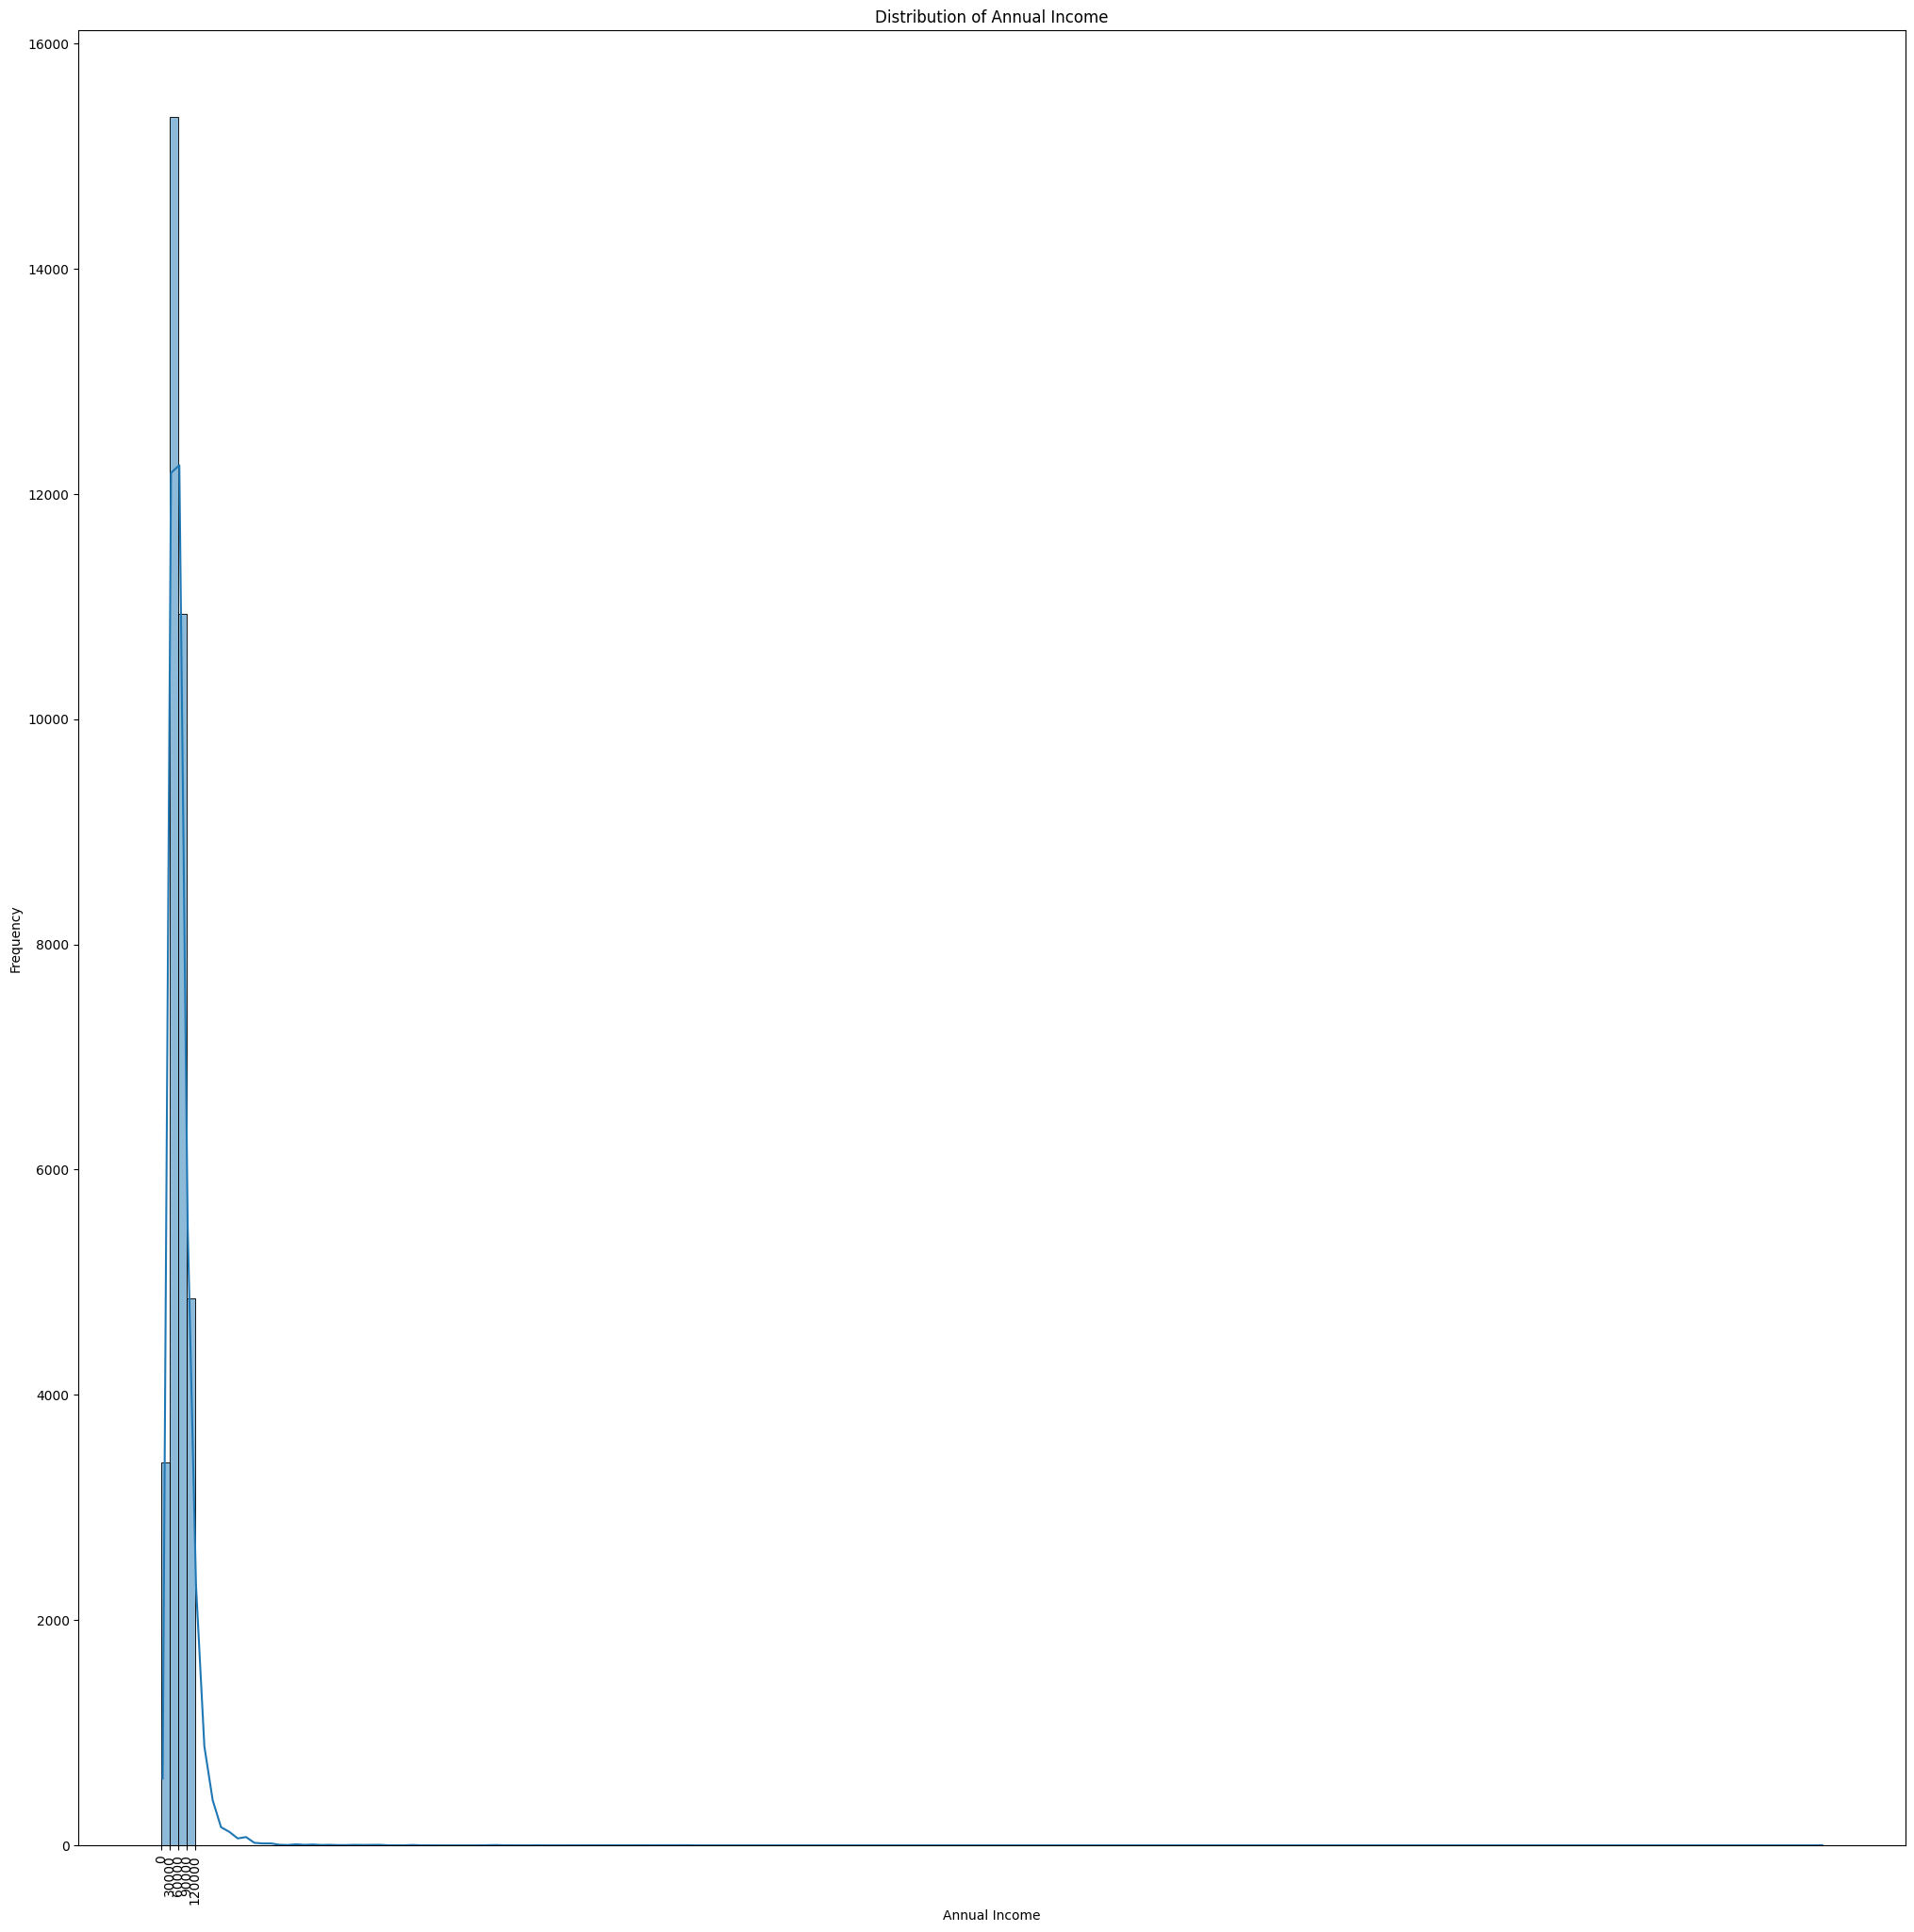

In [ ]:
for column in loan_data.columns:
  if loan_data[column].name == 'annual_inc':
   print(f"Value counts for column '{column}':")
   print(loan_data[column].value_counts())
   print("\n")
   plt.figure(figsize=(25, 25))
   inc_bins = [0, 30000, 60000, 90000, 120000]
   sns.histplot(loan_data['annual_inc'], bins=inc_bins, kde=True)
   plt.title('Distribution of Annual Income')
   plt.xlabel('Annual Income')
   plt.xticks(inc_bins) # Set x-axis ticks to bin edges
   plt.ylabel('Frequency')
   plt.xticks(rotation=90)
   plt.show()

**Observations****Univariate Analysis of Categorical Attributes**
**Observations****Univariate Analysis of Categorical Attributes**
The borrowers with grades can be
B    11408
A     9666
C     7701
D     4999
E     2645
F      970
G      298
for Lending_club the grade A is the highest quality and lowest risk and grade G is lowest quality and high risk for lenders, from the above data looks like we have majority Good grades but other attributes of borrowers needs to be analysed

The borrowers subgrades can be
sub_grade
A4    2792
B3    2767
A5    2640
B5    2569
B4    2397
C1    2022
B2    1950
C2    1904
A3    1741
B1    1725
C3    1464
A2    1441
D2    1261
C4    1184
C5    1127
D3    1097
A1    1052
D4     913
D1     911
D5     817
E1     718
E2     607
E3     510
E4     425
E5     385
F1     303
F2     232
F3     175
F4     149
F5     111
G1      92
G2      76
G4      54
G3      46
G5      30
Subgrades range from A1 to G5, with A1 being the highest quality and lowest risk, and G5 being the lowest quality and highest risk, we have majority counts present for high quality and lower risk per this loan data.

**home_ownership**
home_ownership
RENT        18117
MORTGAGE    16690
OWN          2781
OTHER          96
NONE            3
majority of the borrowers are currently renting or on mortgage for current home.

**income_verification_status**
Not Verified       16287
Verified           11858
Source Verified     9542
majority of loan appliers or borrowers income is not been verified.

**purpose of apllication of loan**
purpose
debt_consolidation    17754
credit_card            4912
other                  3714
home_improvement       2808
major_purchase         2084
small_business         1721
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             314
renewable_energy         94
majority of the loan application is for debt_consolidation

**loan_status**
loan_status
Fully Paid     32296
Charged Off     5391

majority of loan applicants/borrowers have current loan fully paid while rest of them 5391 of them are charged off showing risk for lending club/lenders to approve the loan for them as their previous loan was Charged Off

**Observations**** univariate analysis for int and float data attributes**
**loan_amt** majority of the borrowers have applied loan for around $5000, then for around $10,000 and the gradually decreases until $30,000 and little jump which sounds suspicious could be outliers as when it increases little for $35,000
**loan_term** is more applied for 36 months than 60 months
**int_rate** majority of the borrowers(906) are getting interest_rate for 10.99%
**emp_length** majority of the borrowers are having employment period of 10 or more years, increasing the chances of low risk lending for lenders
**annual_inc** The Annual income between $30,000 and $60,000 is more among borrowers compared to other bins.
***Dept to income ratio*** almost looks like Normal distribution with more Borrowers between 12% to 15% showing average  and less borrowers having 27% and 30%, Looks risk free for Lenders to lend money for more Loan appliers/Borrowers. With more in dept analysis we can come to conclusion for safer lending.
***delinq_2yrs*** Very few Borrowers are having more than 30+days past due instances Over a period of 2 years showing safe lending.
***inq_last_6mths***The number of inquiries in the past 6 months (excluding auto and mortgage inquiries) it is in the decreasing order Borrowers between 0 and 1 have more inquiries compared between 1 and 2  and so on.
***open_acc***	The number of open credit lines in the borrower's credit file.its decreasing graph which is a good thing but if we look closly we have more Borrowers having Number of credit lines between 3 and 15 might effect decision of Loan.
***pub_rec***	Number of derogatory public records- as this refers to negative entries on your credit report that are publicly available and indicate financial issues such as Bankrupties, Tax Liens , Judgements, we have more more Borrowers who are having pub_rec 0 pub_rec making it safe for lenders but other factors need to be condsidered as well.
***revol_bal	Total credit revolving balance*** this is more for borrowers between 0 and 18000 and decreases further, Other Factors needs to be considered.
***revol_util***	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit ==> the lower utilization rate the better mostly below 30% but the data looks like we have more borrowers having utilization rate between 0 and 20% and is about the same for other borrowers denoting most of the borrowers are utlizating the credit line to the fullest.
***total_acc***	The total number of credit lines currently in the borrower's credit file. The data is right skewed as we have more Borrowers having credit lines between 10 and 20 at peak and gradually decreases.





#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

**Bivariate Analysis of all Categorical VAriables against Loan_Status**

In [ ]:
categorical_features =[]
for feature in loan_data.columns:
  if loan_data[feature].dtype == 'object':
    if feature != 'loan_status':
      categorical_features.append(feature)
print(categorical_features)

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']


['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']
3
2
grade  loan_status
G      Charged Off      98
F      Charged Off     311
E      Charged Off     697
D      Charged Off    1085
C      Charged Off    1285
B      Charged Off    1357
A      Charged Off     558
Name: count, dtype: int64


sub_grade  loan_status
G5         Charged Off     10
G4         Charged Off     13
G3         Charged Off     19
G2         Charged Off     27
G1         Charged Off     29
F5         Charged Off     53
F4         Charged Off     52
F3         Charged Off     50
F2         Charged Off     67
F1         Charged Off     89
E5         Charged Off    105
E4         Charged Off    124
E3         Charged Off    116
E2         Charged Off    159
E1         Charged Off    193
D5         Charged Off    206
D4         Charged Off    208
D3         Charged Off    249
D2         Charged Off    260
D1         Charged Off    162
C5         Charged Off    198
C4         Charged Off    203
C3

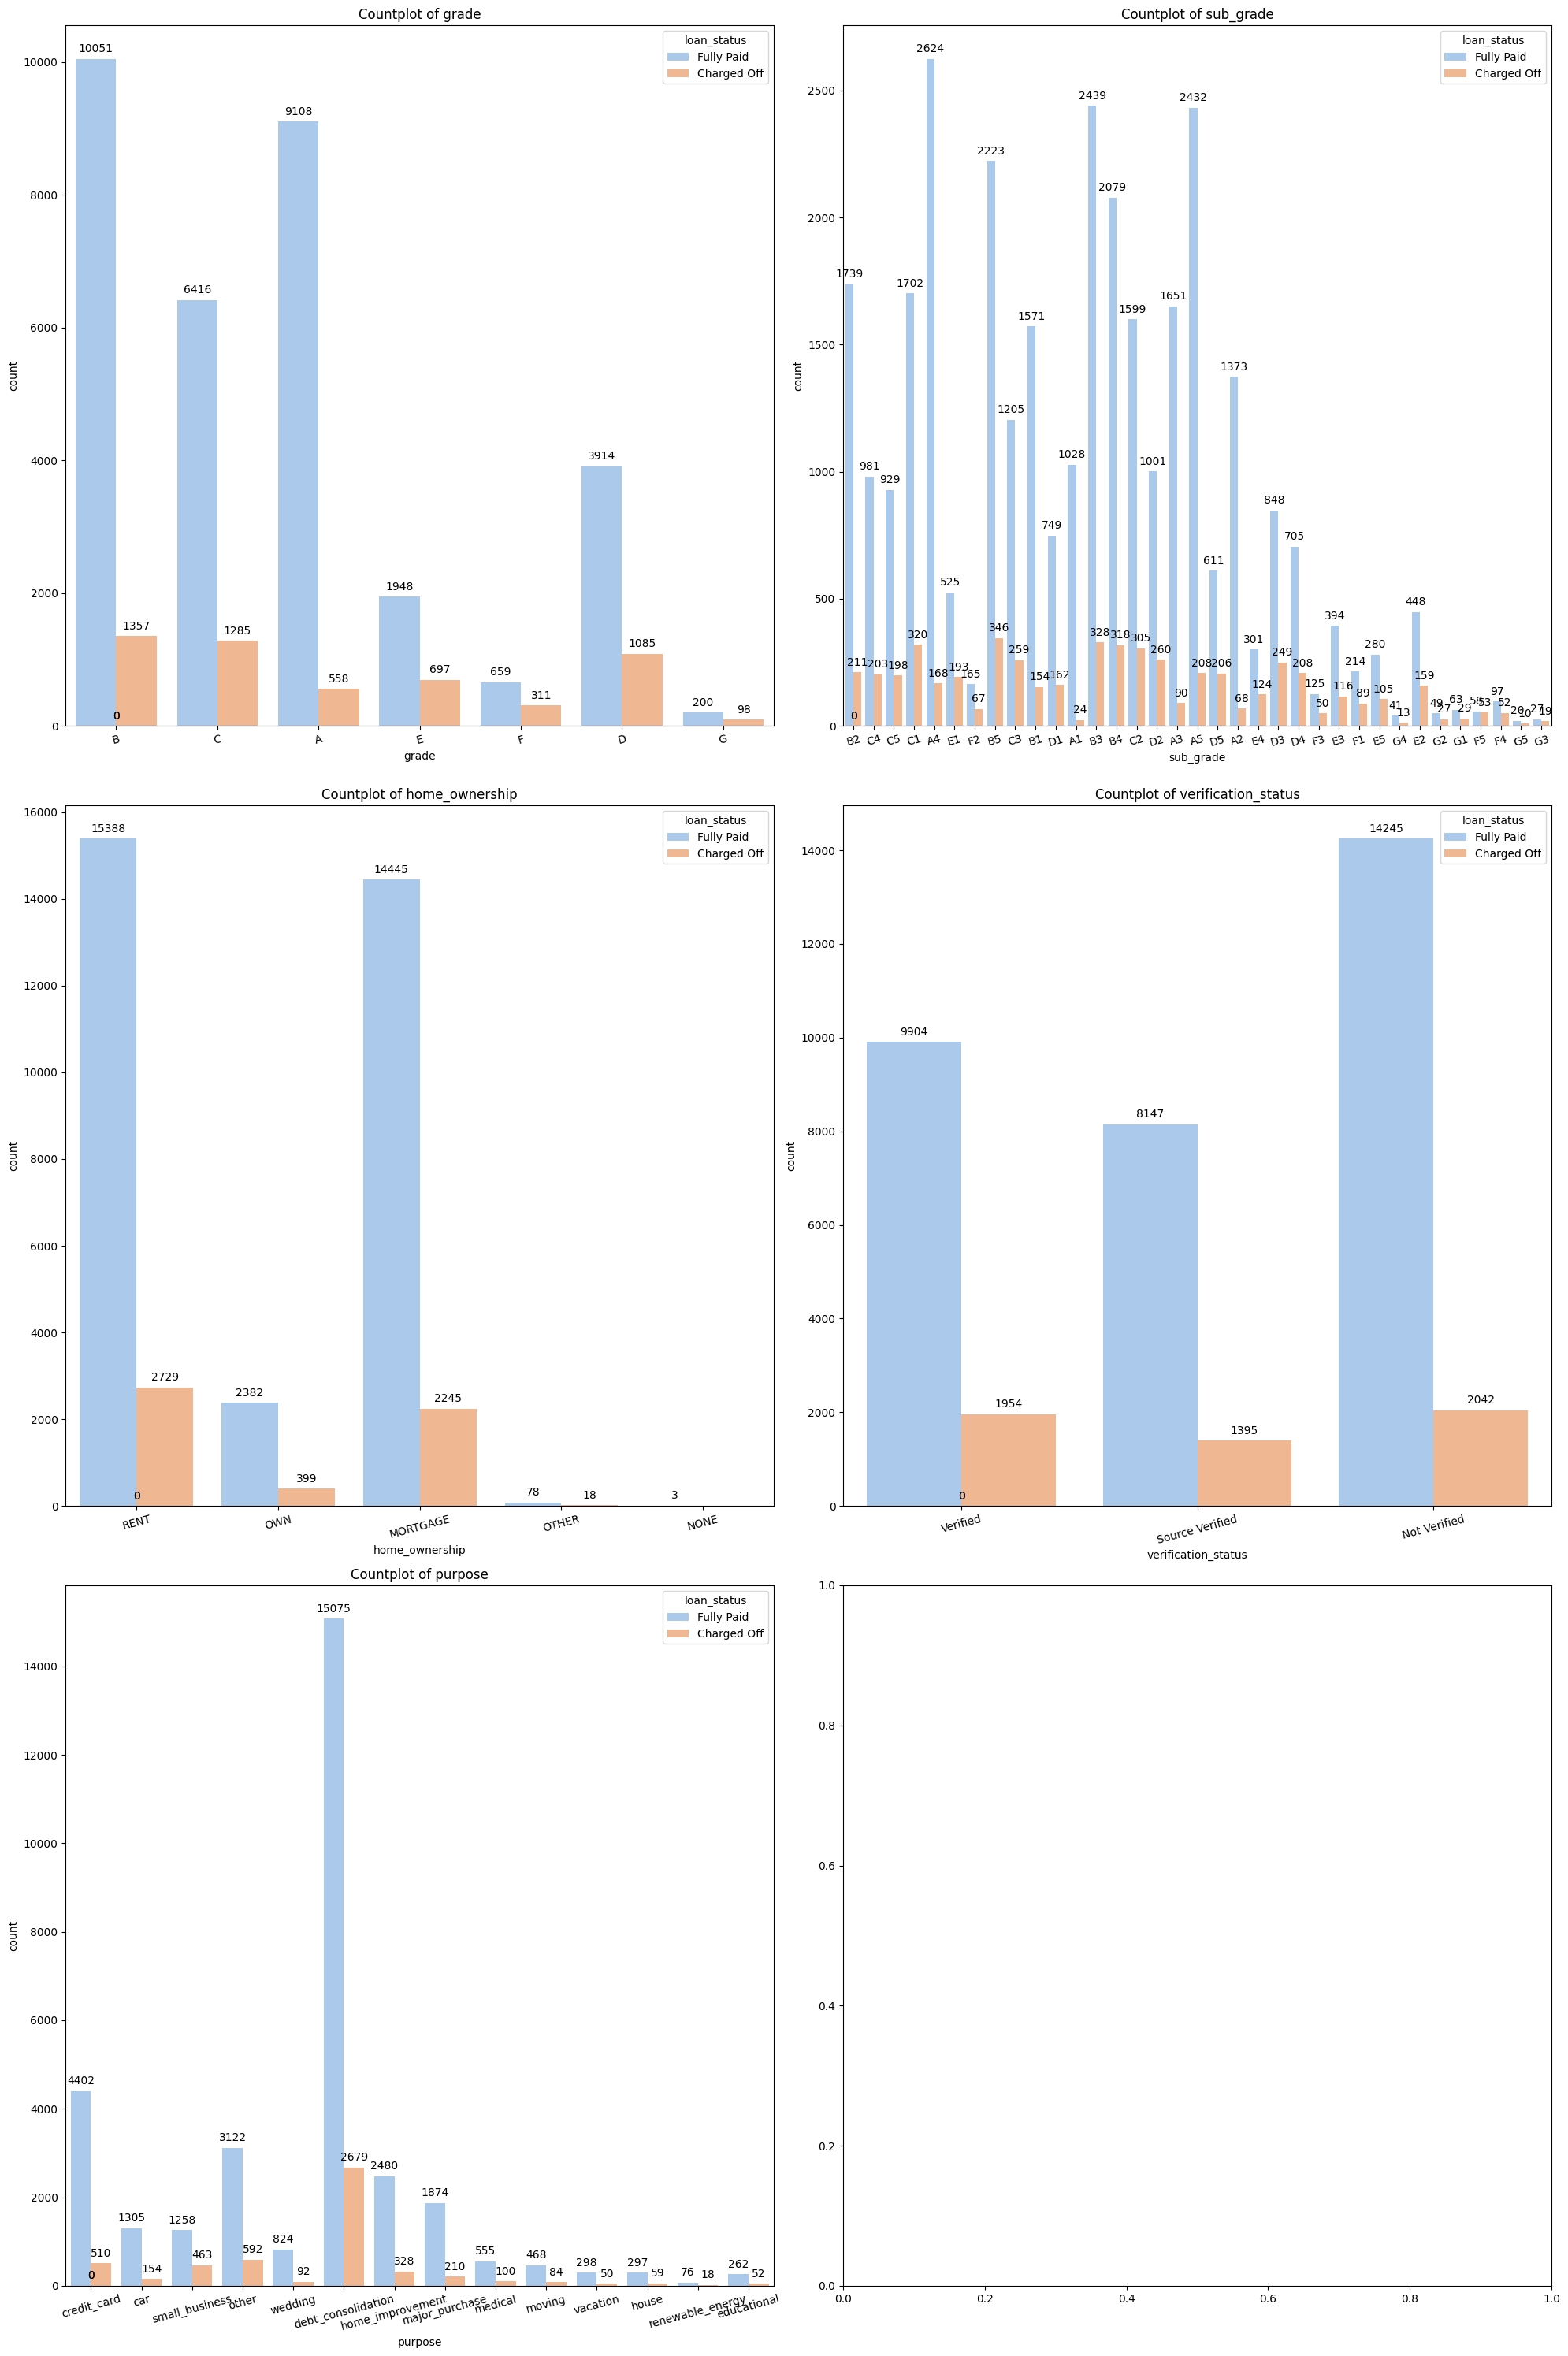

In [ ]:
#Bivariate Analysis of loan_status against Categorical Attributes
categorical_features =[]
for feature in loan_data.columns:
  if loan_data[feature].dtype == 'object':
    if feature != 'loan_status':
      categorical_features.append(feature)
print(categorical_features)

# Calculate the number of rows and columns for subplots
num_features = len(categorical_features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed
print(num_rows)
print(num_cols)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and corresponding subplot axes
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=loan_data, hue='loan_status', palette='pastel', ax=axes[i])

    # Add count labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 9),
                         textcoords='offset points', fontsize=10, color='black')

    # Set title for each subplot
    axes[i].set_title(f'Countplot of {feature}')
    #rotate the xticks for each subplot
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15)
    axes[i].tick_params(axis='x', rotation=15)

    #print counts by loan_Status
    print(loan_data.groupby(feature)['loan_status'].value_counts().sort_index(ascending=False)[lambda x: x.index.get_level_values(1) == 'Charged Off'])
    print("\n")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()




**Observation of Bivariate Analysis of Categorical VAriables against Loan_Status**

***Grade v/s Loan_status** Borrowers having Grade B have the highest #(10051)who Fully Paid but they also have highest # of Borrowers who had their Loan defaulted  (1357). Borrowers with Grade A is the 2nd highest for Fully Paid (9108) and the default is 558. Where as Borrowers with Grade G (200 Fully Paid and 98 Charged off) is the lowest of all Grades denoting not safe for Lenders.

***Home_Ownership v/s Loan_status*** Borrowers current status of Home_Ownership is more for Rent and then Mortgage and then Own Showing Most of the loan application Lenders get is from people who are currently renting or on MOrtgae of their current living status.

***Verification Status v/s Loan_Status*** if we see Verified and Source_Verified they both could be same and together they show good count for saying borrowers who are verified and source_verifies together are safe to approve loan v/s Not verified.

***Purpose v/s Loan_status*** Borrowers are applying for loan for the major reasons of debt_consolidation, credit_card, other, home_improvement, major_purchase, car,  small_Business, wedding, Medical, moving , Vacation,   
house and Educational in the above order has majoriy Fully Paid.
May be risky to lend a loan for purpose
debt_consolidation  Charged Off    2679
other               Charged Off     592
credit_card         Charged Off     510
small_business      Charged Off     463
home_improvement    Charged Off     328
major_purchase      Charged Off     210
car                 Charged Off     154
medical             Charged Off     100
wedding             Charged Off      92
moving              Charged Off      84
house               Charged Off      59
educational         Charged Off      52
vacation            Charged Off      50
renewable_energy    Charged Off      18
Hence this Bivariate analysis alone cannot be considered for coming to a decision. The dataframe needs to be Analysed further.


In [ ]:
loan_data['int_rate'].value_counts()
loan_data['int_rate'].describe()
loan_data['int_rate'].isnull().sum()

0

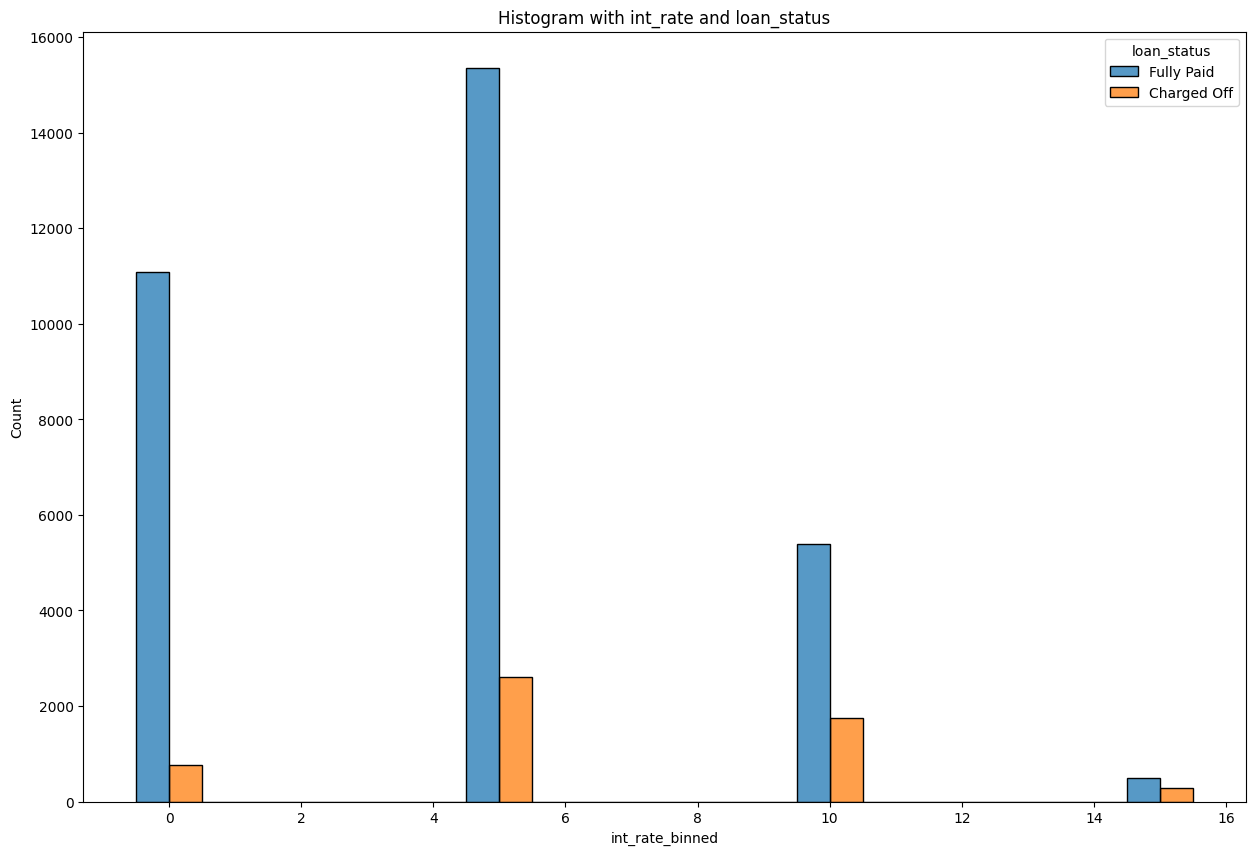

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# hist plot for "int_rate" and loan_status
###

ibins=[5,10,15,20,25,30,35,40,45,50,55]
categorical_features = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']
labels = [0,5,10,15,20,25,30,35,40,45]
loan_data['int_rate_binned'] = pd.cut(loan_data['int_rate'],bins=ibins,labels=labels)
loan_data.head()
plt.figure(figsize=(15, 10))
sns.histplot(data=loan_data,x='int_rate_binned',hue='loan_status',multiple='dodge')
#sns.histplot(data=loan_data,x='int_rate',multiple='dodge')
plt.xlabel('int_rate_binned')
plt.ylabel('Count')
plt.title('Histogram with int_rate and loan_status')
plt.show()
# Iterate over the features and corresponding subplot axes
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=loan_data, palette='pastel', ax=axes[i])
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15
    plt.figure(figsize=(15, 10))
    # Add count labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 9),
                         textcoords='offset points', fontsize=10, color='black')

    # Set title for each subplot
    axes[i].set_title(f'Countplot of {feature}')
    #rotate the xticks for each subplot
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15)
    axes[i].tick_params(axis='x', rotation=15)

# Adjust layout to prevent overlapping
    plt.tight_layout()

# Show the plots
    plt.show()



In [ ]:
loan_data.head()

loan_amnt  term  int_rate grade sub_grade  emp_length home_ownership  \
0     5000.0    36     10.65     B        B2          10           RENT   
1     2500.0    60     15.27     C        C4           0           RENT   
2     2400.0    36     15.96     C        C5          10           RENT   
3    10000.0    36     13.49     C        C1          10           RENT   
4     5000.0    36      7.90     A        A4           3           RENT   

   annual_inc verification_status         purpose    dti  delinq_2yrs  \
0     24000.0            Verified     credit_card  27.65            0   
1     30000.0     Source Verified             car   1.00            0   
2     12252.0        Not Verified  small_business   8.72            0   
3     49200.0     Source Verified           other  20.00            0   
4     36000.0     Source Verified         wedding  11.20            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0    13648.0        83.7          9   
1               5         3        0     1687.0         9.4          4   
2               2         2        0     2956.0        98.5         10   
3               1        10        0     5598.0        21.0         37   
4               3         9        0     7963.0        28.3         12   

   loan_status int_rate_binned  
0   Fully Paid               5  
1  Charged Off              10  
2   Fully Paid              10  
3   Fully Paid               5  
4   Fully Paid               0

**Bivariate Analysis**
***loan_status v/s int_rate*** shows that int_Rate increases up until 0 to 10%  showing that int_rate is reasonable for borrowers to Pay off but Fully Paid count decreases with increase in int_rate above 10%. Need to consider other Factors to come to a conclusion abt what effects int_rate.



-8750.0
29250.0




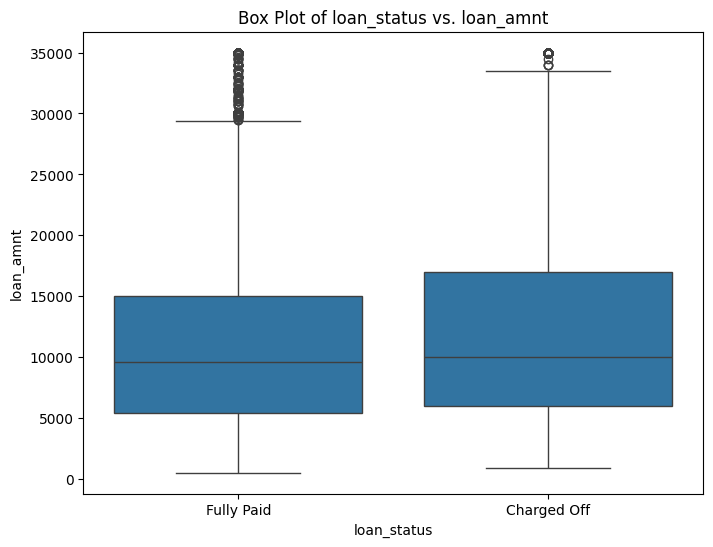

-8750.0
29250.0




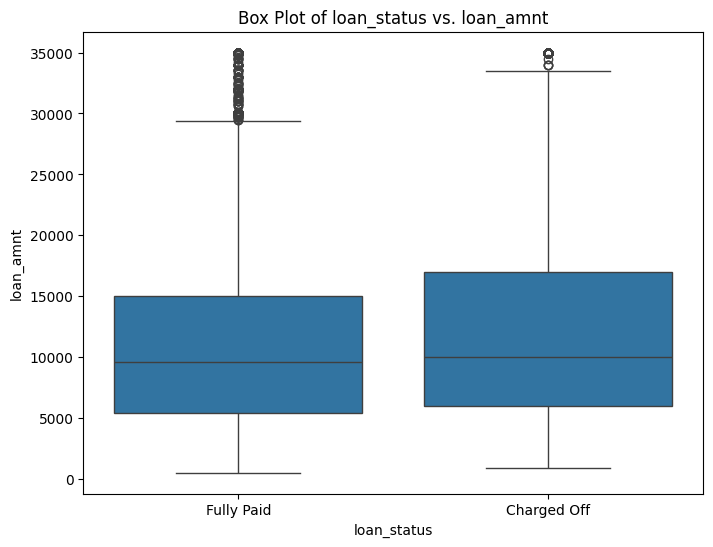

0.0
96.0




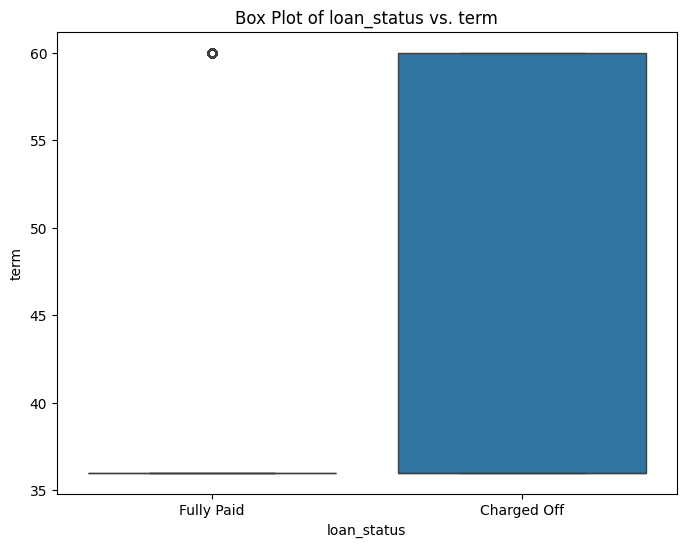

-8750.0
29250.0




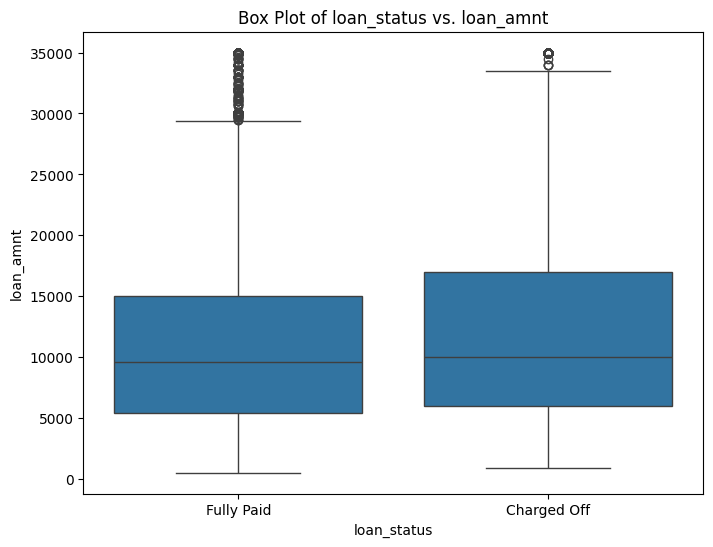

0.0
96.0




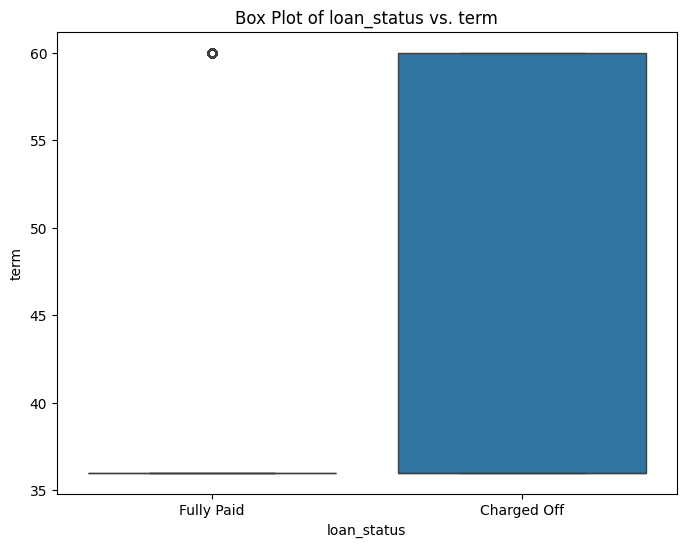

0.8649999999999967
22.585000000000004




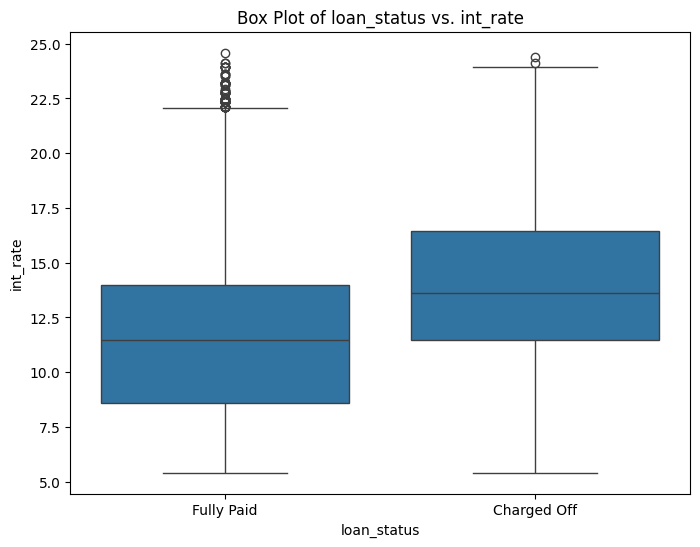

-8750.0
29250.0




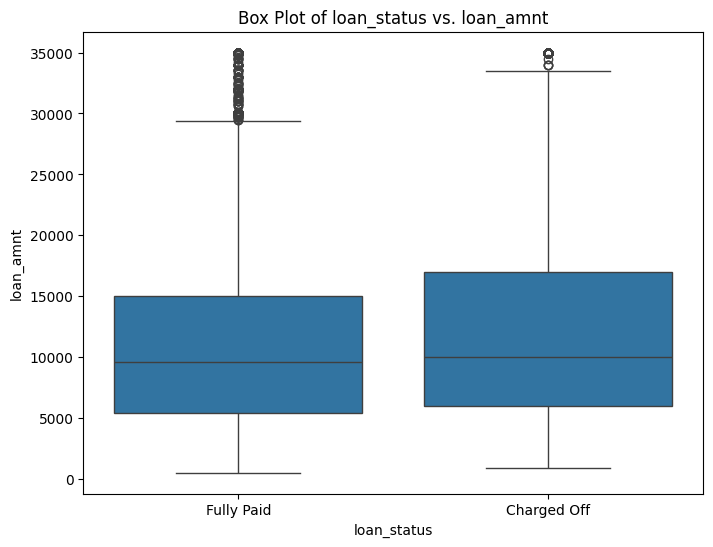

0.0
96.0




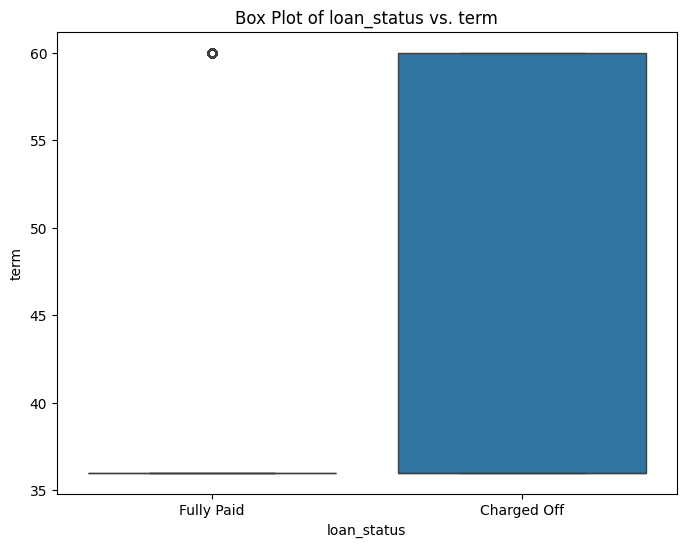

0.8649999999999967
22.585000000000004




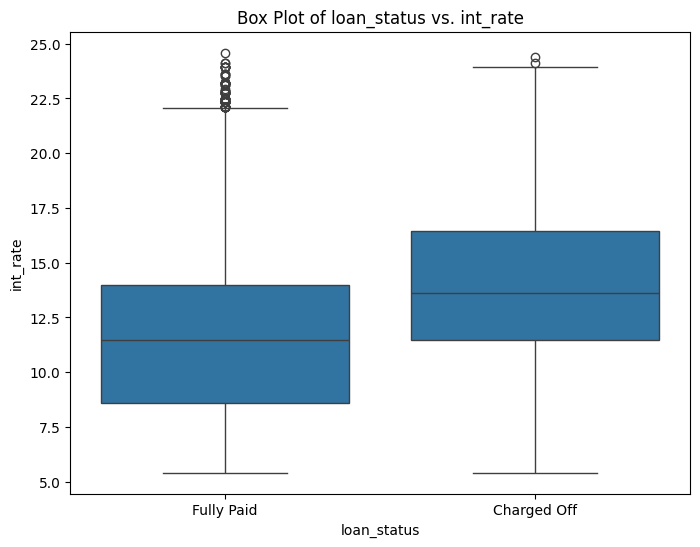

-8750.0
29250.0




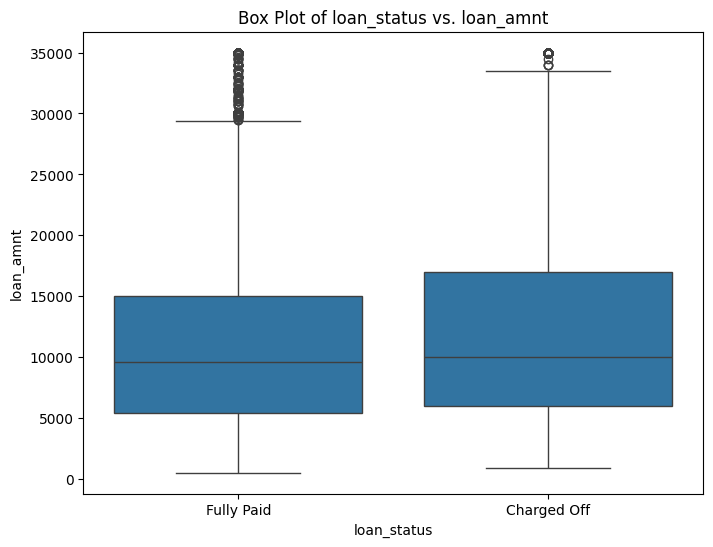

0.0
96.0




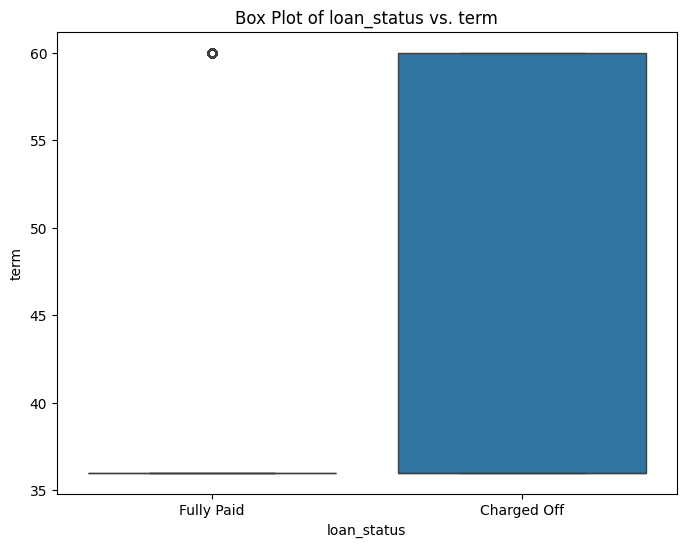

0.8649999999999967
22.585000000000004




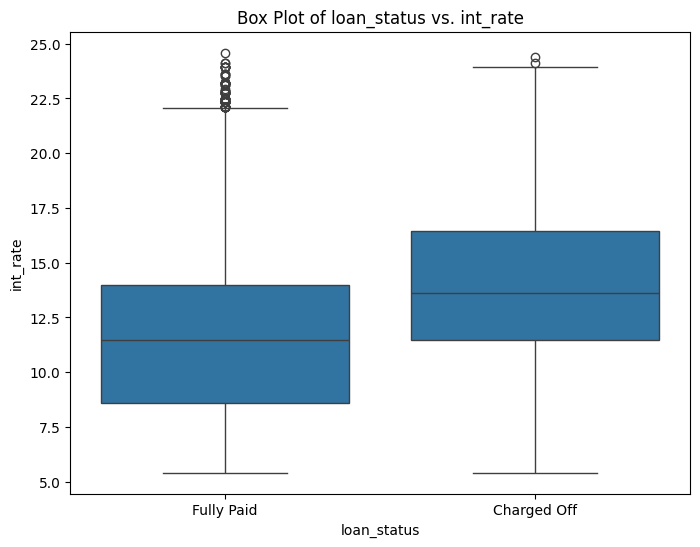

-8750.0
29250.0




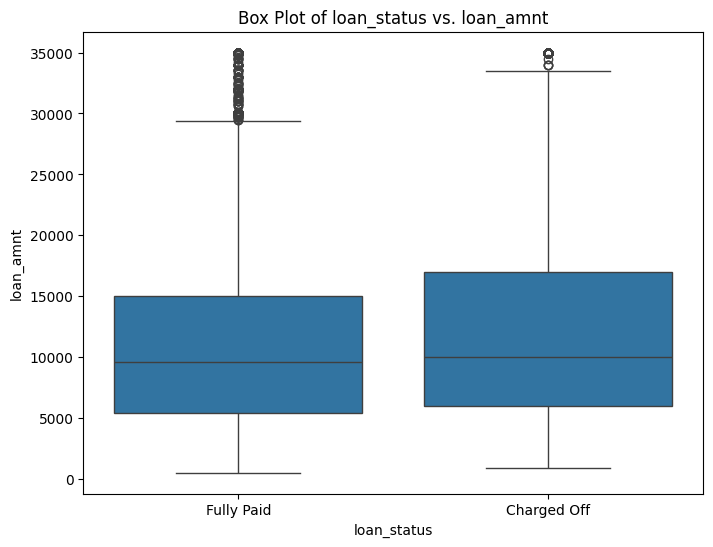

0.0
96.0




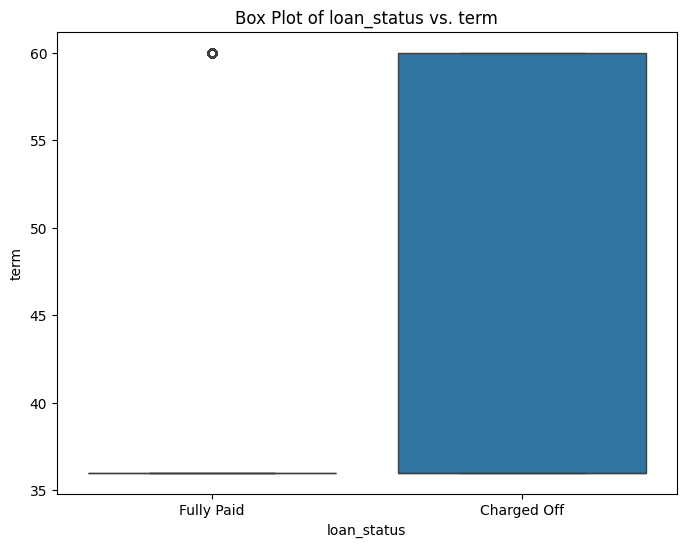

0.8649999999999967
22.585000000000004




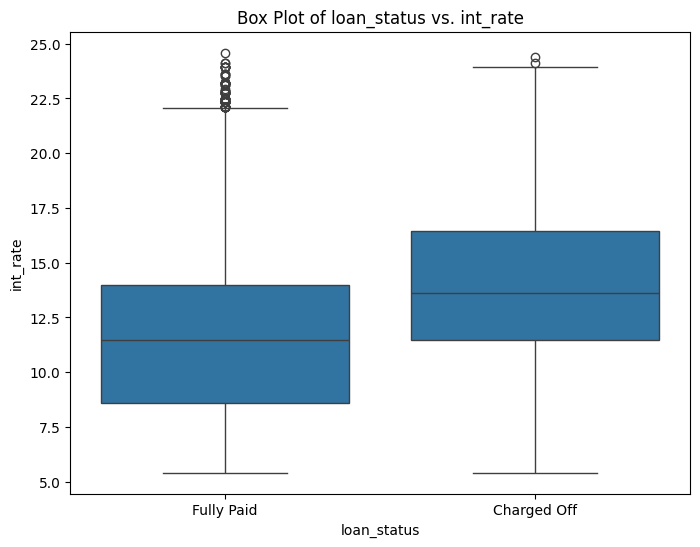

-8.5
19.5




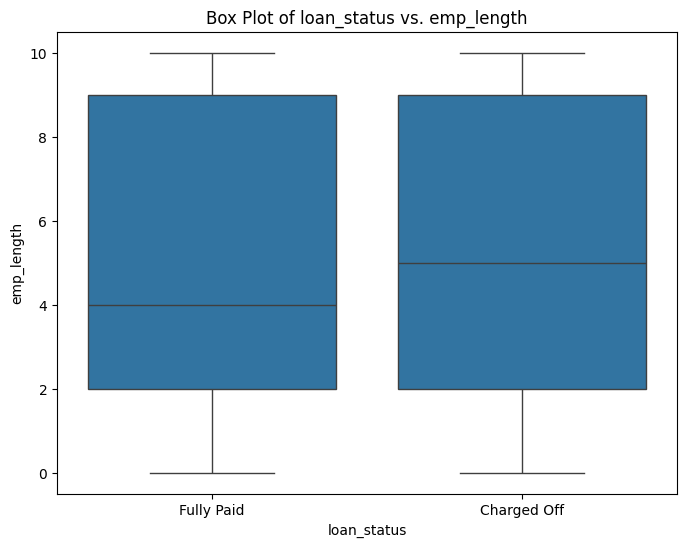

-8750.0
29250.0




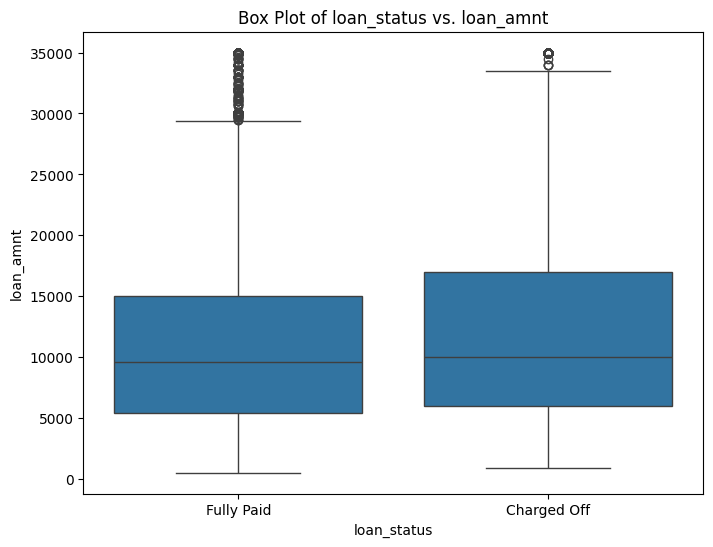

0.0
96.0




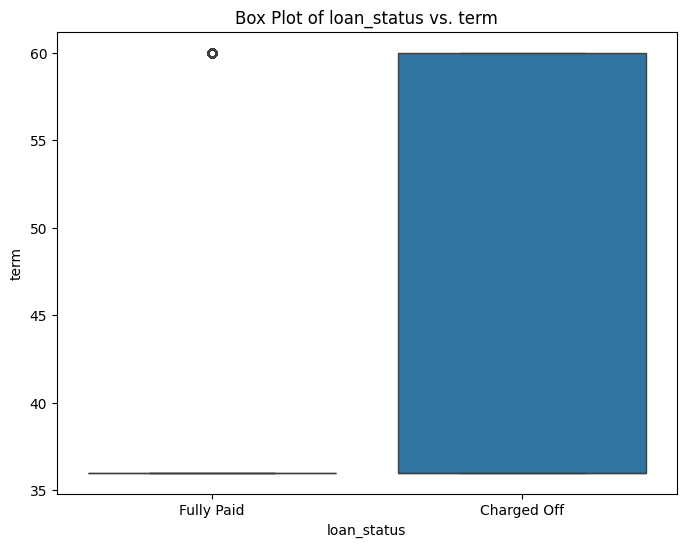

0.8649999999999967
22.585000000000004




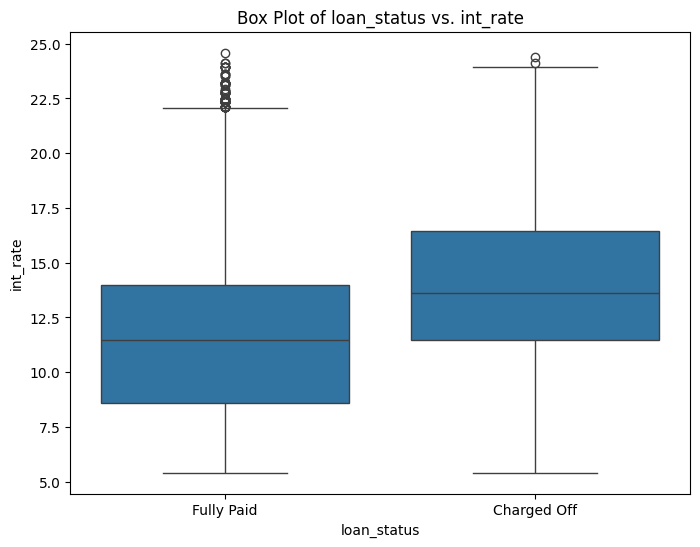

-8.5
19.5




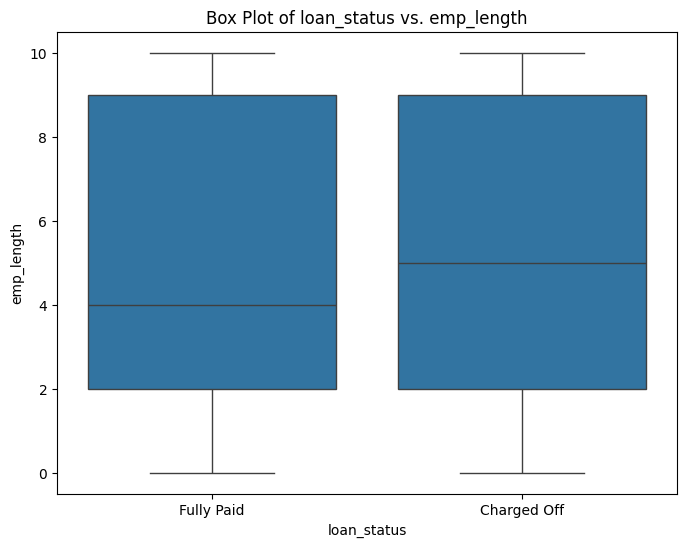

-8750.0
29250.0




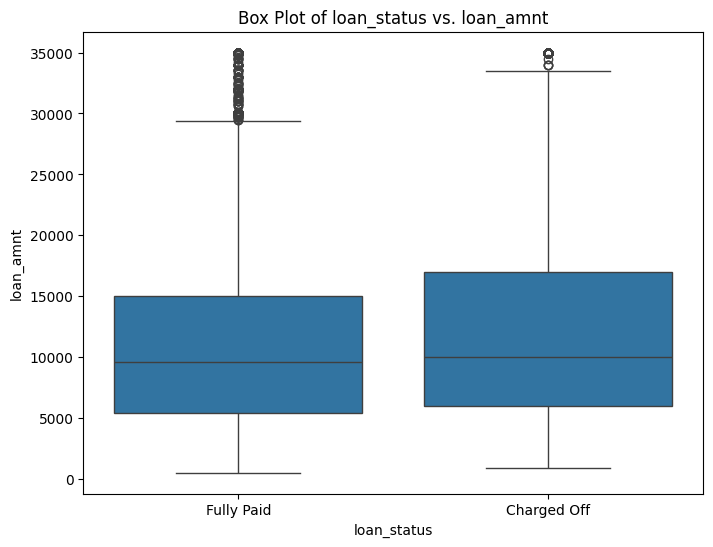

0.0
96.0




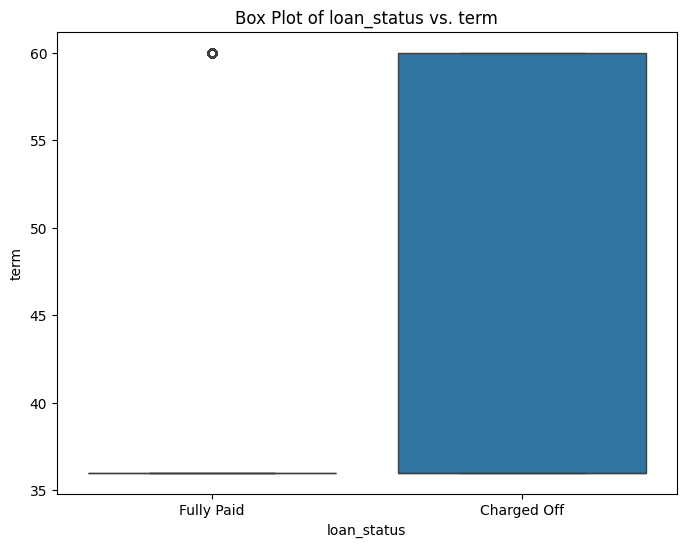

0.8649999999999967
22.585000000000004




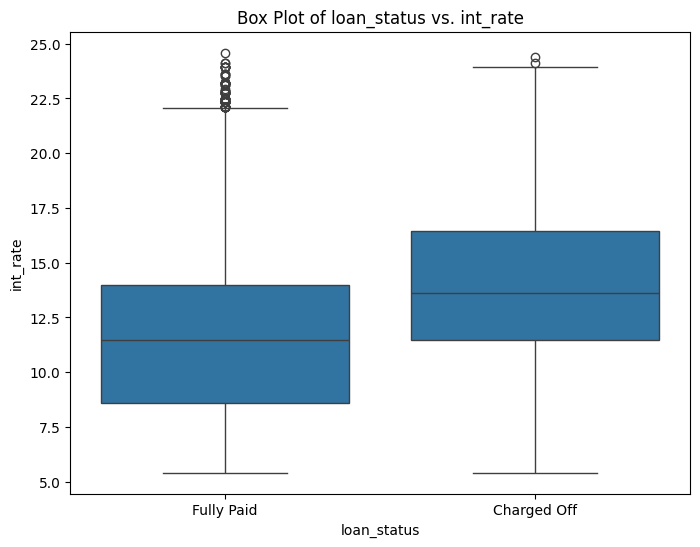

-8.5
19.5




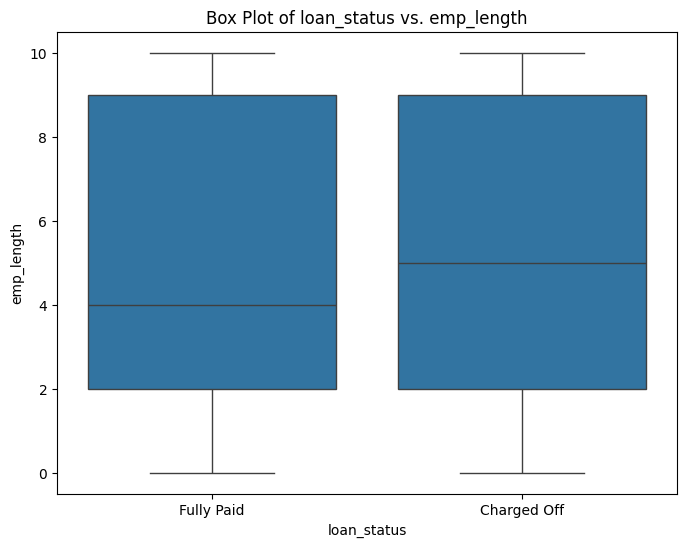

-22000.0
146000.0




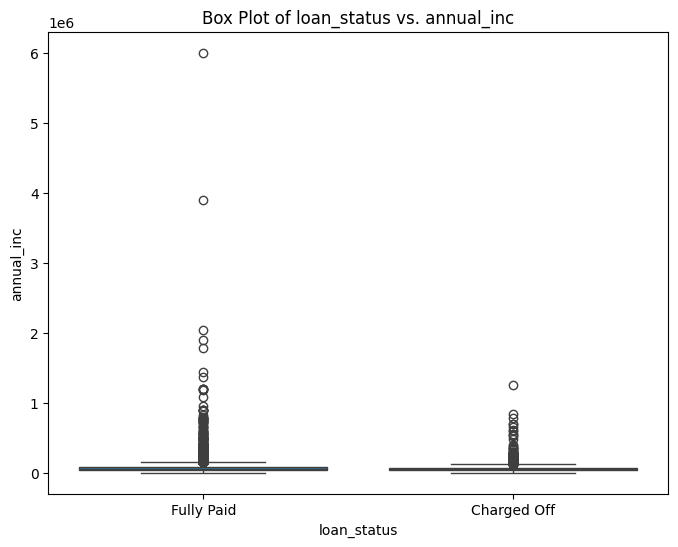

-8750.0
29250.0




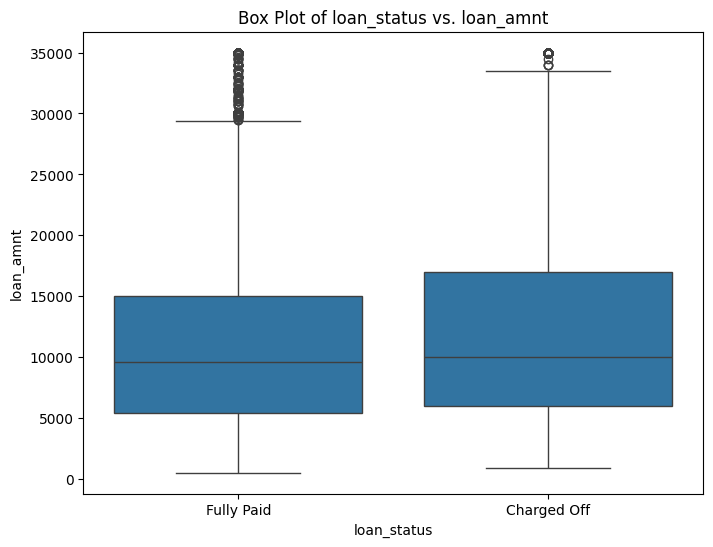

0.0
96.0




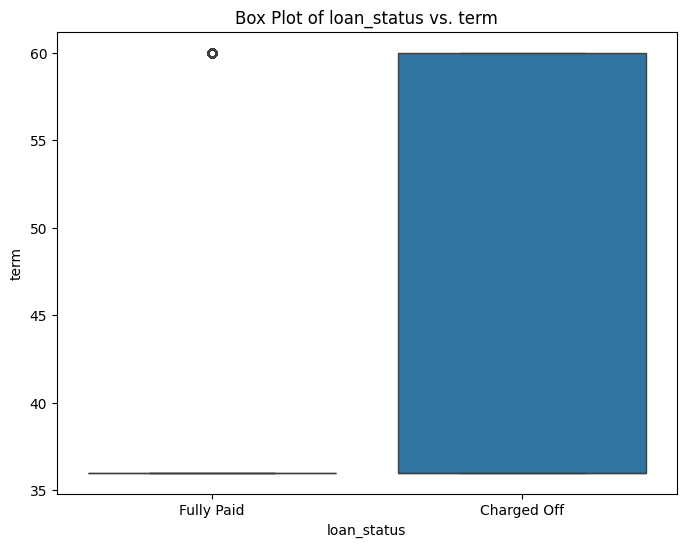

0.8649999999999967
22.585000000000004




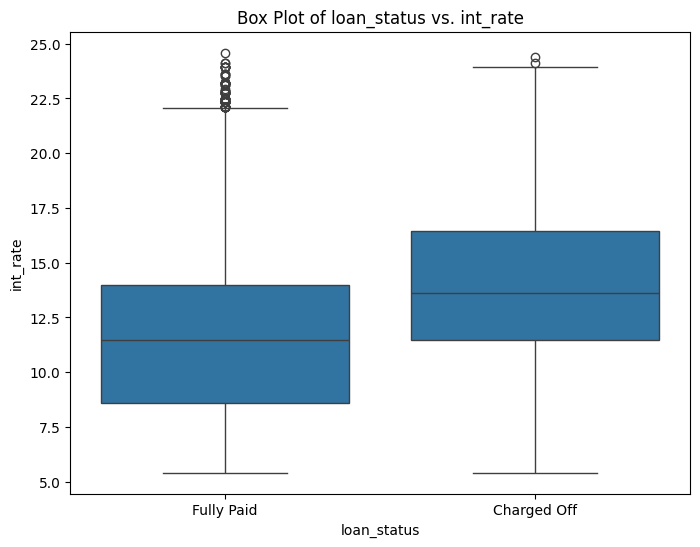

-8.5
19.5




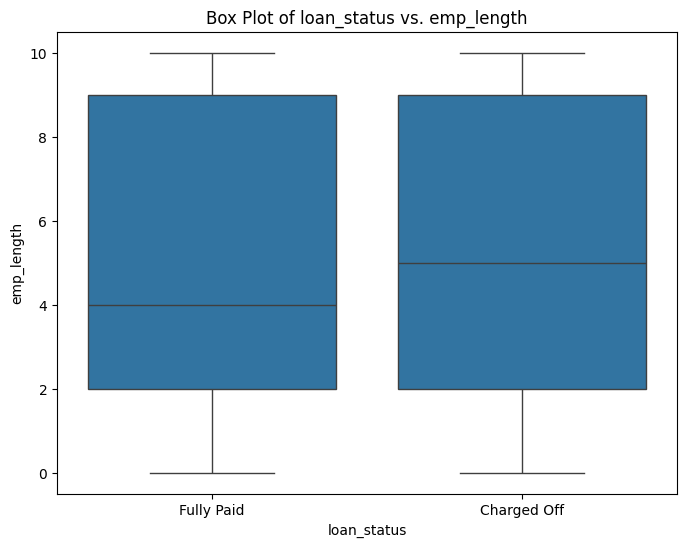

-22000.0
146000.0




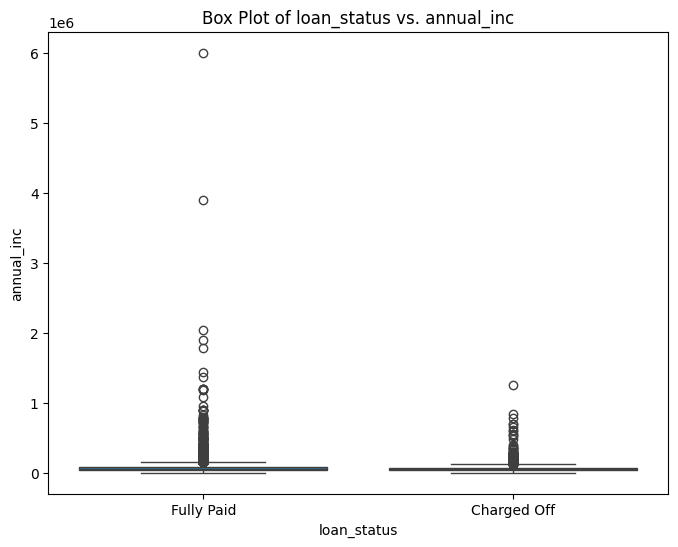

-8750.0
29250.0




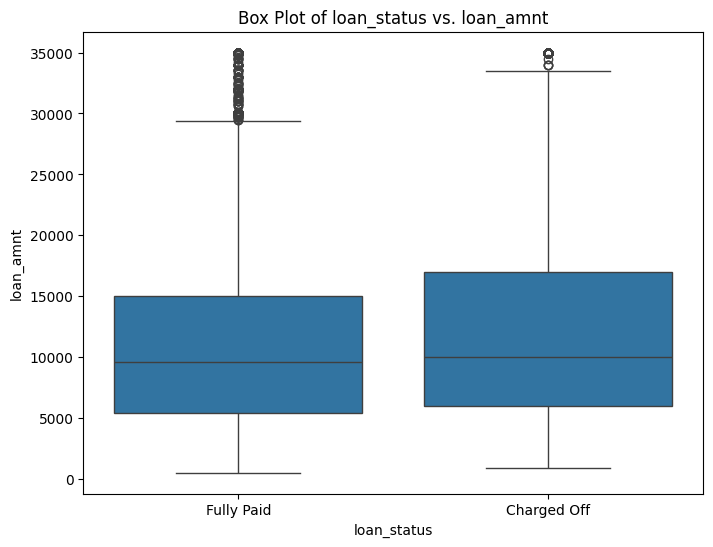

0.0
96.0




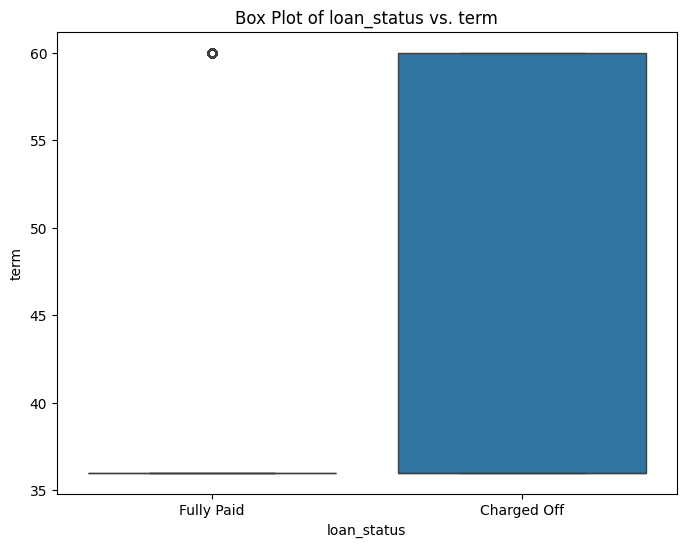

0.8649999999999967
22.585000000000004




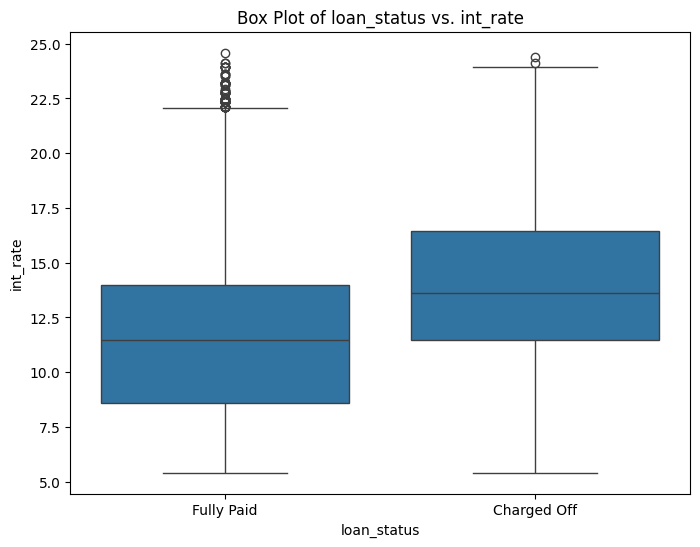

-8.5
19.5




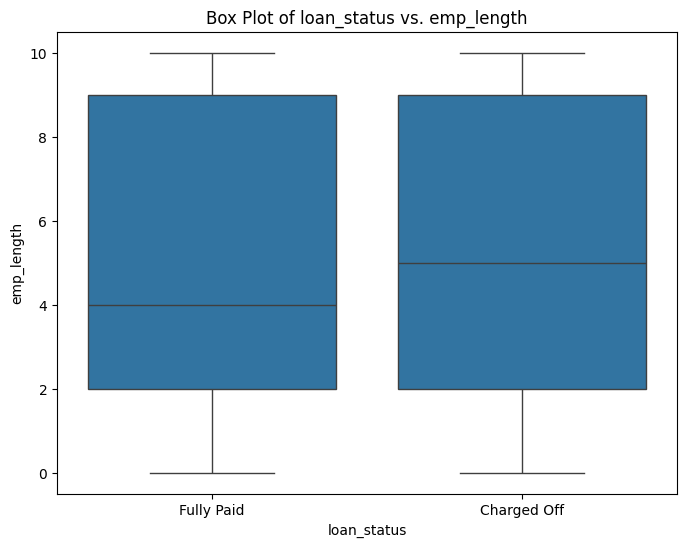

-22000.0
146000.0




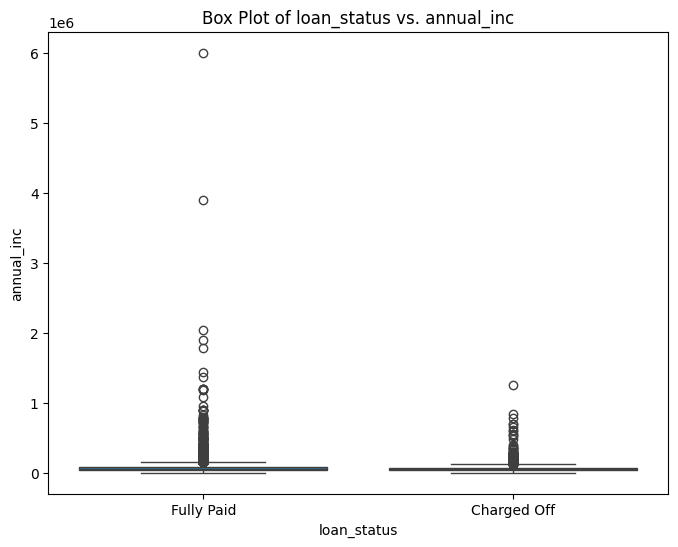

-8750.0
29250.0




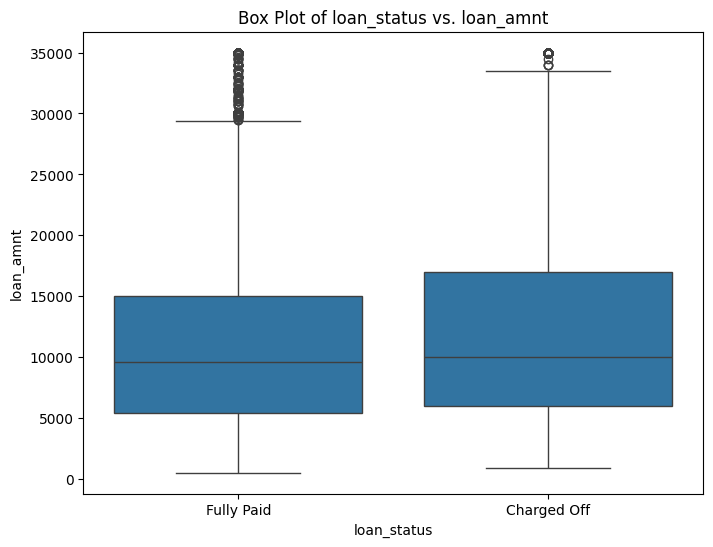

0.0
96.0




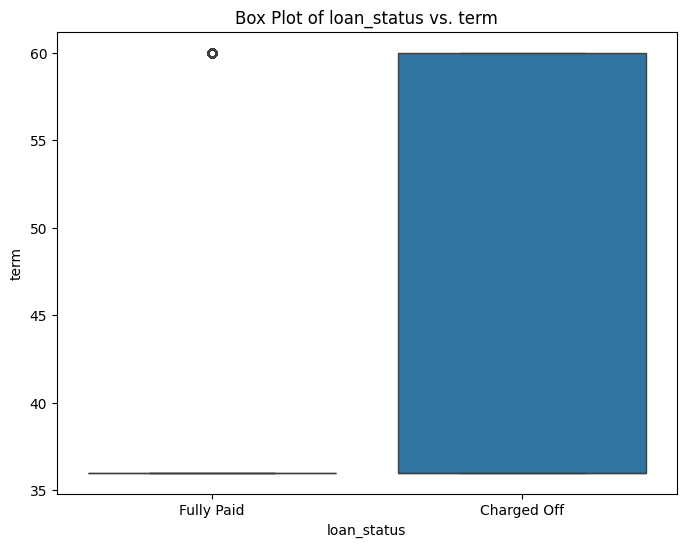

0.8649999999999967
22.585000000000004




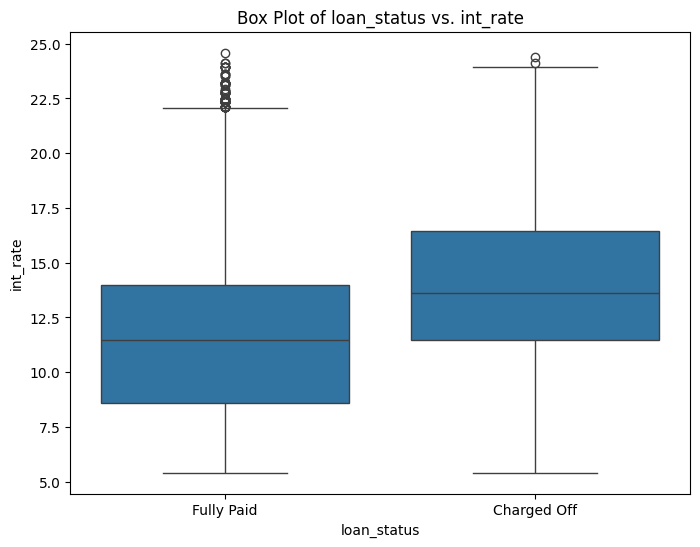

-8.5
19.5




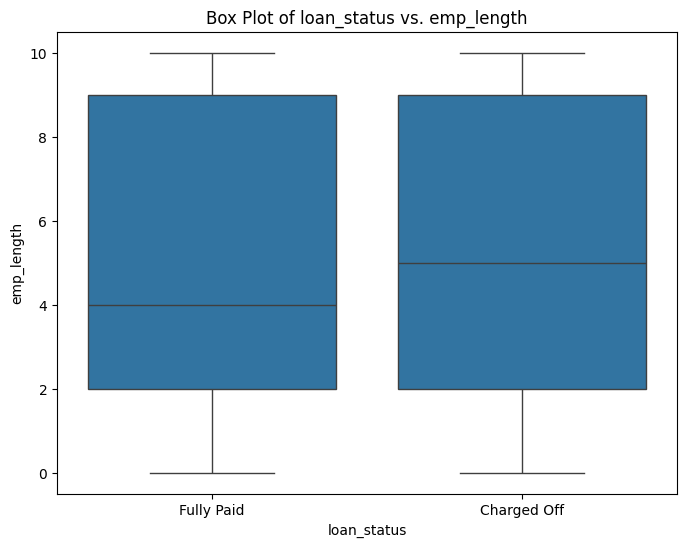

-22000.0
146000.0




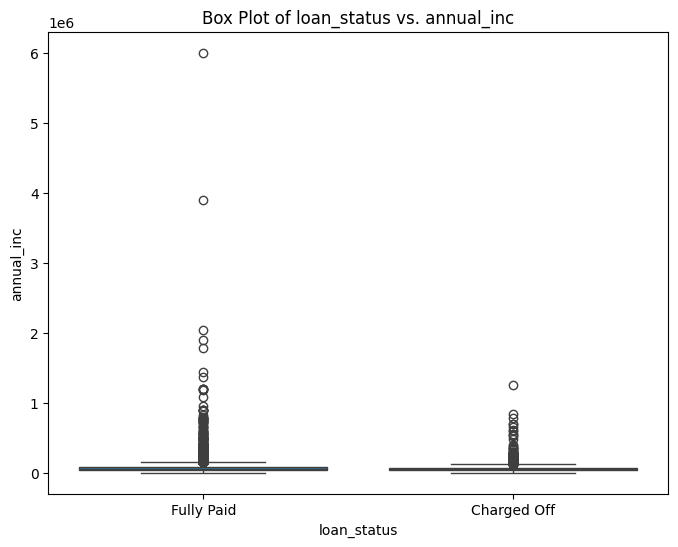

-7.4275
34.152499999999996




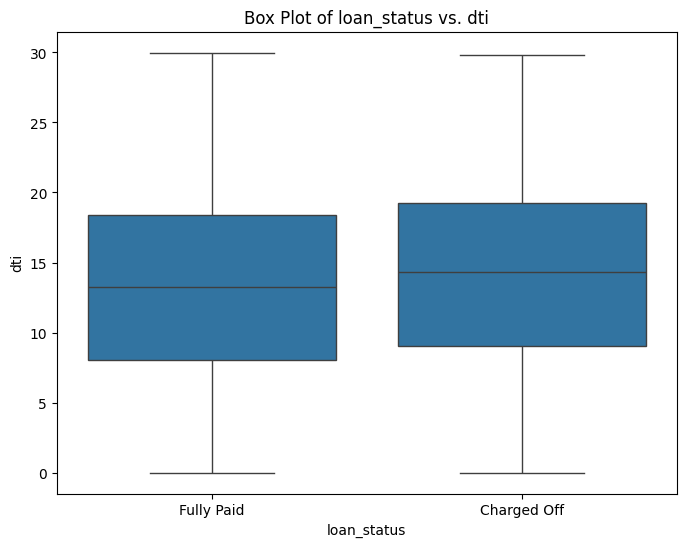

-8750.0
29250.0




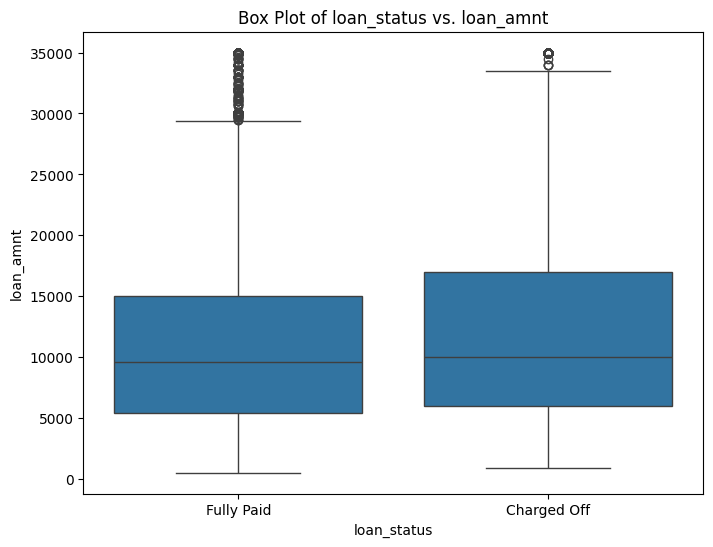

0.0
96.0




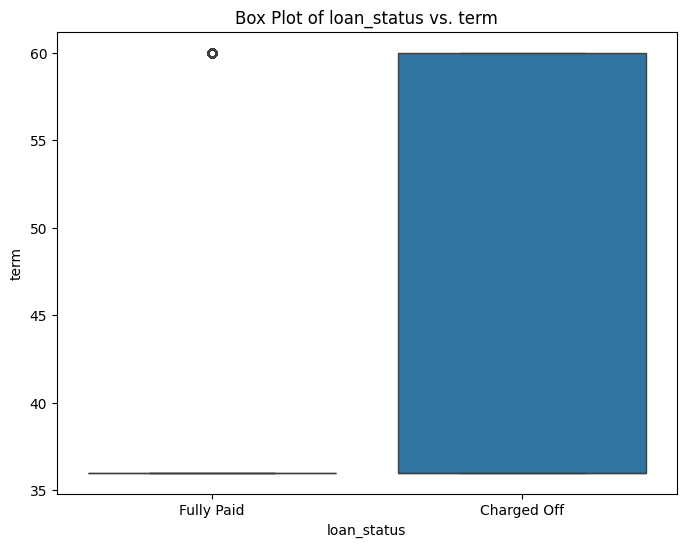

0.8649999999999967
22.585000000000004




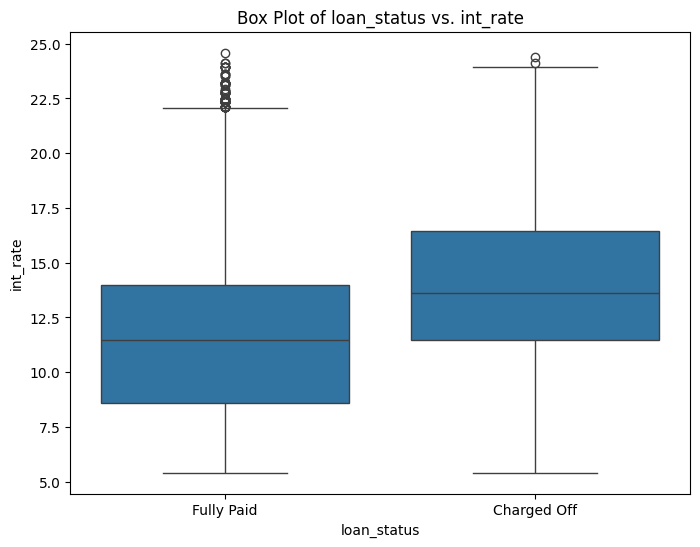

-8.5
19.5




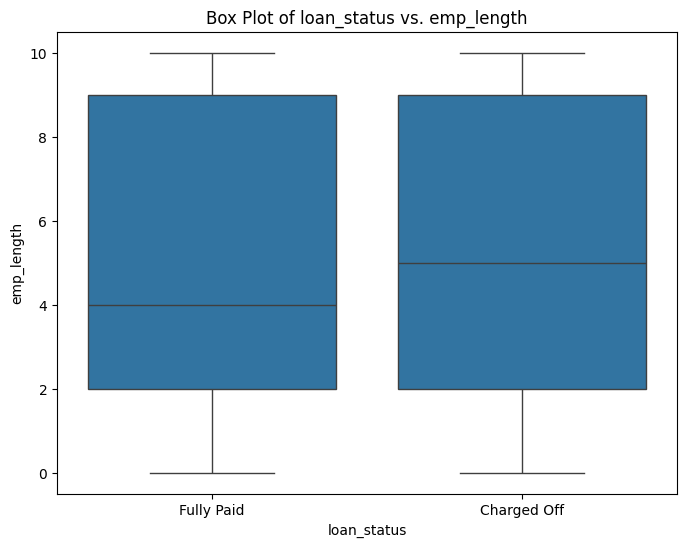

-22000.0
146000.0




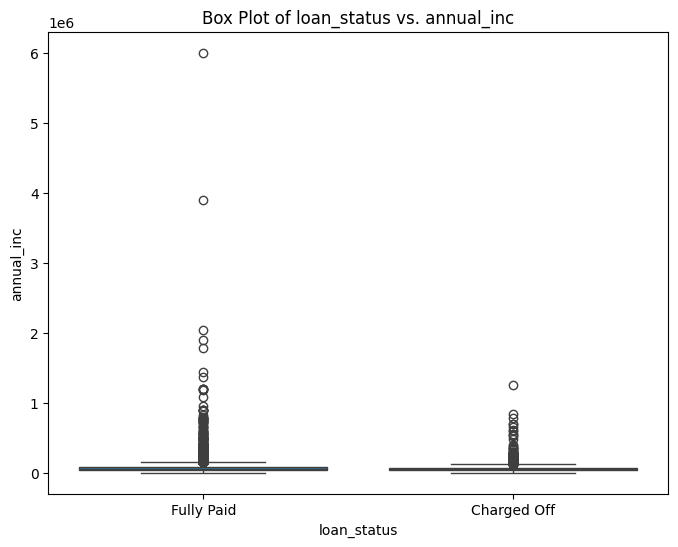

-7.4275
34.152499999999996




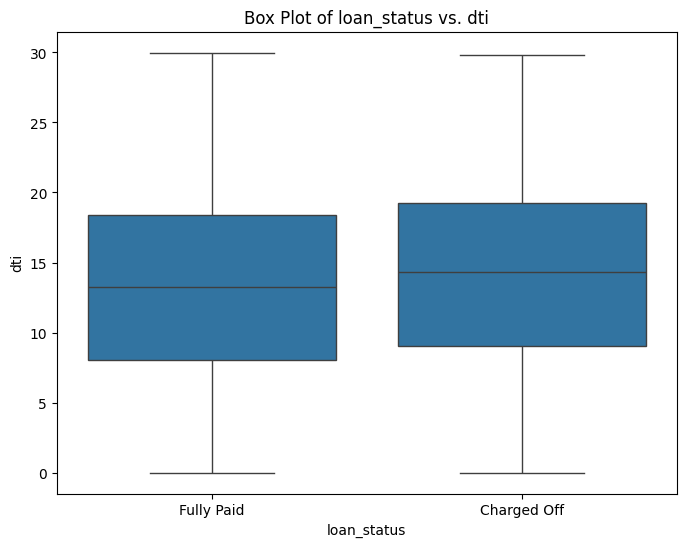

0.0
0.0




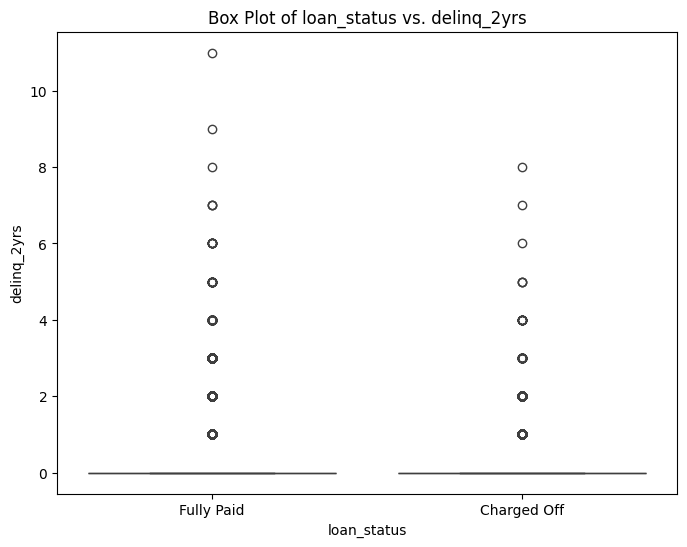

-8750.0
29250.0




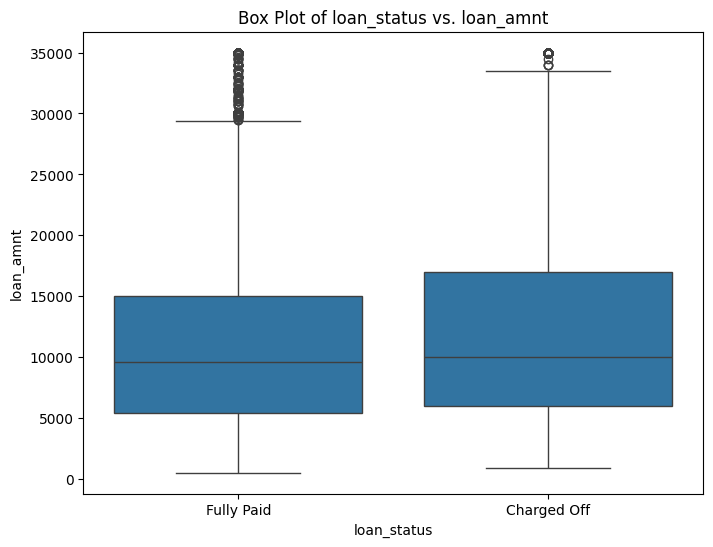

0.0
96.0




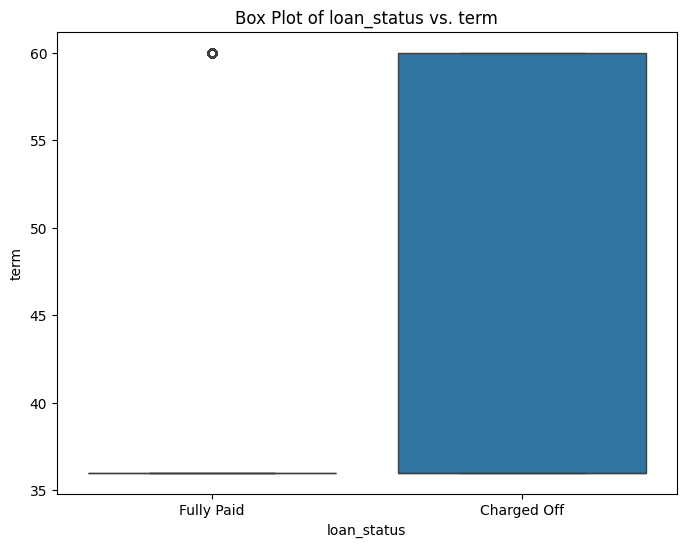

0.8649999999999967
22.585000000000004




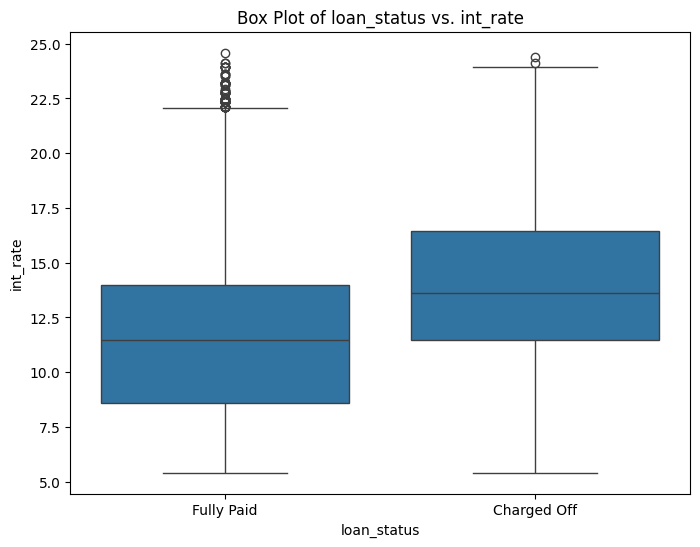

-8.5
19.5




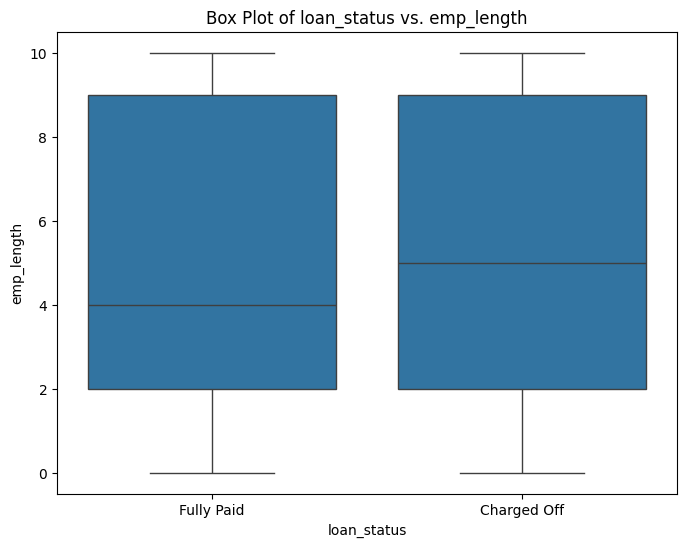

-22000.0
146000.0




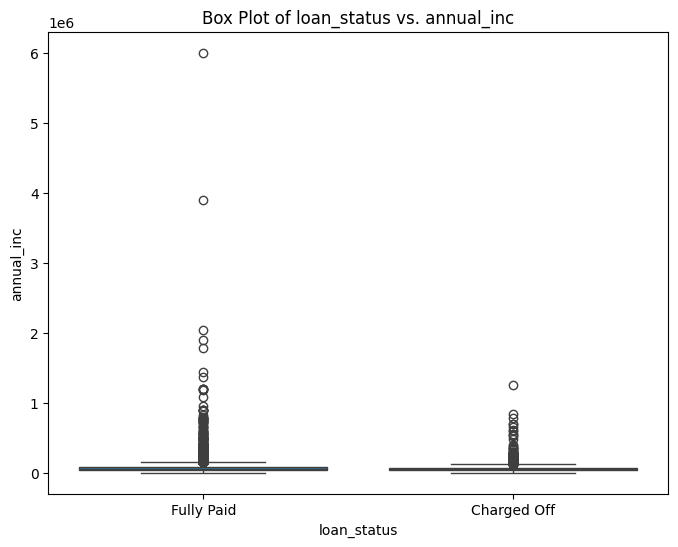

-7.4275
34.152499999999996




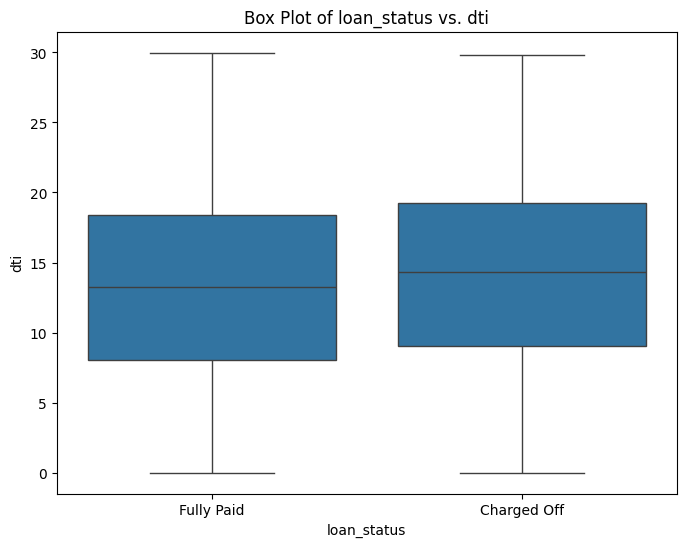

0.0
0.0




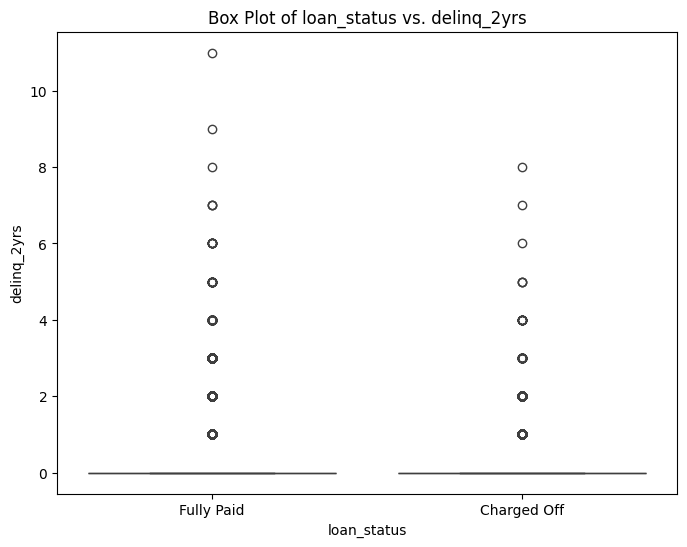

-1.5
2.5




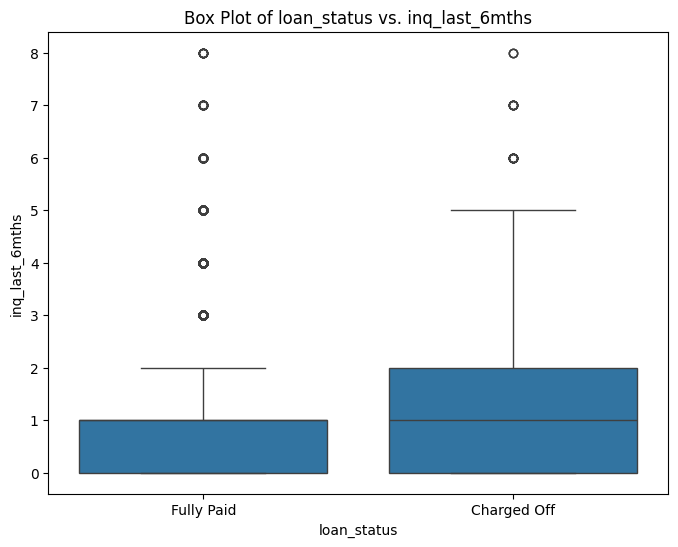

-8750.0
29250.0




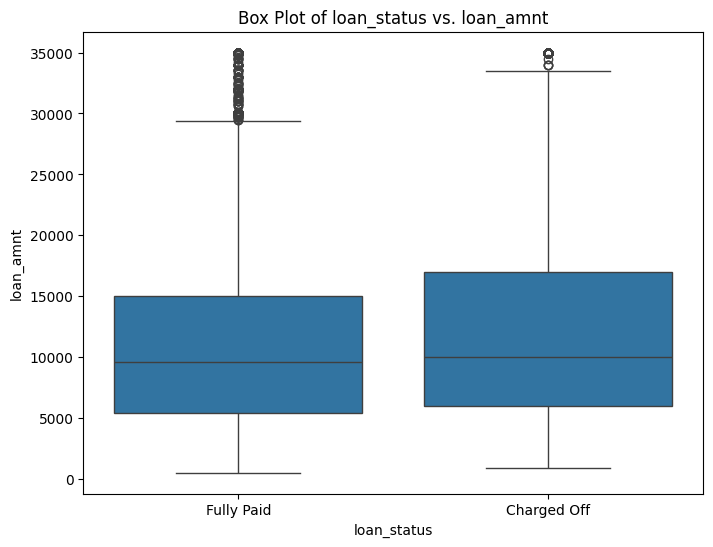

0.0
96.0




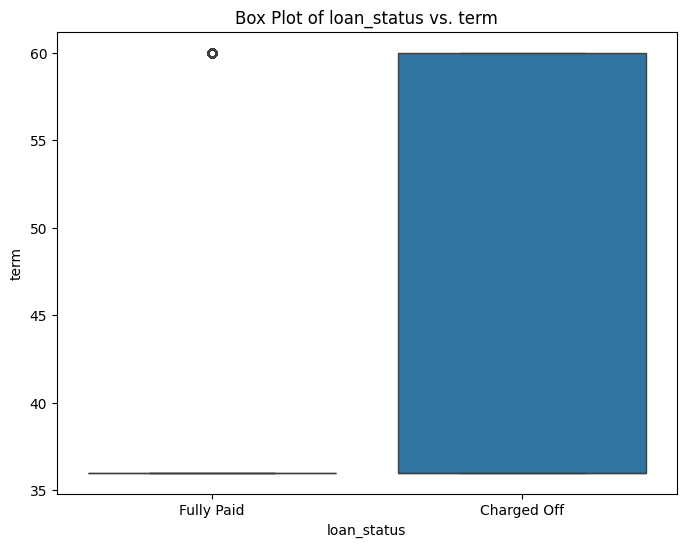

0.8649999999999967
22.585000000000004




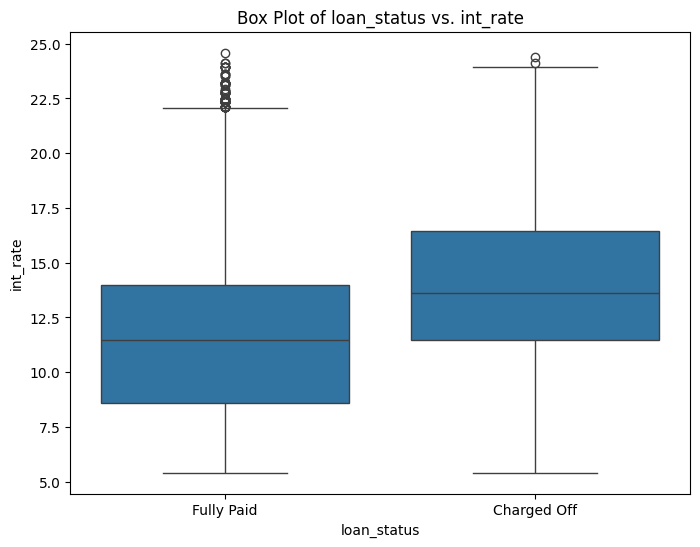

-8.5
19.5




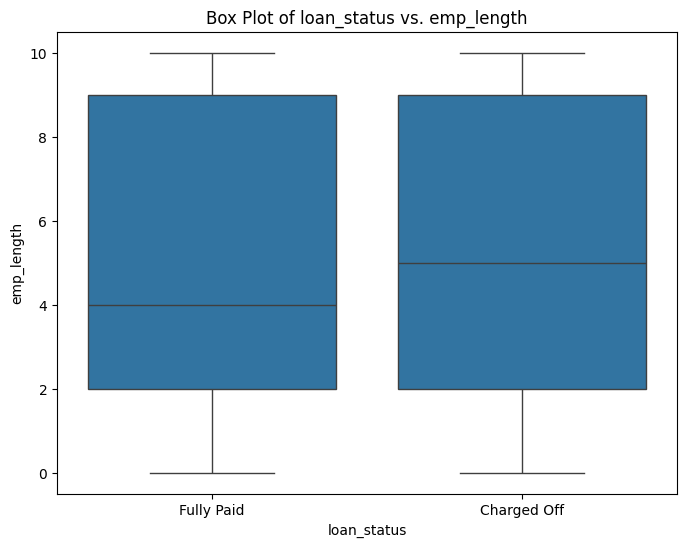

-22000.0
146000.0




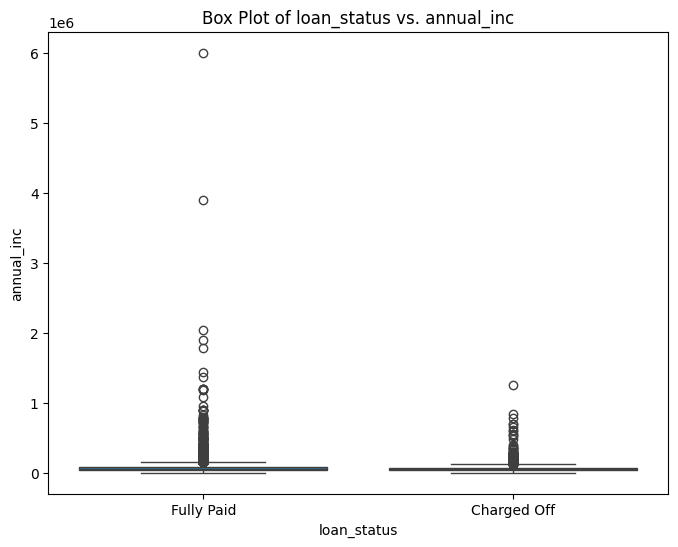

-7.4275
34.152499999999996




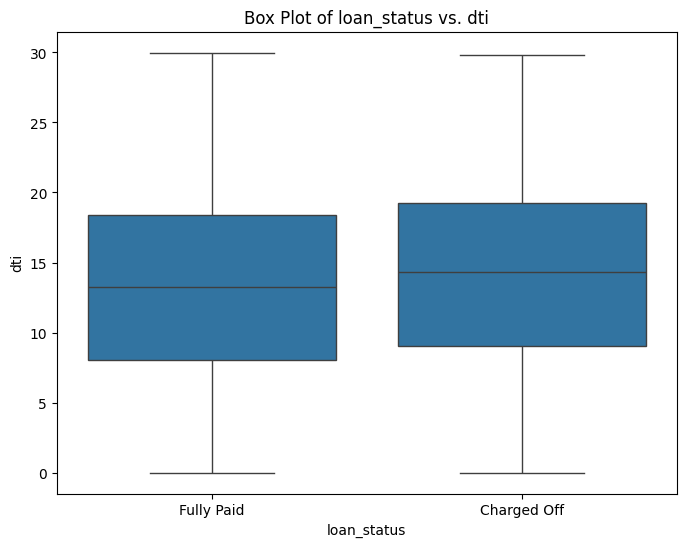

0.0
0.0




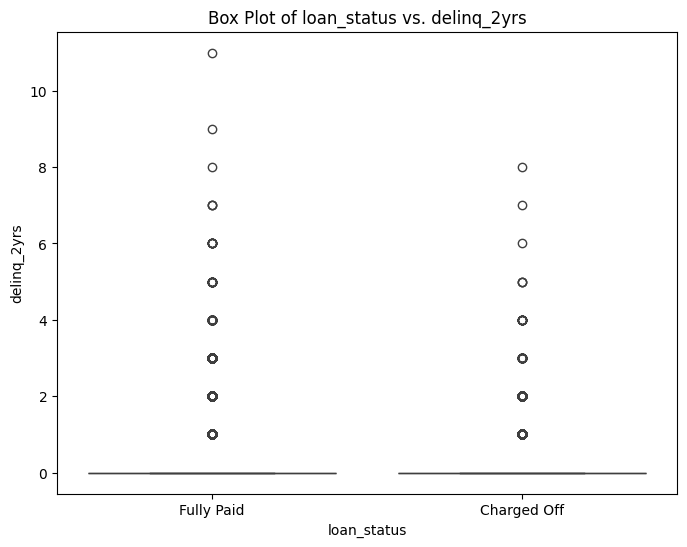

-1.5
2.5




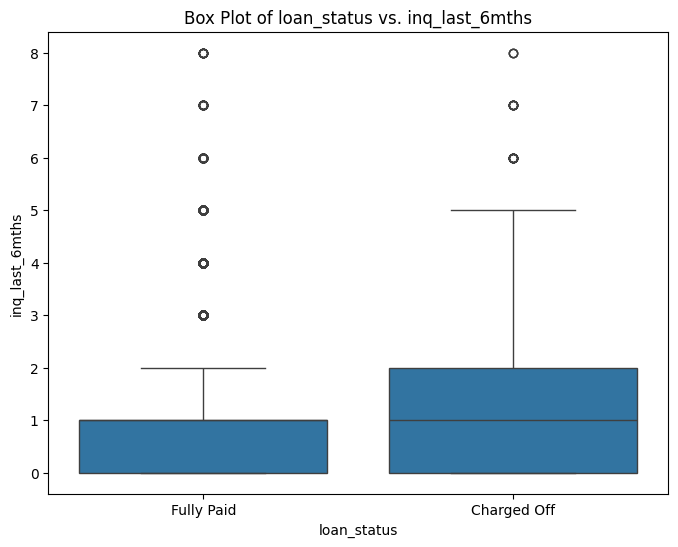

-3.0
21.0




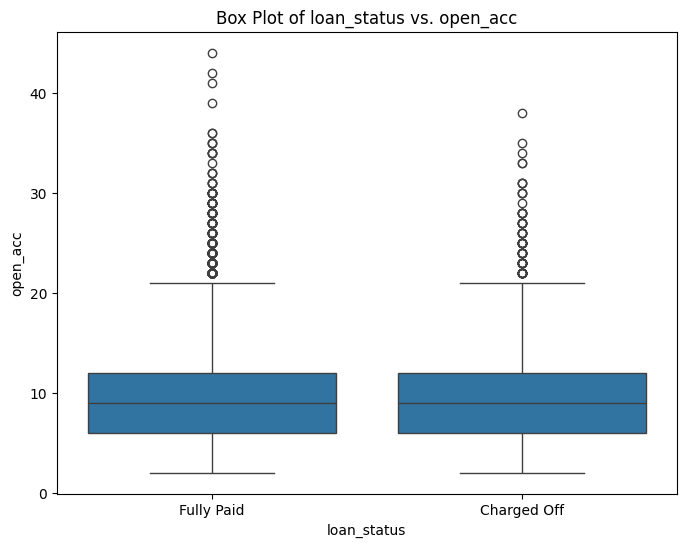

-8750.0
29250.0




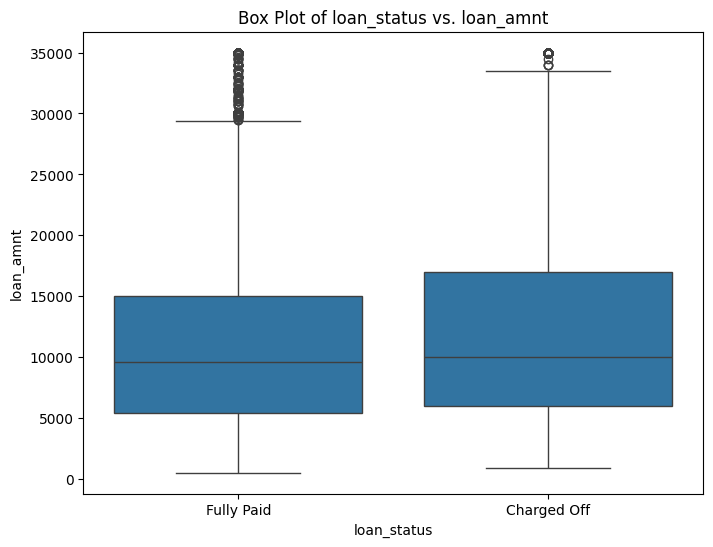

0.0
96.0




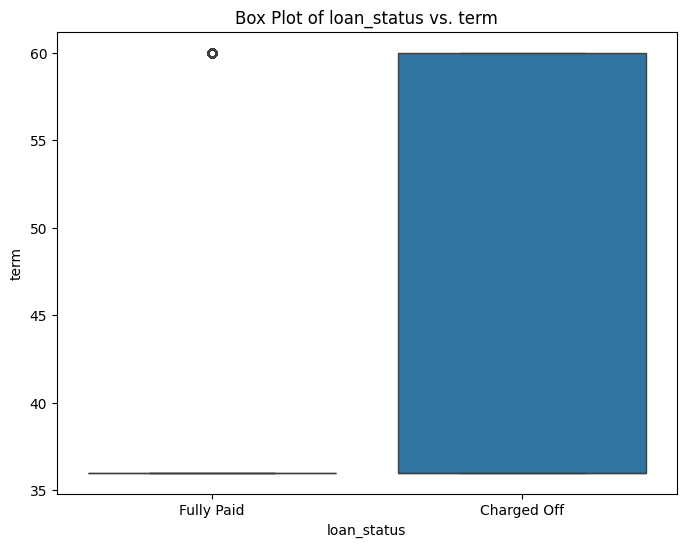

0.8649999999999967
22.585000000000004




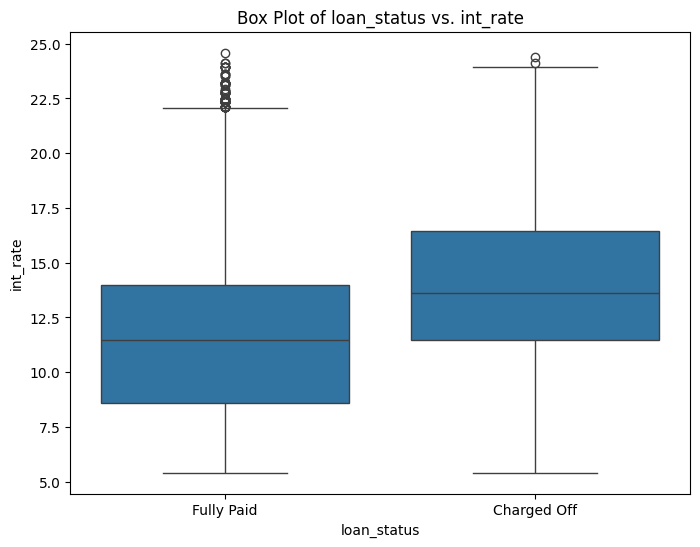

-8.5
19.5




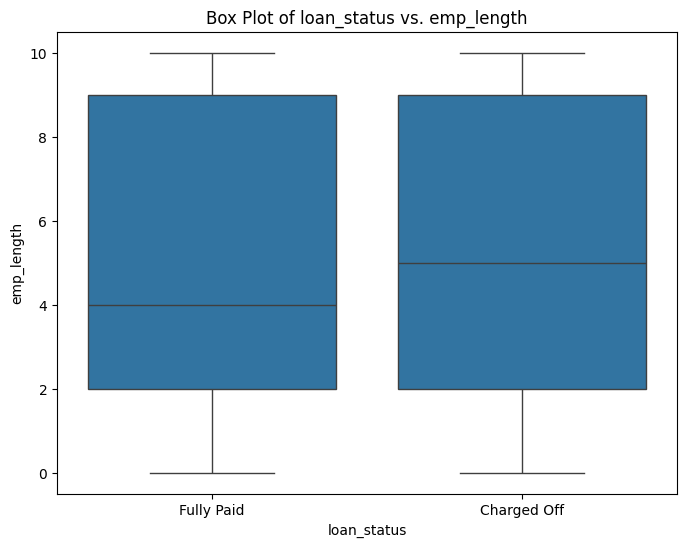

-22000.0
146000.0




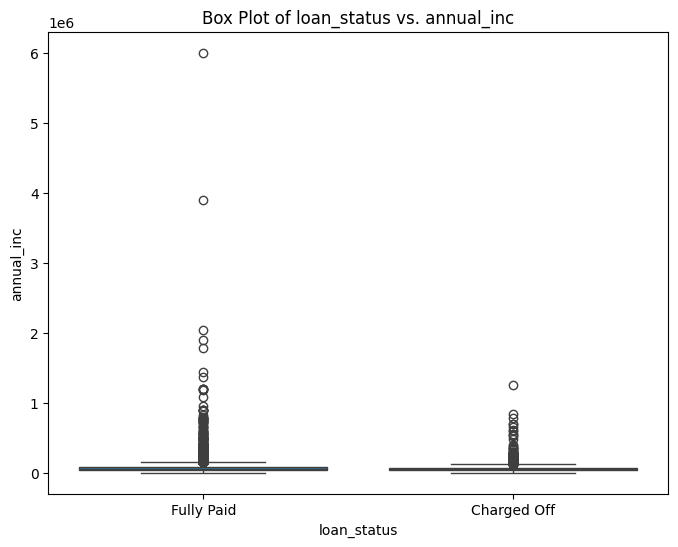

-7.4275
34.152499999999996




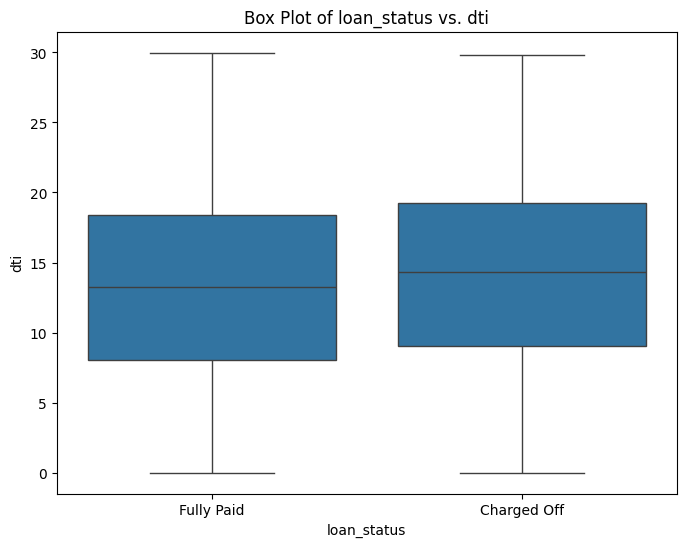

0.0
0.0




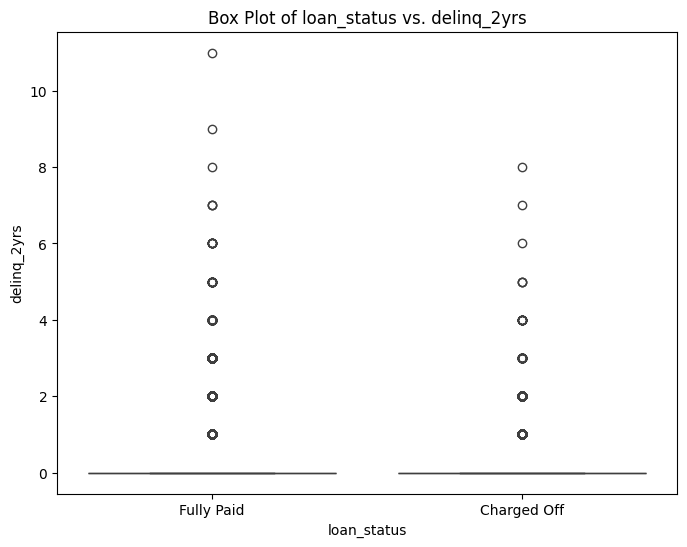

-1.5
2.5




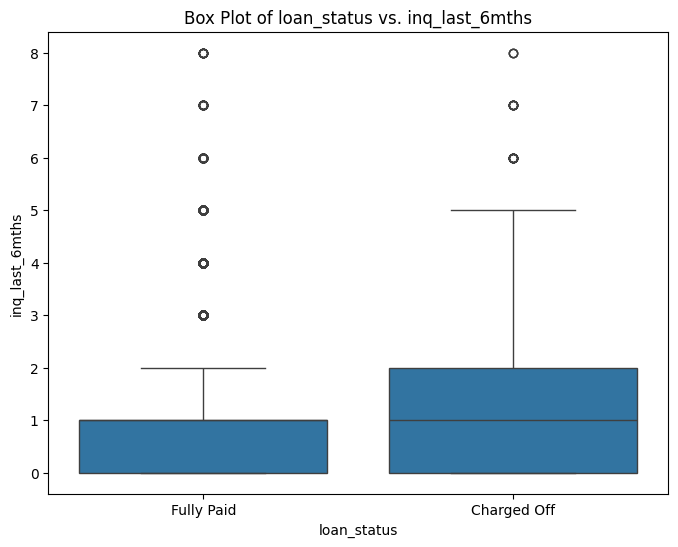

-3.0
21.0




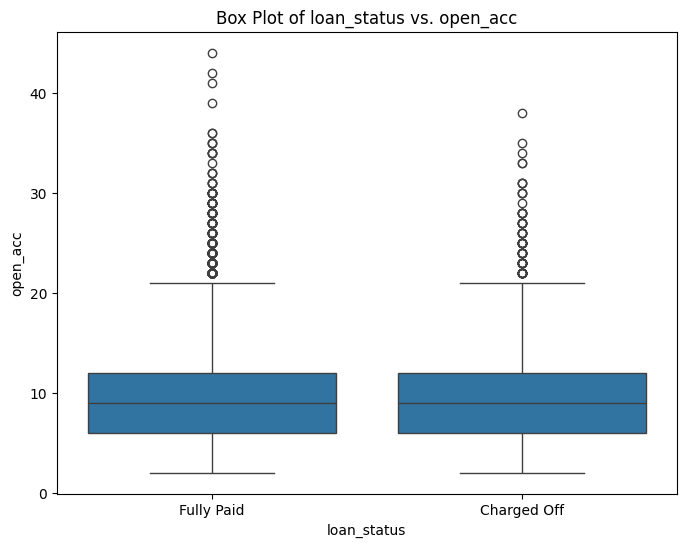

0.0
0.0




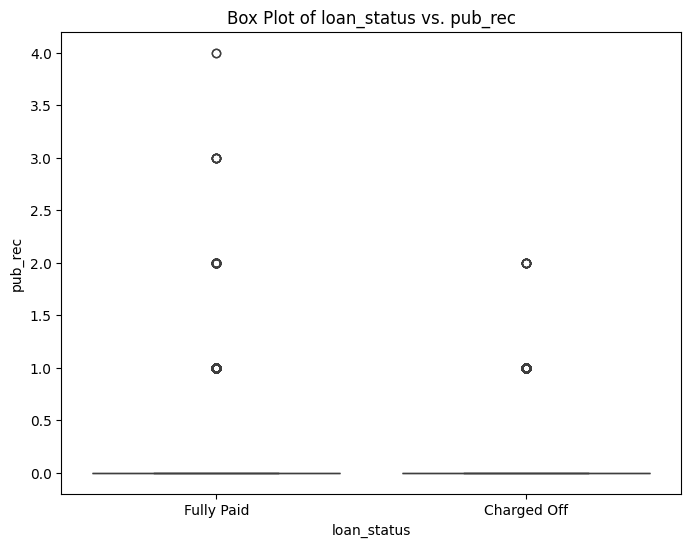

-8750.0
29250.0




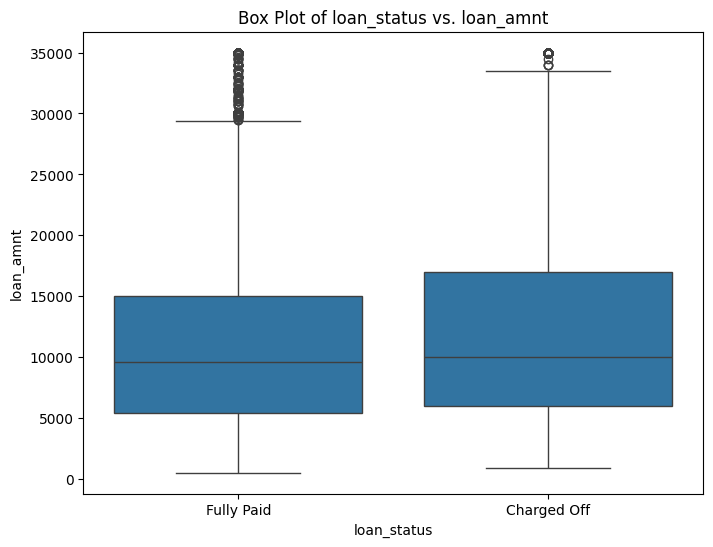

0.0
96.0




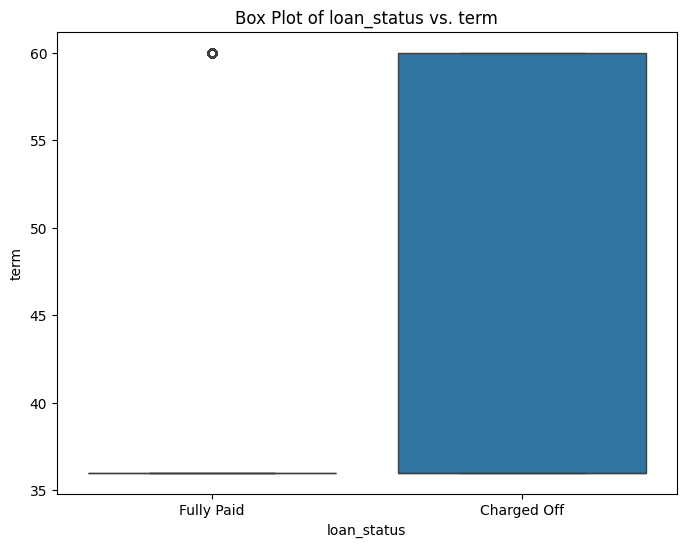

0.8649999999999967
22.585000000000004




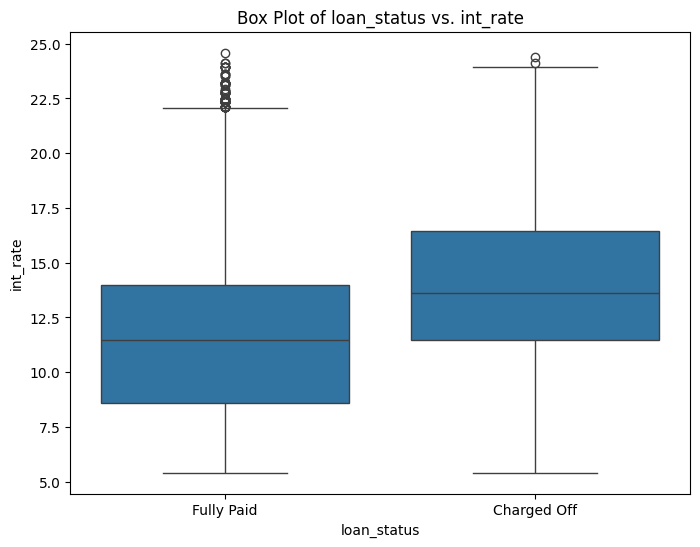

-8.5
19.5




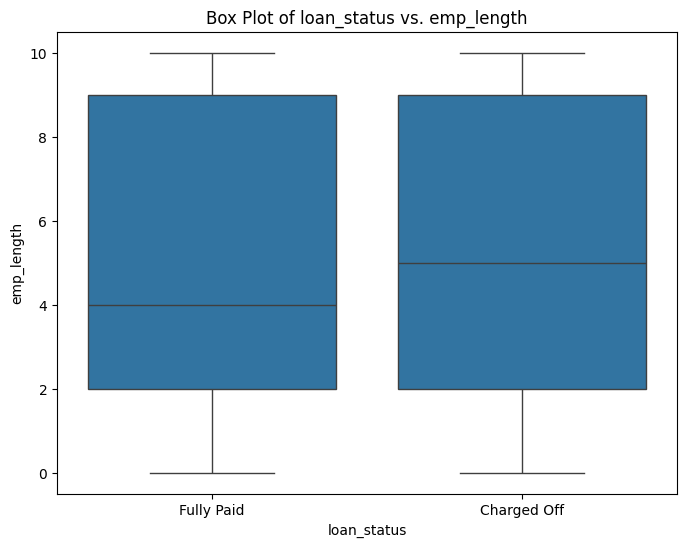

-22000.0
146000.0




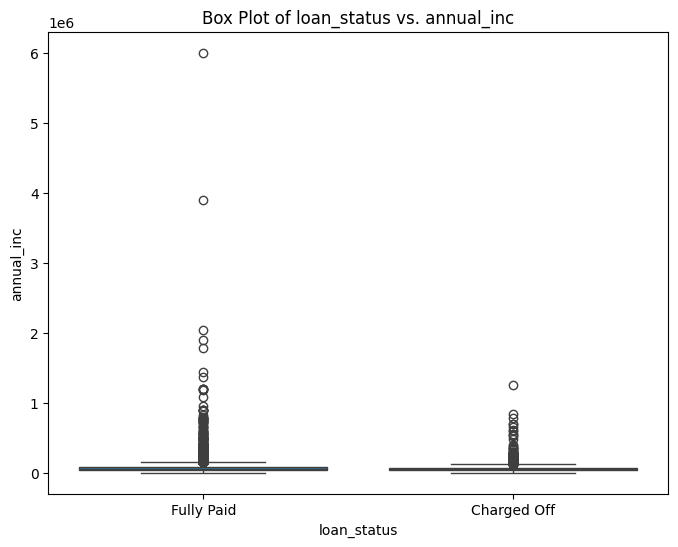

-7.4275
34.152499999999996




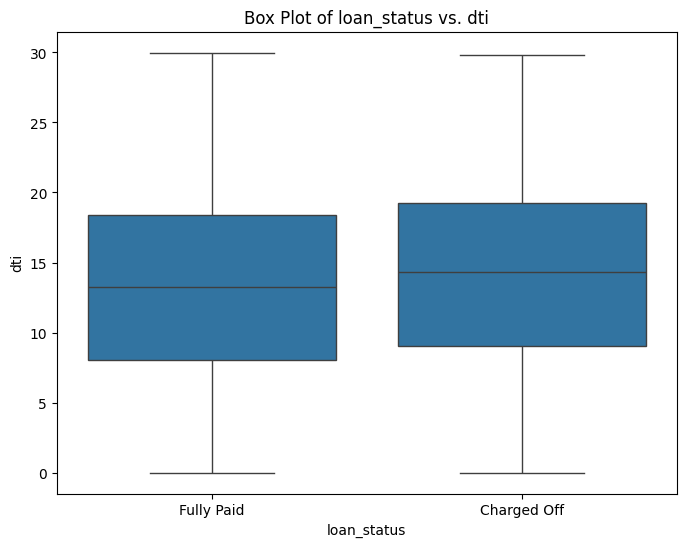

0.0
0.0




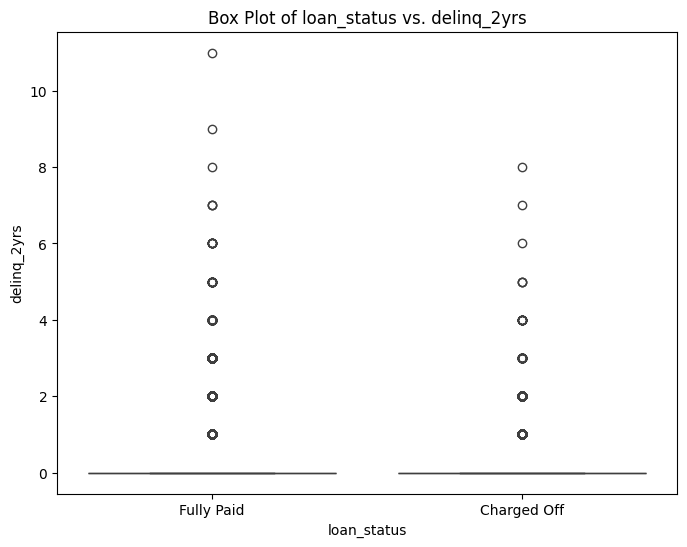

-1.5
2.5




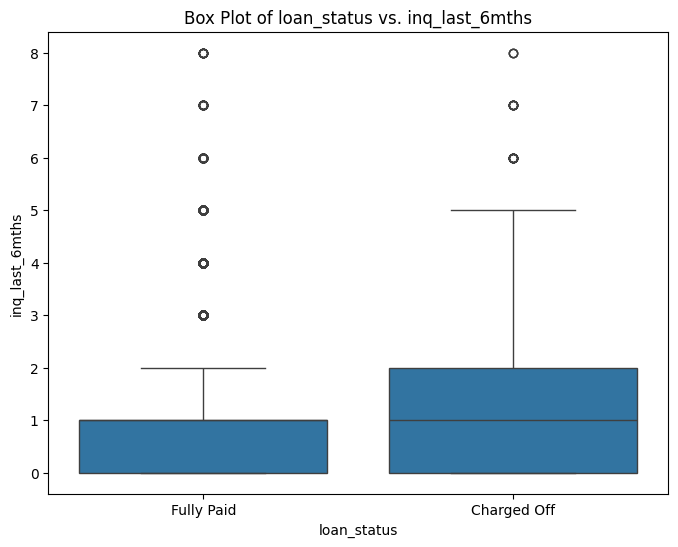

-3.0
21.0




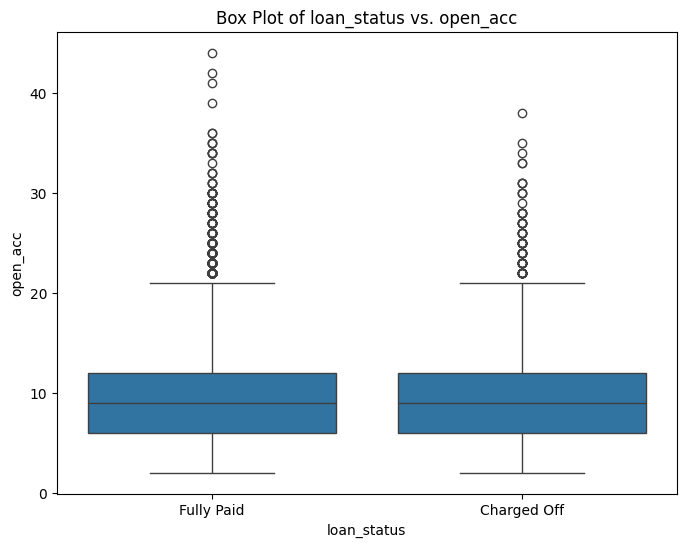

0.0
0.0




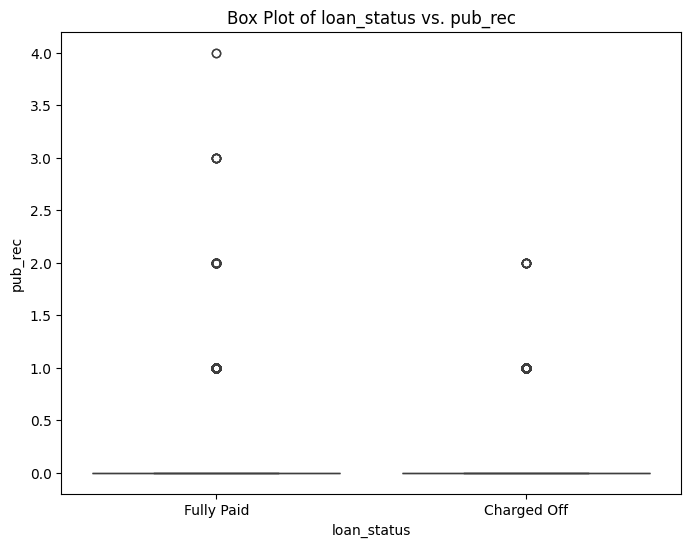

-16281.25
37032.75




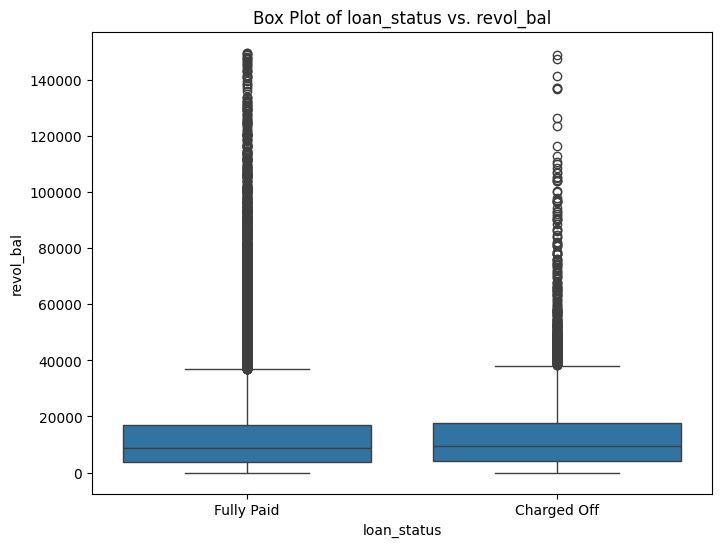

-8750.0
29250.0




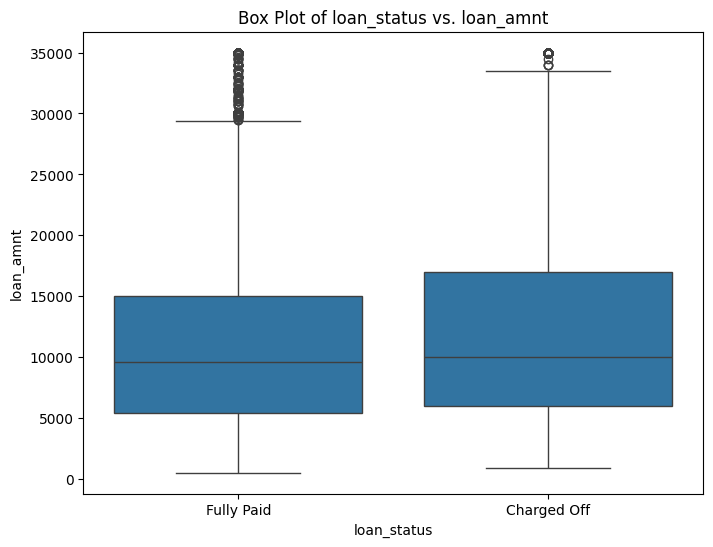

0.0
96.0




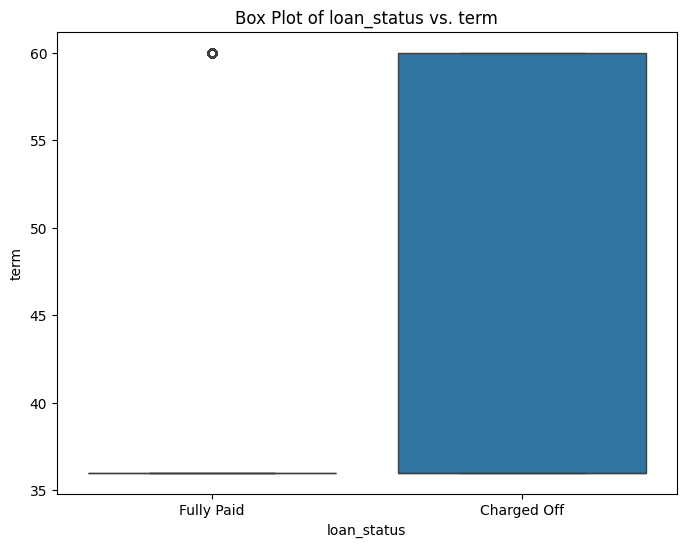

0.8649999999999967
22.585000000000004




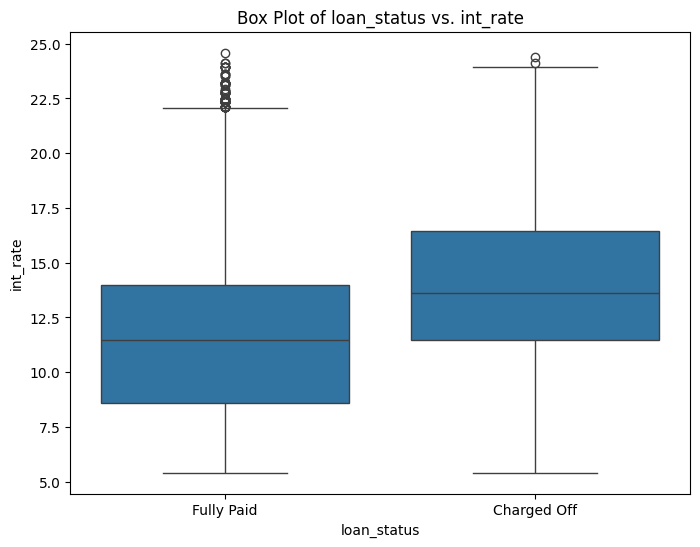

-8.5
19.5




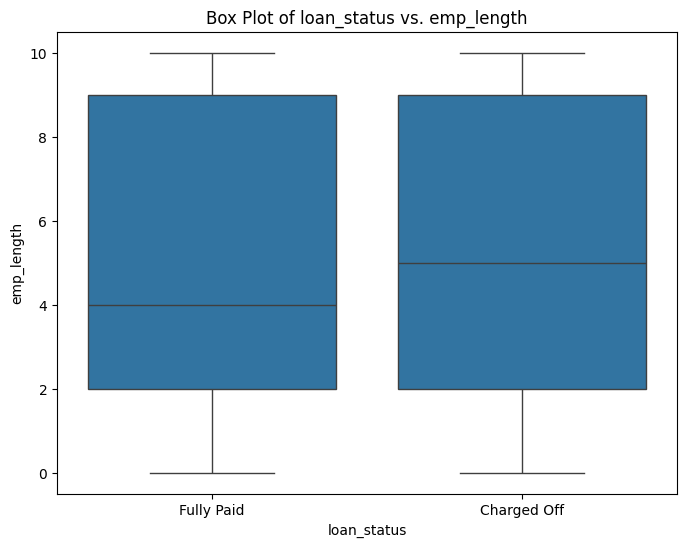

-22000.0
146000.0




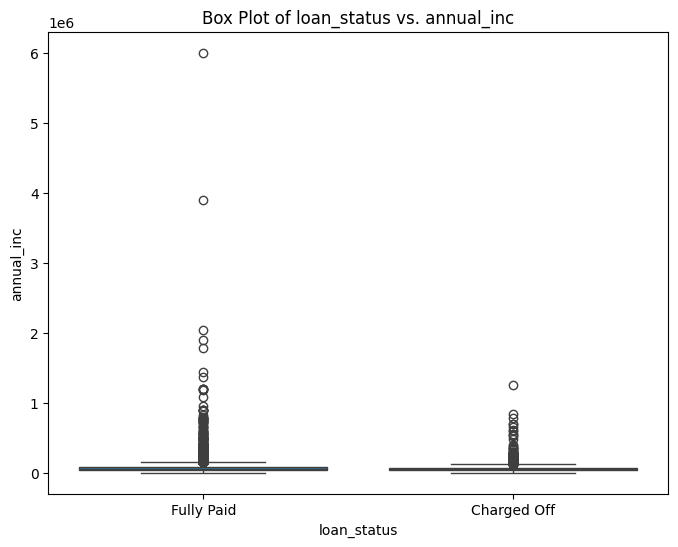

-7.4275
34.152499999999996




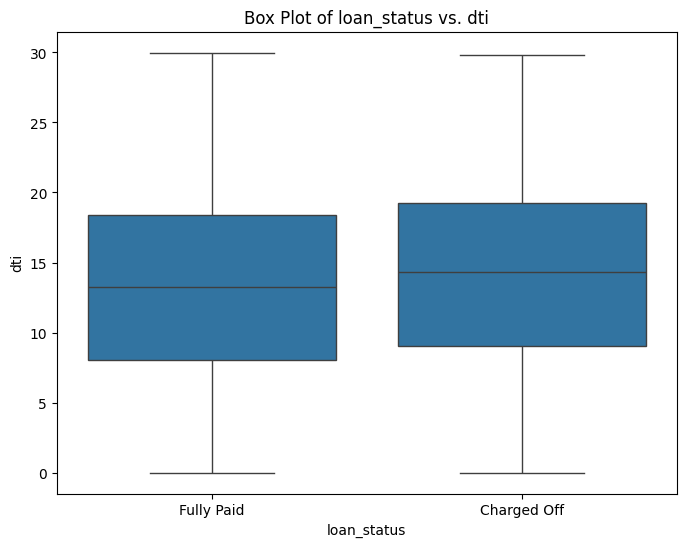

0.0
0.0




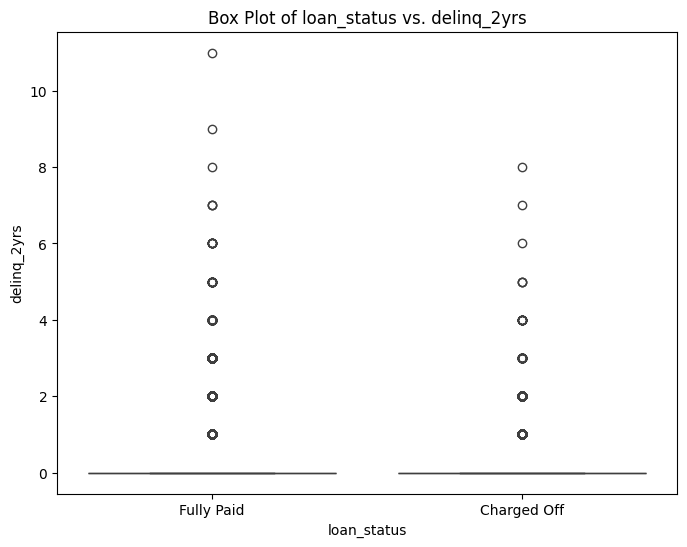

-1.5
2.5




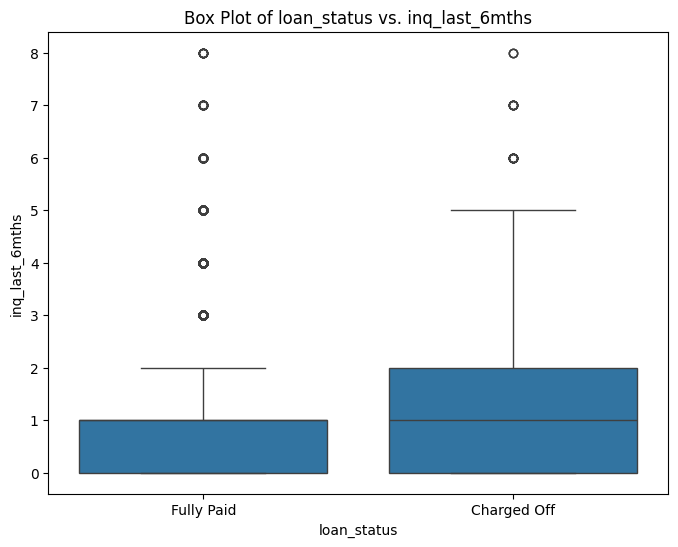

-3.0
21.0




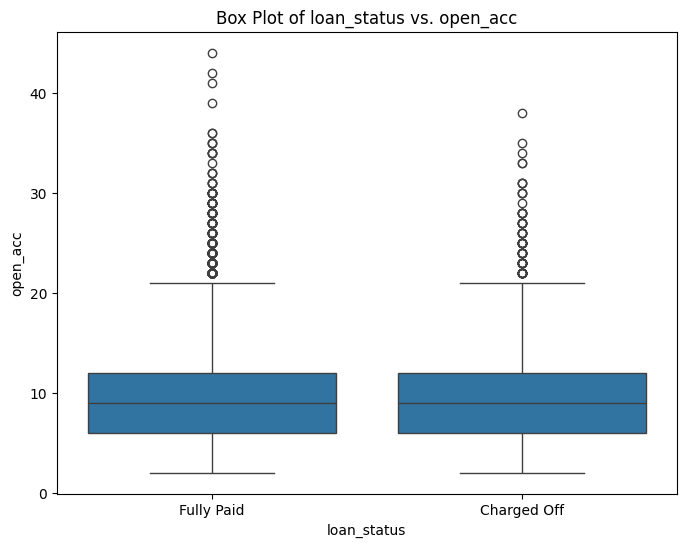

0.0
0.0




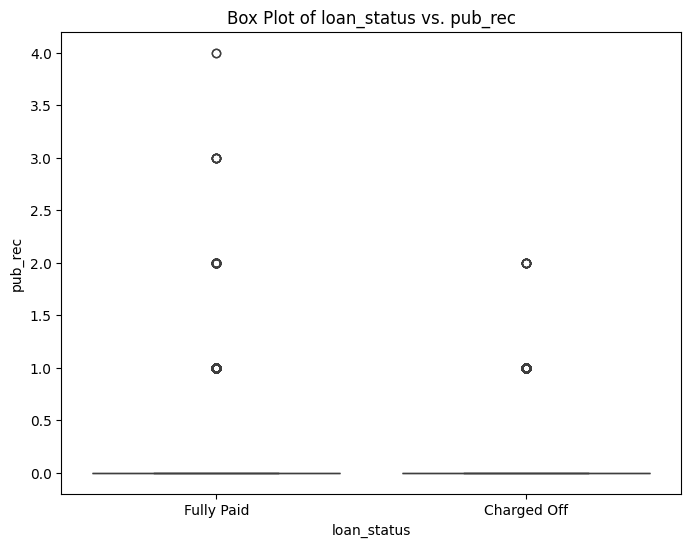

-16281.25
37032.75




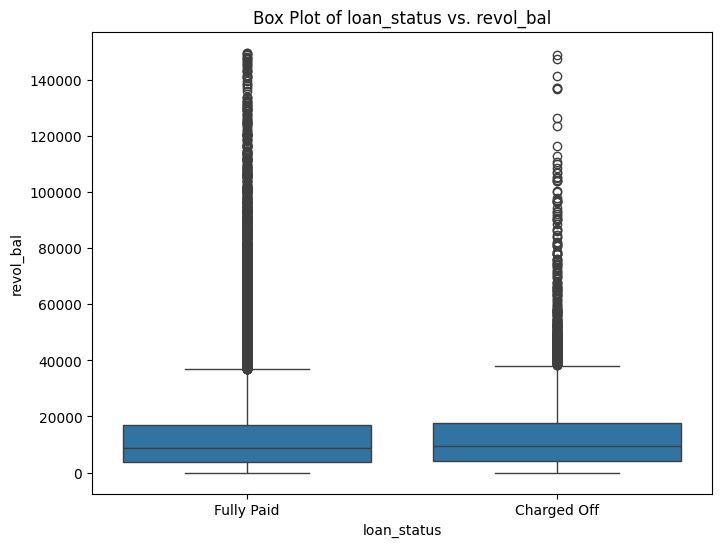

-44.85000000000001
142.75




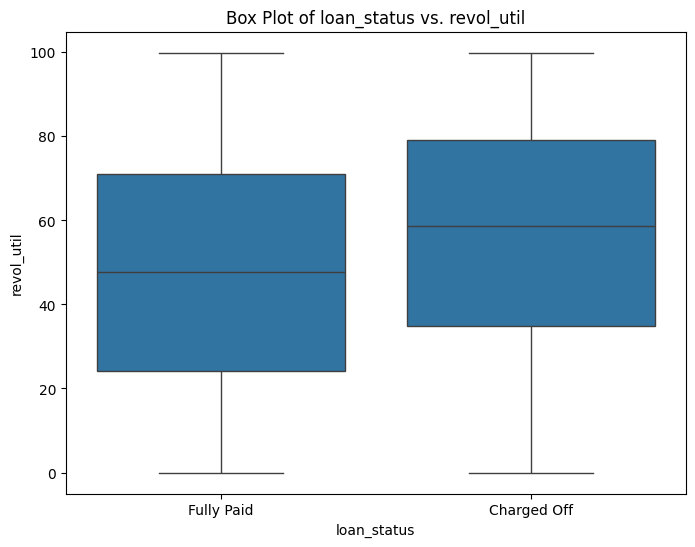

-8750.0
29250.0




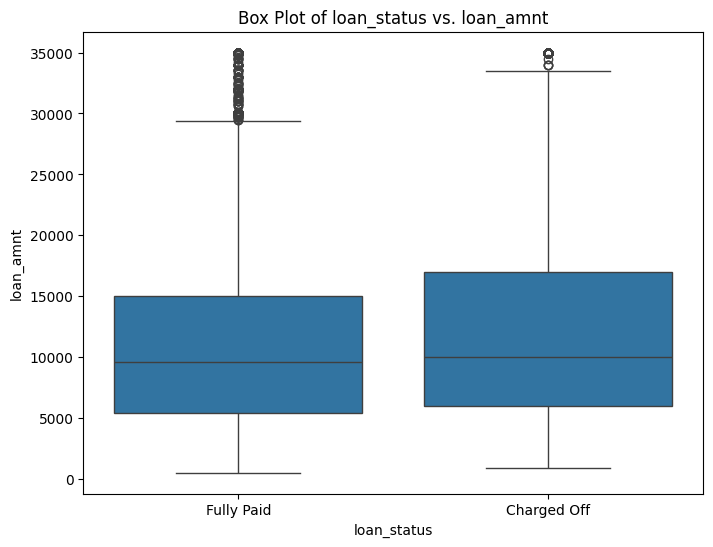

0.0
96.0




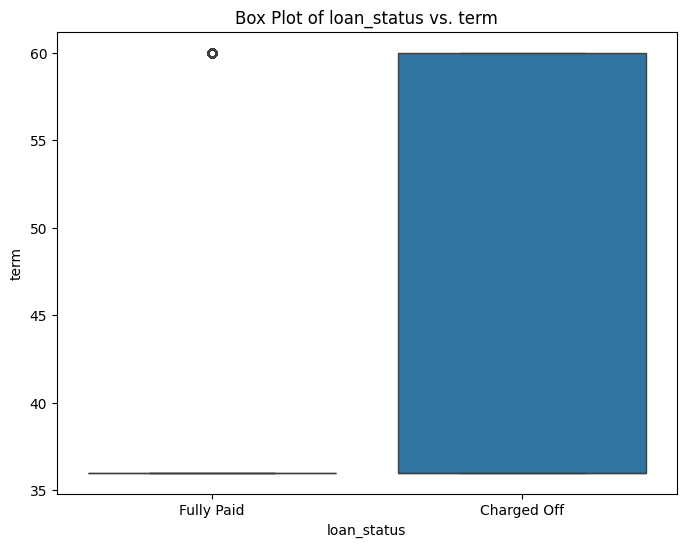

0.8649999999999967
22.585000000000004




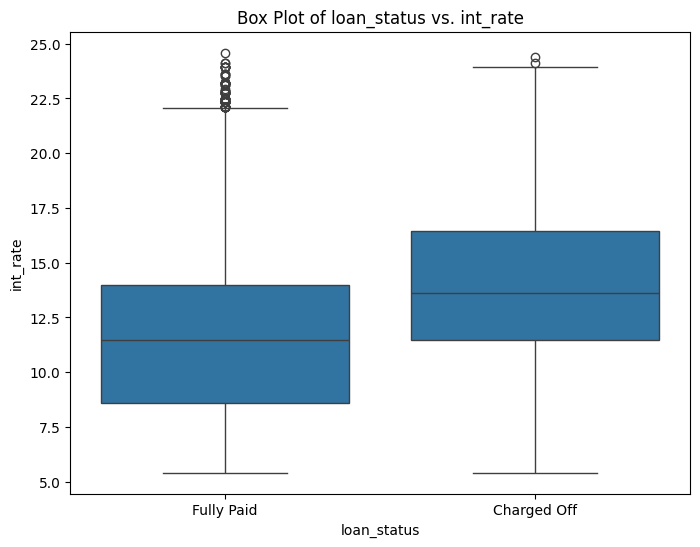

-8.5
19.5




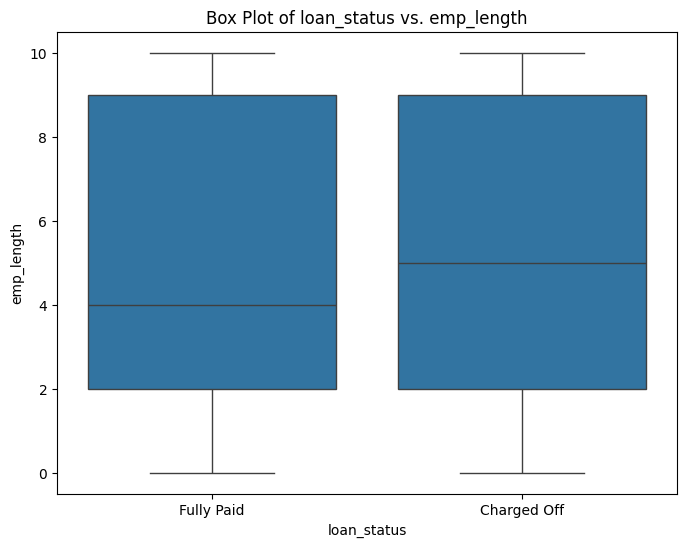

-22000.0
146000.0




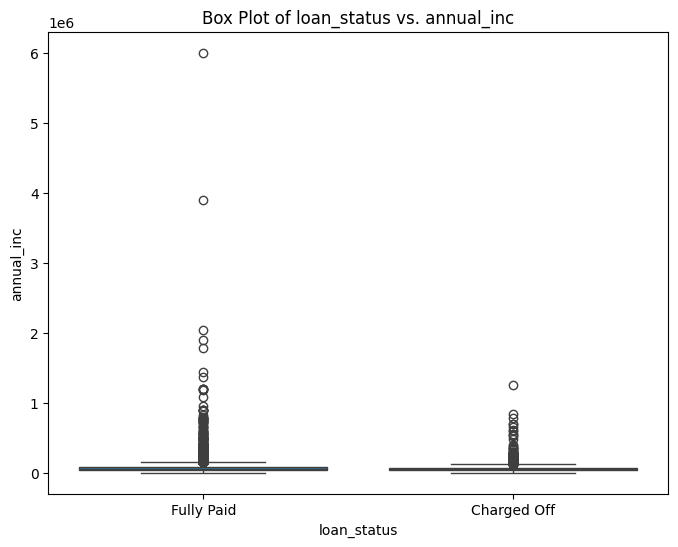

-7.4275
34.152499999999996




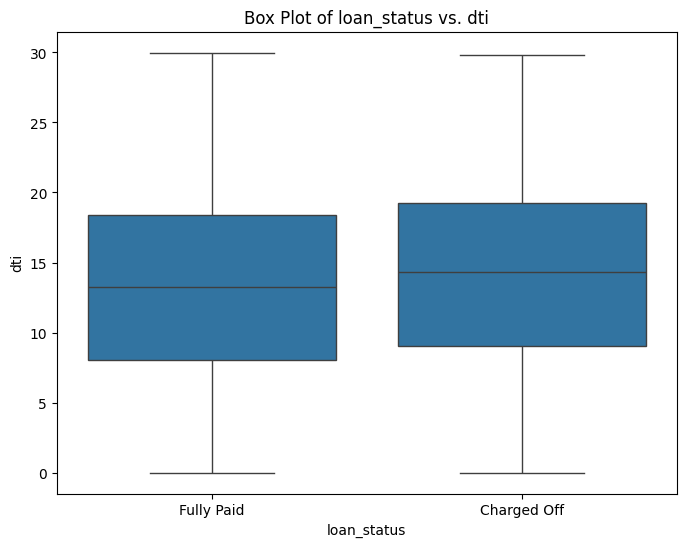

0.0
0.0




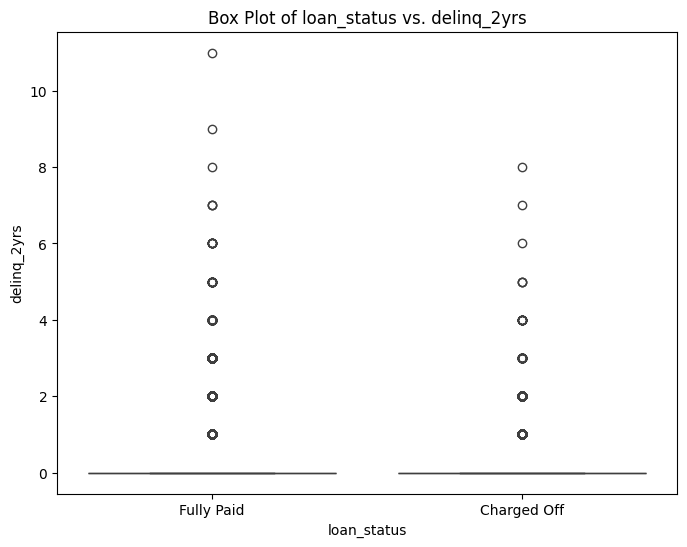

-1.5
2.5




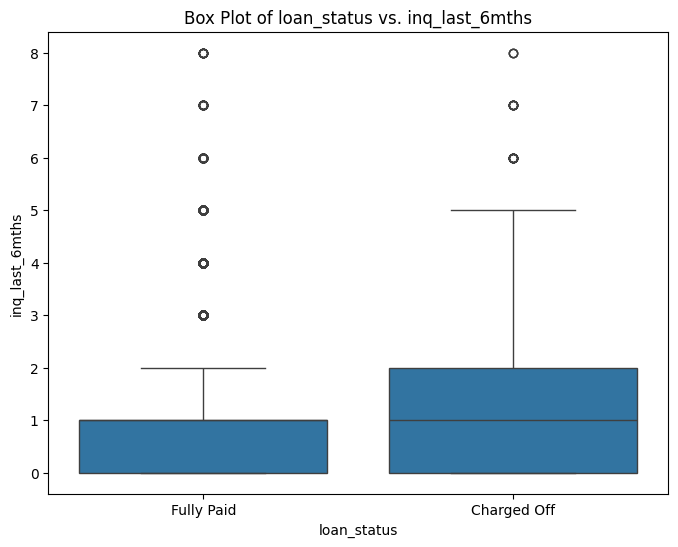

-3.0
21.0




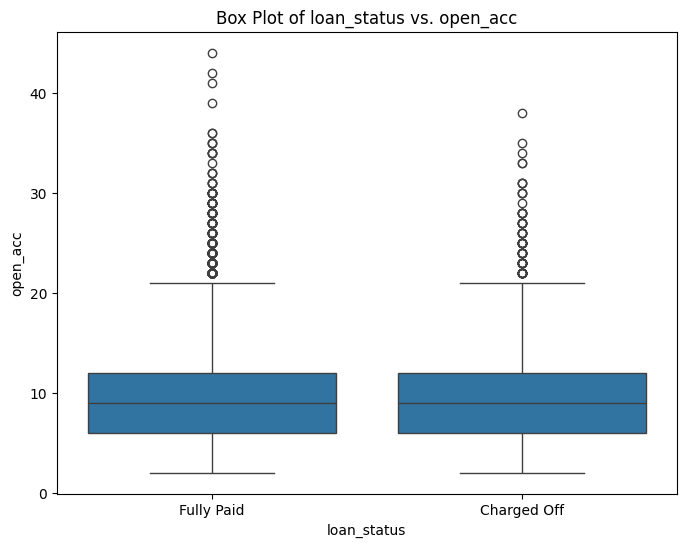

0.0
0.0




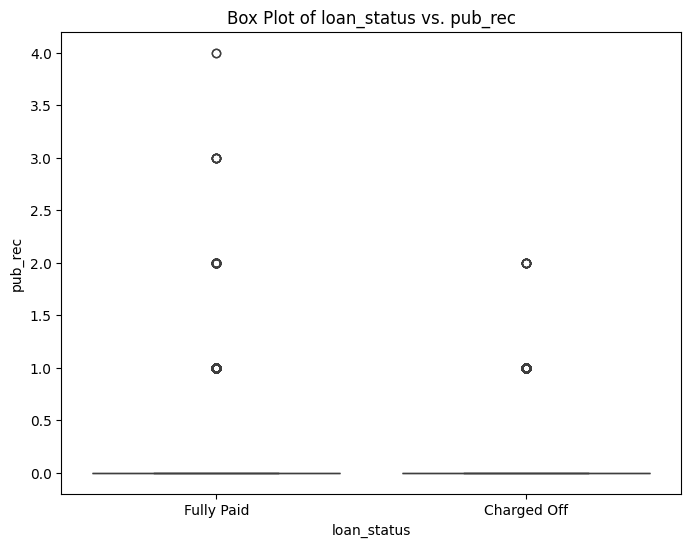

-16281.25
37032.75




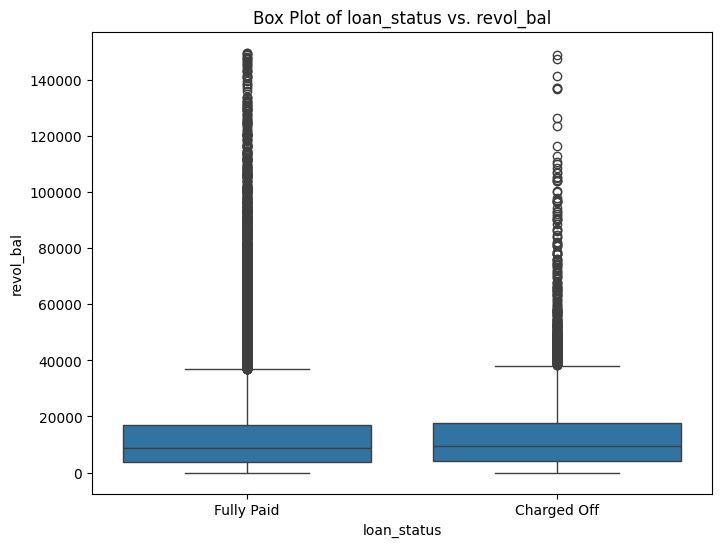

-44.85000000000001
142.75




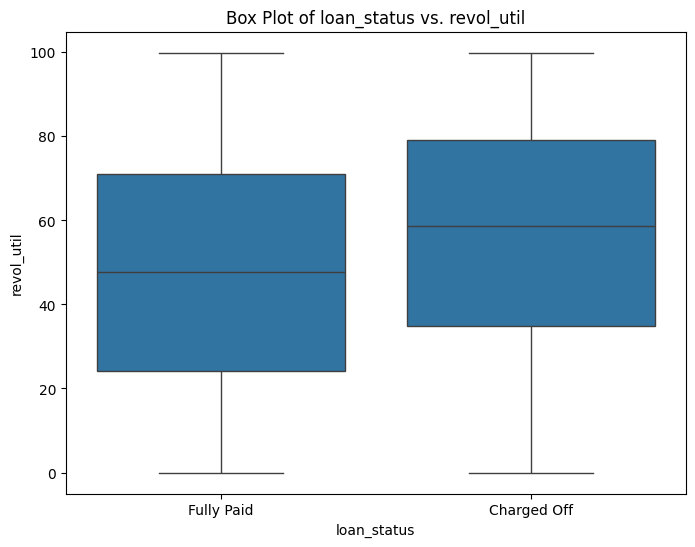

-8.5
51.5




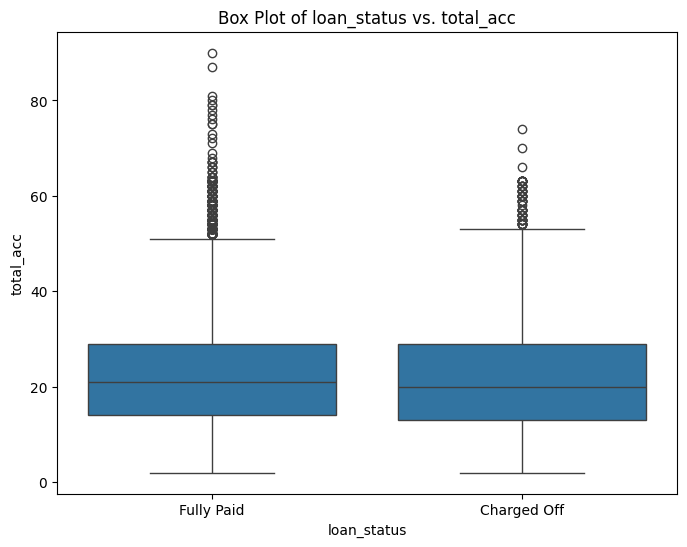

-8750.0
29250.0




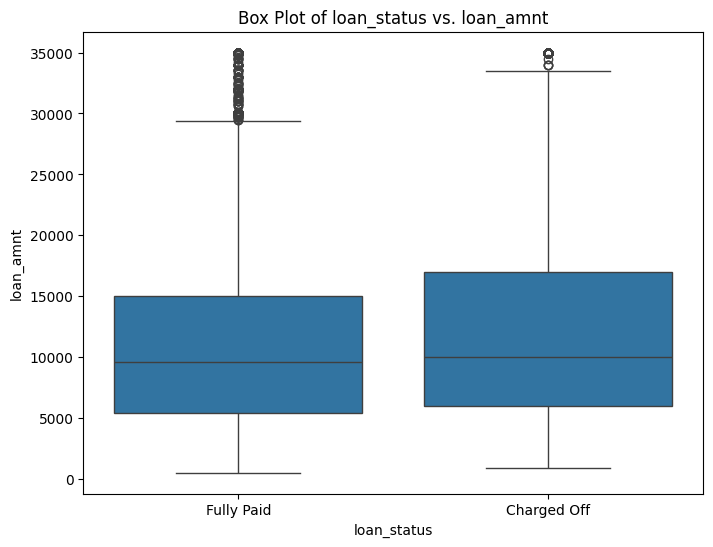

0.0
96.0




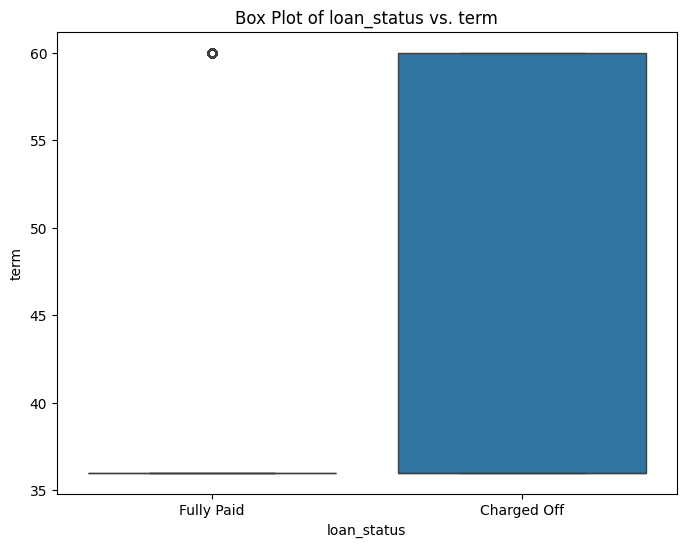

0.8649999999999967
22.585000000000004




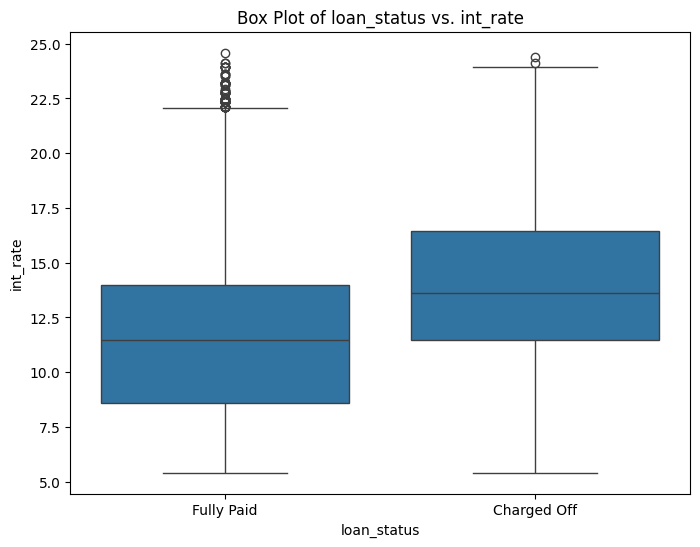

-8.5
19.5




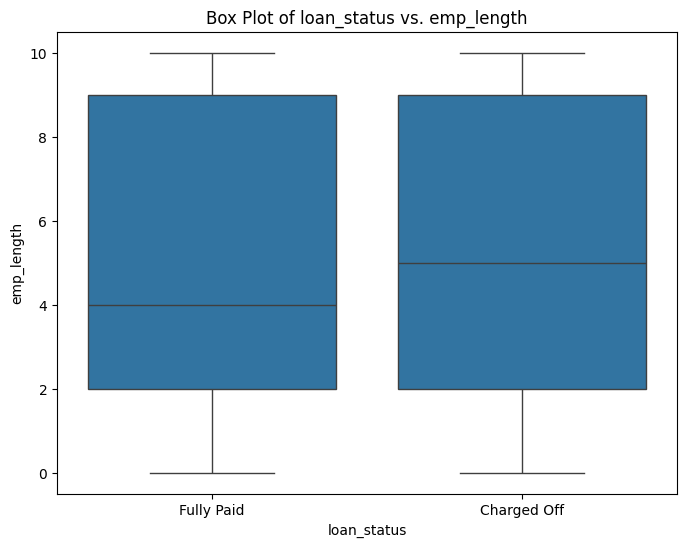

-22000.0
146000.0




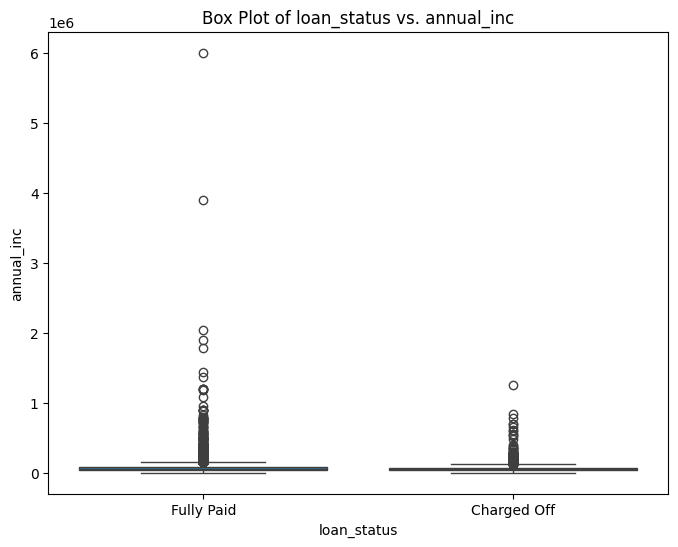

-7.4275
34.152499999999996




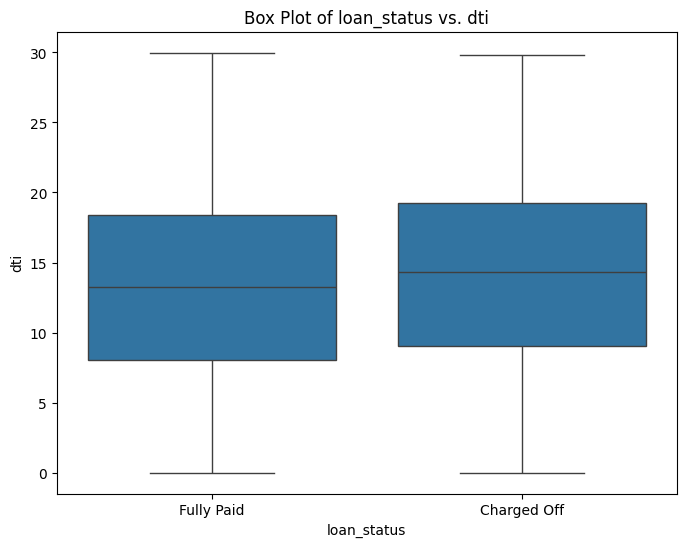

0.0
0.0




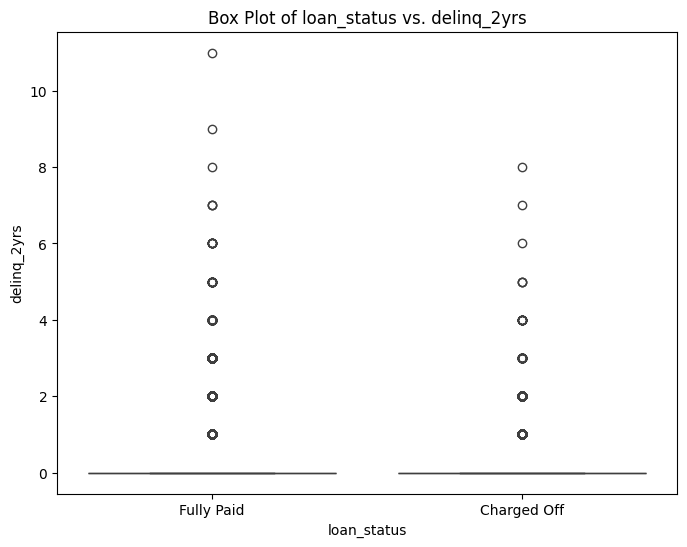

-1.5
2.5




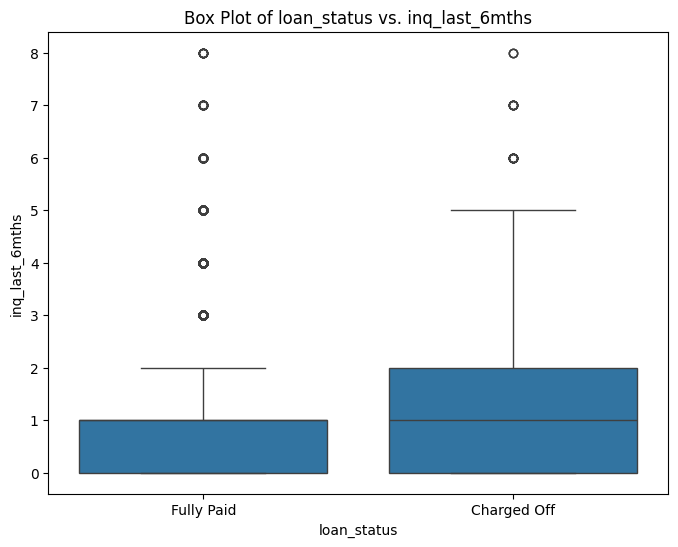

-3.0
21.0




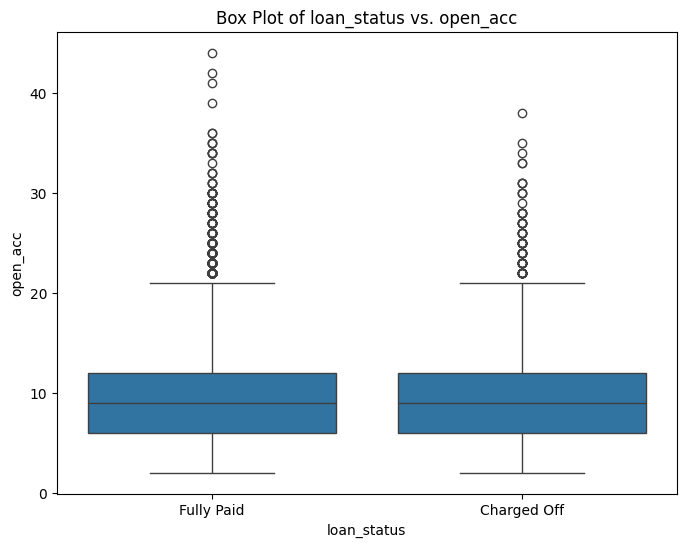

0.0
0.0




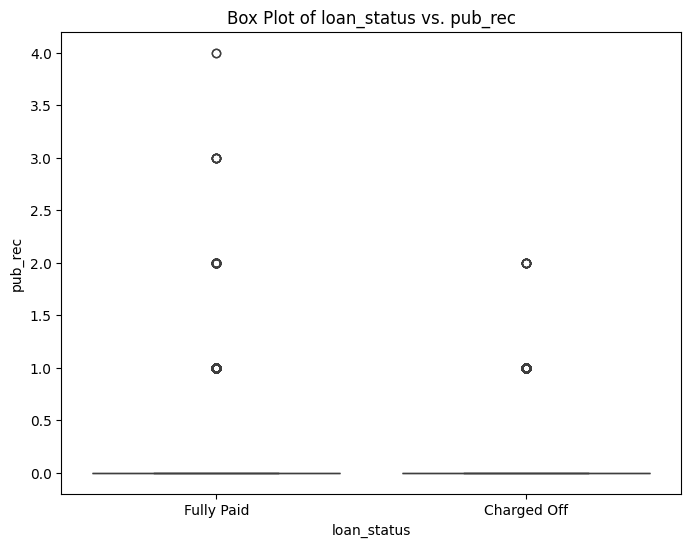

-16281.25
37032.75




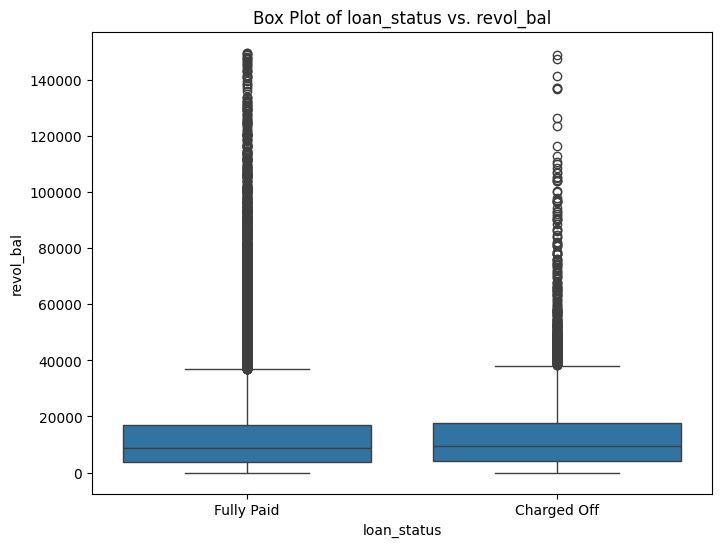

-44.85000000000001
142.75




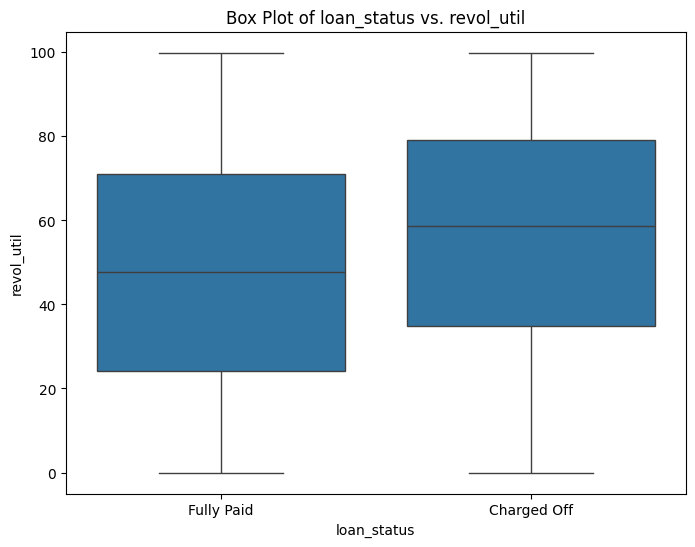

-8.5
51.5




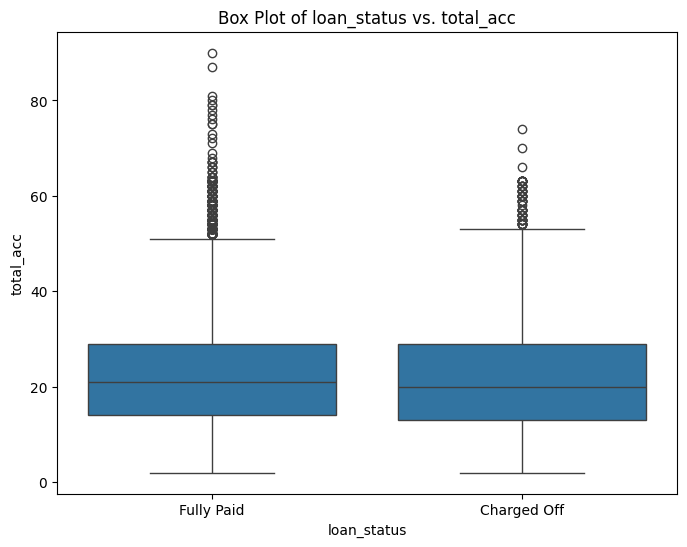

-8750.0
29250.0




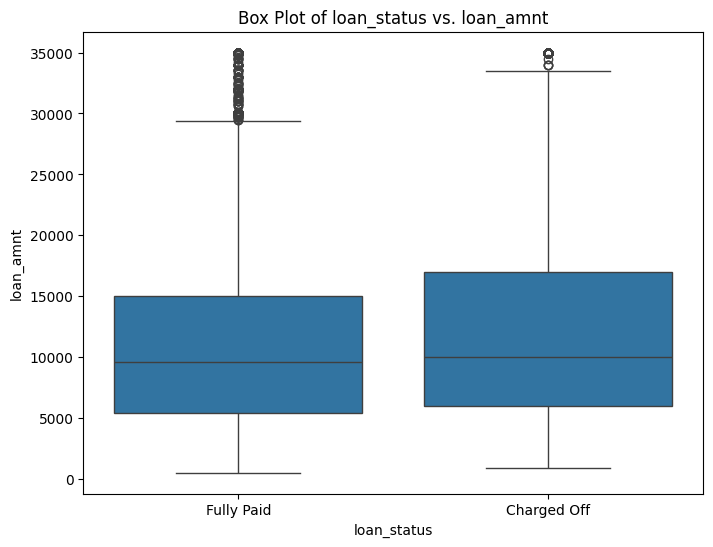

0.0
96.0




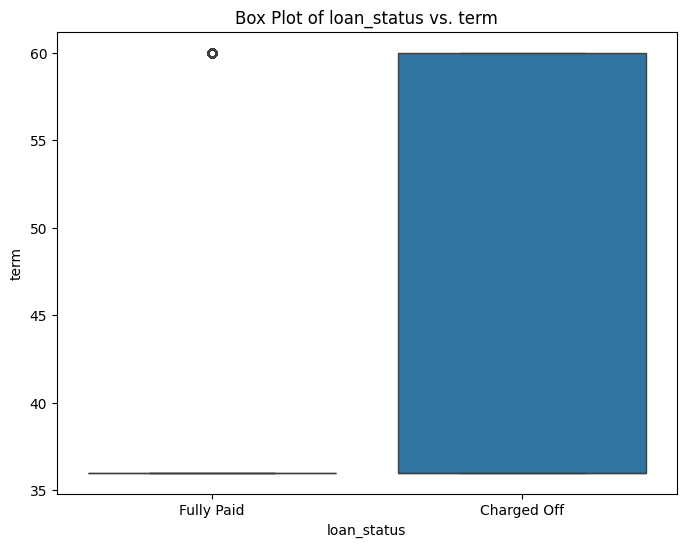

0.8649999999999967
22.585000000000004




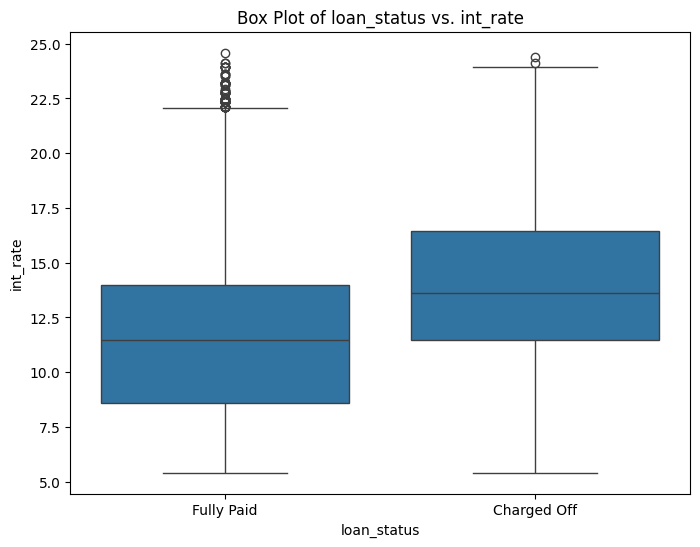

-8.5
19.5




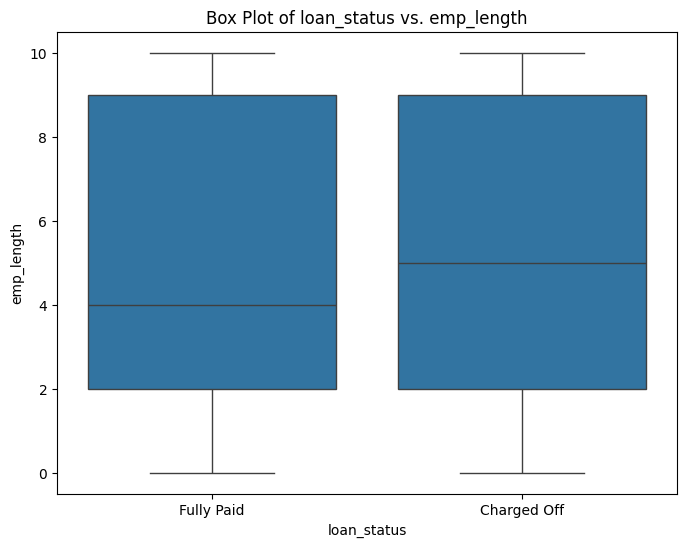

-22000.0
146000.0




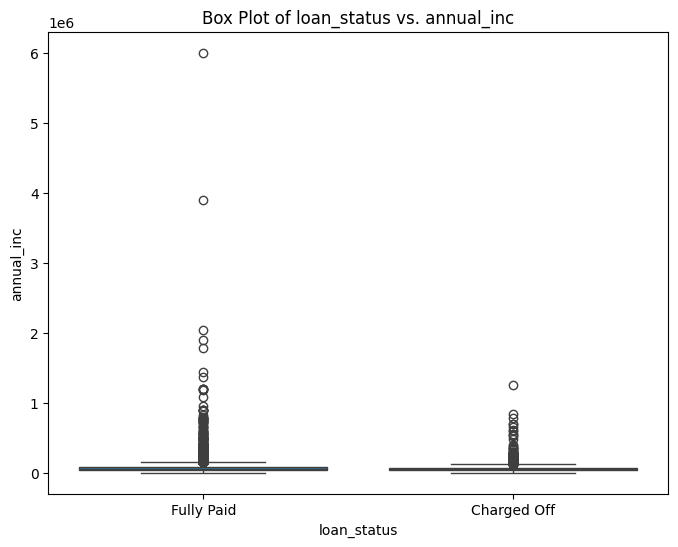

-7.4275
34.152499999999996




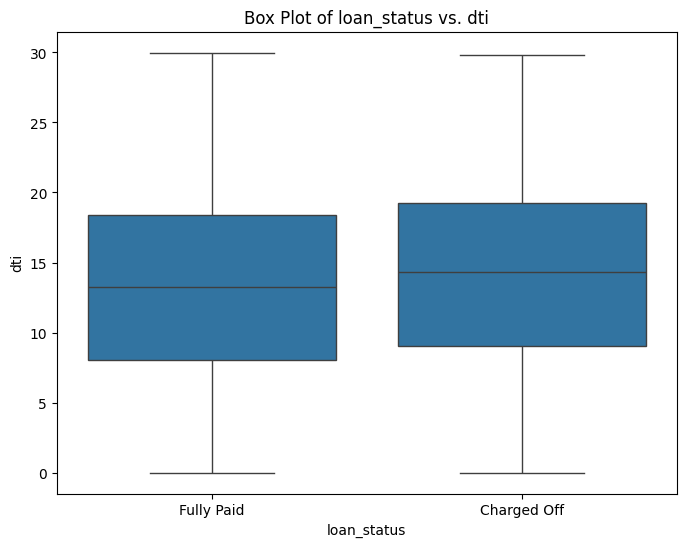

0.0
0.0




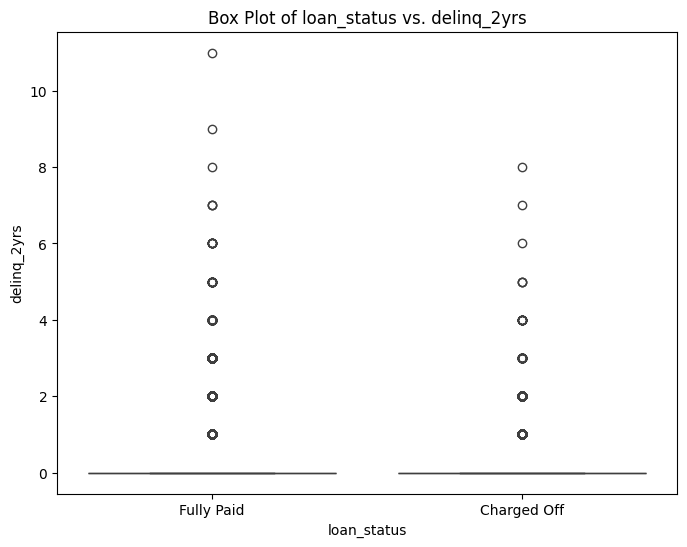

-1.5
2.5




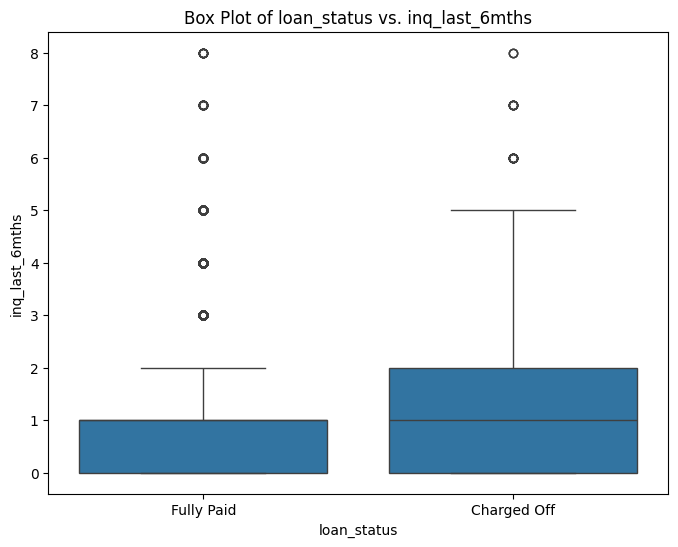

-3.0
21.0




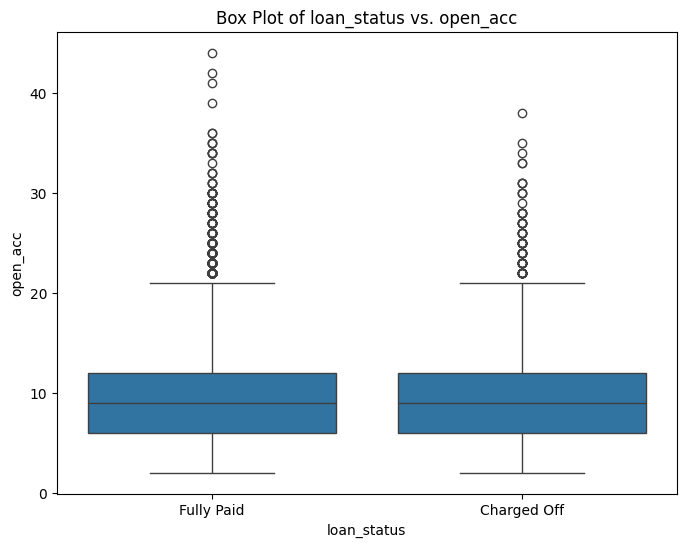

0.0
0.0




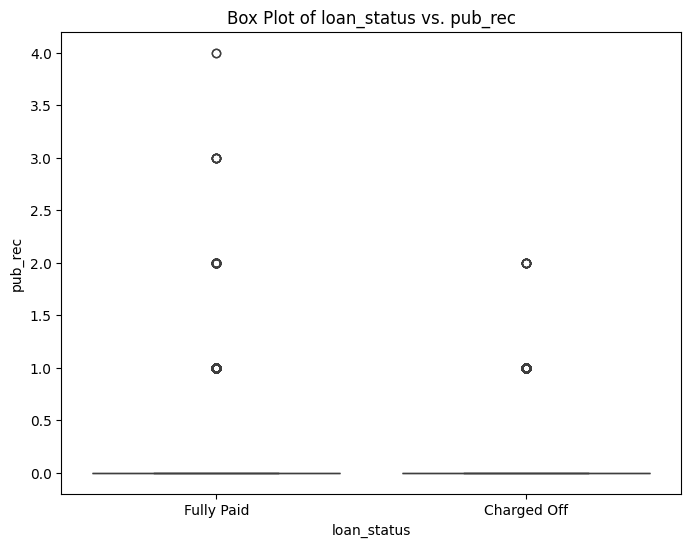

-16281.25
37032.75




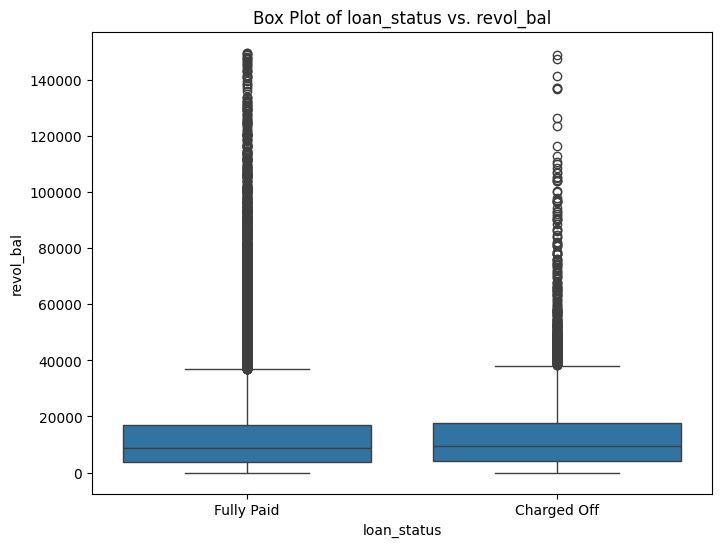

-44.85000000000001
142.75




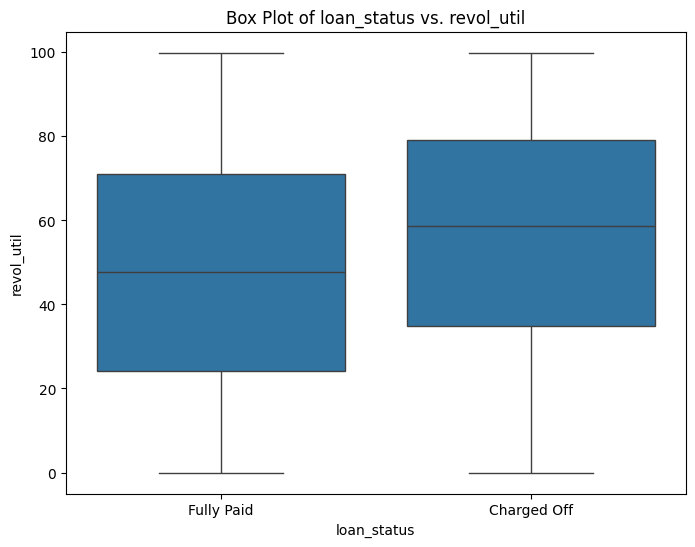

-8.5
51.5




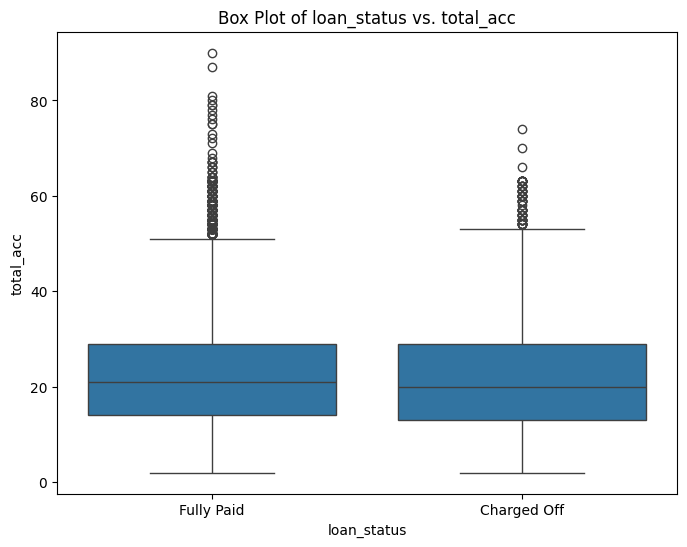

In [ ]:
#BIvariate Aanlysis of Loan_status against Numerical Features
numerical_features =[]

'''def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]'''


for feature in loan_data.columns:
  if loan_data[feature].dtype != 'object':
    if feature != 'loan_status' and feature != 'int_rate_binned':
      numerical_features.append(feature)
  for column in numerical_features:
    Q1 = loan_data[column].quantile(0.25)
    Q3 = loan_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = loan_data[(loan_data[column] < lower_bound) | (loan_data[column] > upper_bound)]
    print(lower_bound)
    print(upper_bound)
    #print(f"Outliers for column '{column}':")
    print("\n")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=column, data=loan_data)
    plt.title(f"Box Plot of loan_status vs. {column}")
    plt.xlabel("loan_status")
    plt.ylabel(column)
    plt.show()

** Bivariate Analysis of Loan_Status against Numericla features**
***loan_status v/s loan_amnt*** Looking at the Box Plot Graph it is clear that we have Outliers, Lower bound of Loan_amnt is -8750.0 and Upper Bound is 29250.0
Median is 10,000 for both Fully Paid and Charged off and lot of Outliers exists above 30,000 for Fully Paid and for Charged off the Outliers are fe and above around 34,000.

***loan_status v/s Term***The majority of loan terms fall within the interquartile range (36 to 60).The median loan term is around 36.
There is at least one loan term that is significantly higher than the others, identified as an outlier.

***loan_status v/s int_rate***
The median for Fully Paid is 11.50 and for Charged off is 13.75 ,
Outliers for Fully Paid 22% and for Charged off is 23.75%.

***loan_status v/s emp_length*** Cannot see any outliers for both Fully_Paid and Charged_Off. The median for Fully Paid is 4 years and Median for Charged_off is 5 years.

***loan_status v/s dti*** There are no Outliers for Both Fully_Paid and Charged_Off with respect to Depth to Income ratio. The median for Fully_Paid is 13% and Charged_off is 14%.

***loan_status v/s inq_last_6mths*** The median of # of inquires past 6 months for Fully_Paid is None but for Charged_Off is 1. There are outliers though found for Fully Paid above 3 and above 5 for Charged_Off.

***loan_status v/s open_acc and total_Acc*** The median for Both Fully Charged and Charged off is about the same 11 open credit lines and outliers for both exist above 21 credit lines. Similarly for total_Acc.

***loan_status v/s revol_bal *** The median for both Fully Paid and Charged_Off is $9000 total amount of debt that the borrower currently owes on their revolving credit accounts.Outliers for Both above #39000.

***loan_status v/s revol_util*** It is a measure of how much of the borrower's available revolving credit (such as credit cards) is currently being used. For fully Paid the Mean is 45% and Charged Off it is 55%. Cannot see any outliers.










['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


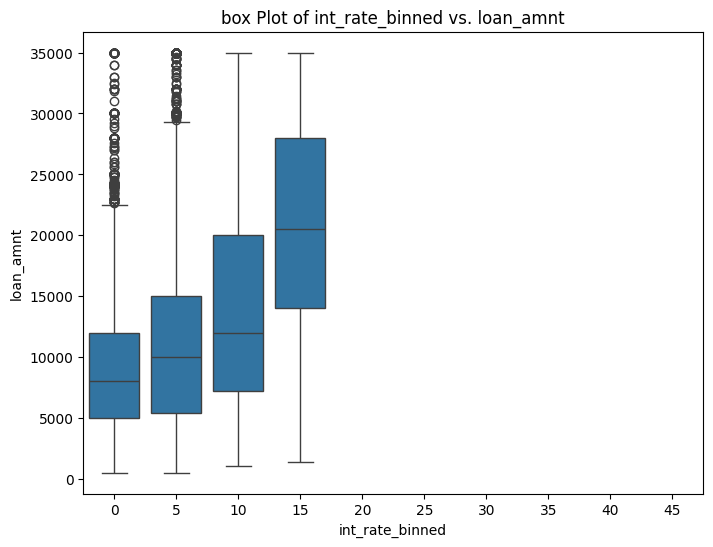

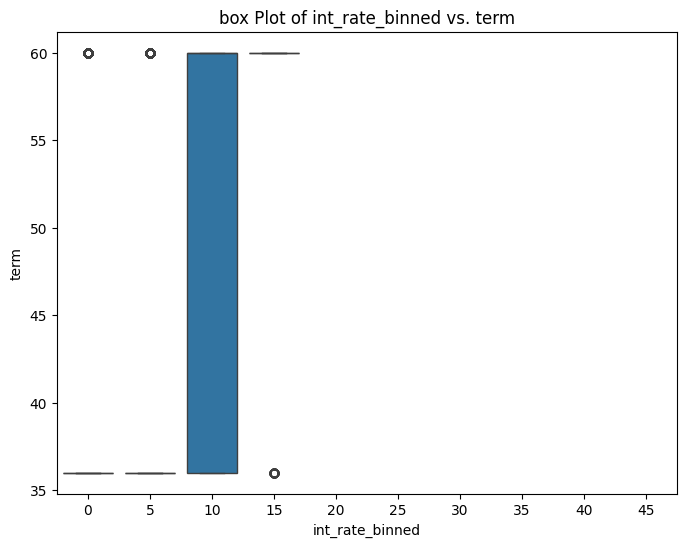

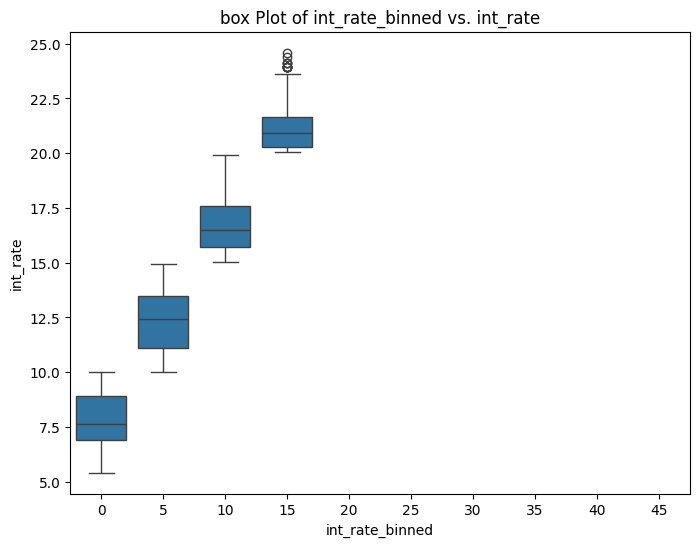

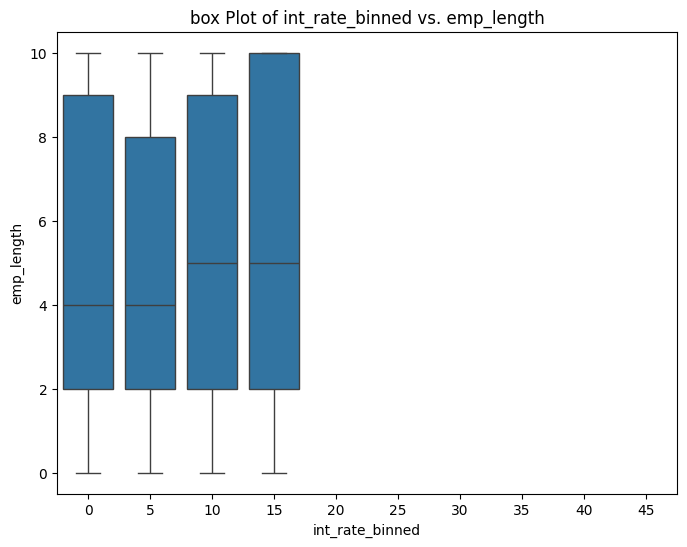

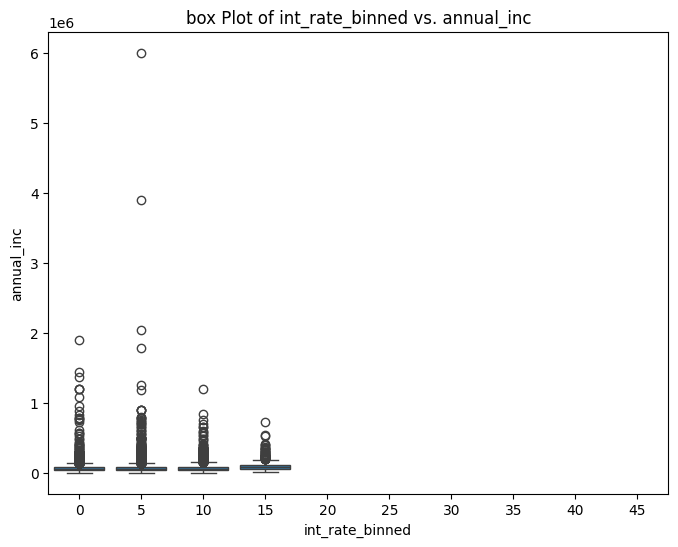

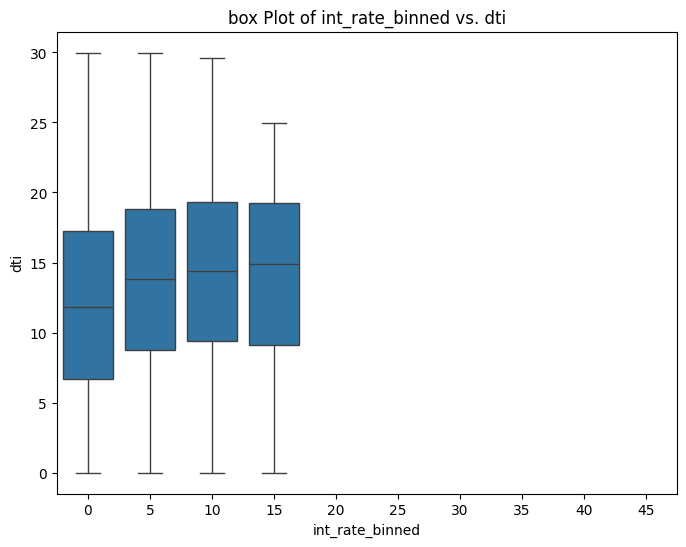

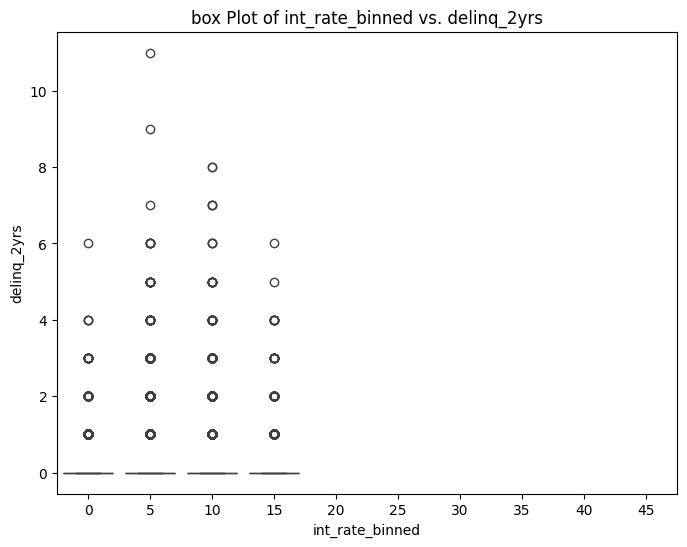

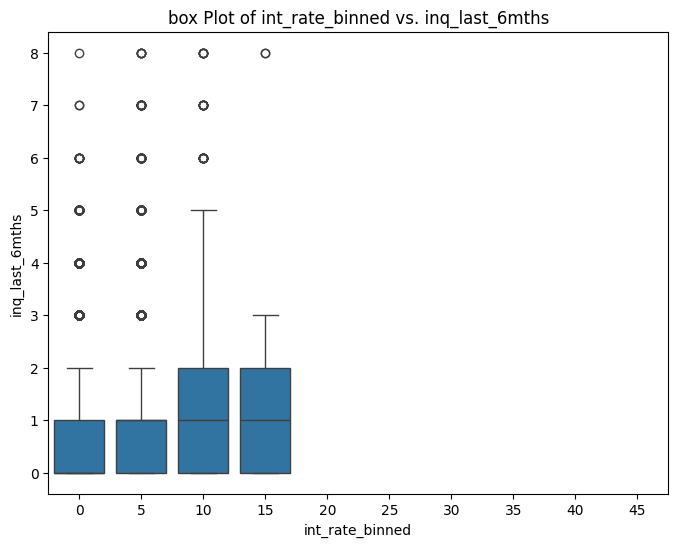

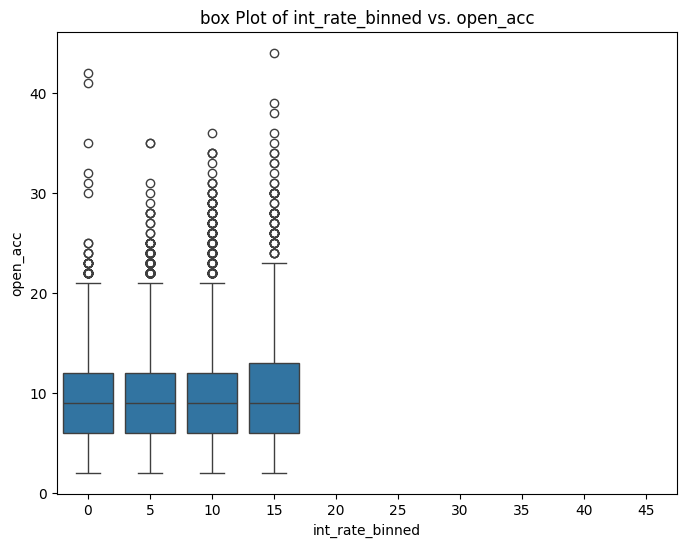

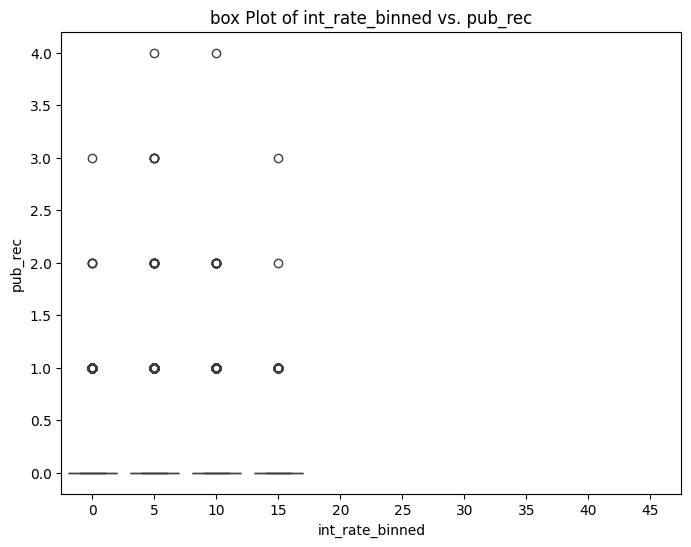

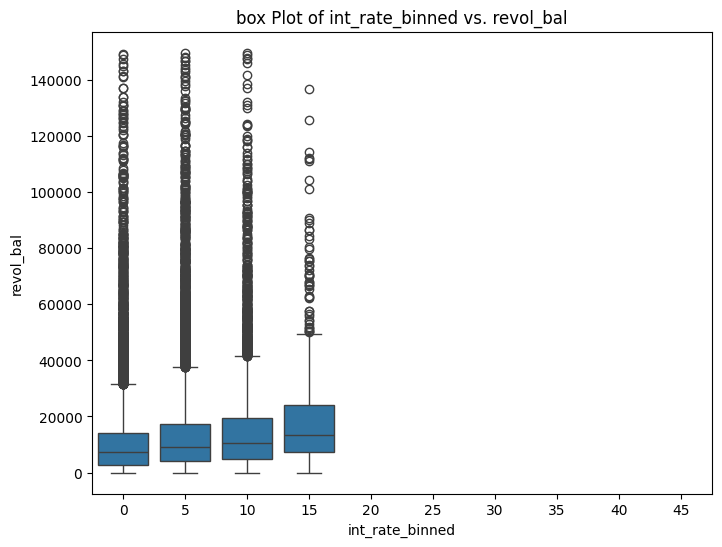

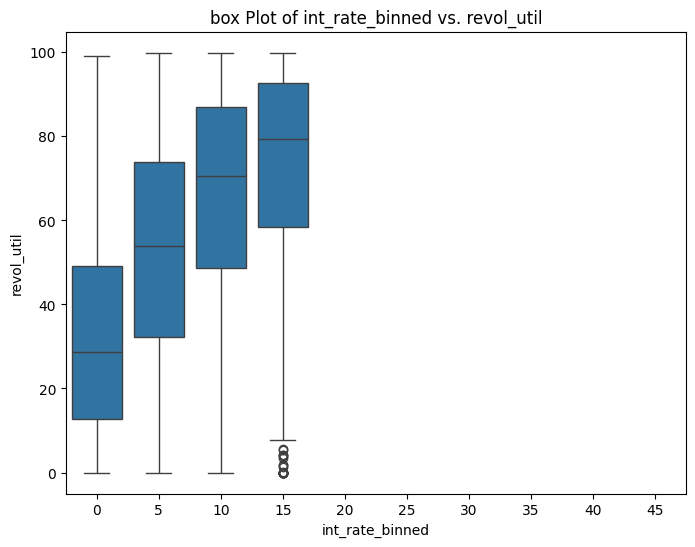

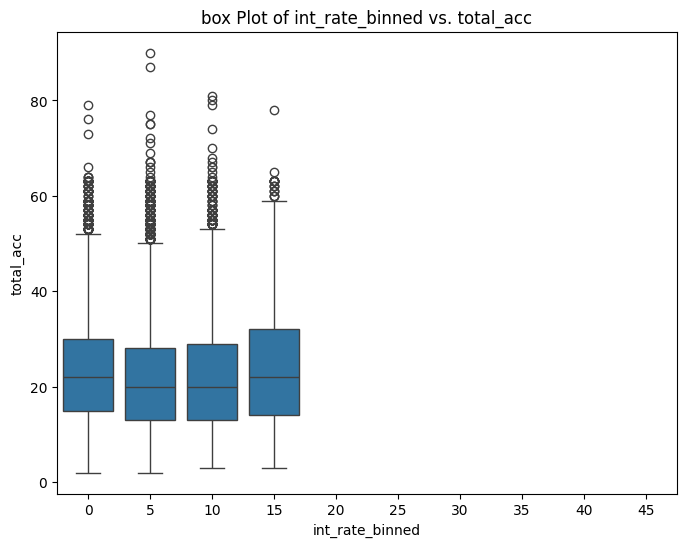

In [ ]:
#Bivariate analysis of int_rate against Numerical attributes

numerical_features =[]

for feature in loan_data.columns:
  if loan_data[feature].dtype != 'object':
    if feature != 'int_rate_binned':
      numerical_features.append(feature)
print(numerical_features)
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='int_rate_binned', y= column, data=loan_data)
    plt.title(f"box Plot of int_rate_binned vs. {column}")
    plt.xlabel("int_rate_binned")
    plt.ylabel(column)
    plt.show()


**Observation of int_rate against Numerical Features**

We see outliers in loan_amnt , open_acc, Total_acc, inq_last_6mnths, revol_util has lowed bound outliers below 5% on 15% int_rate, revol_bal Outliers above about 30000  for between 0 to 5 int_rate , above 38,000 between 5 to 10% int_rate, above 40,000 between 10 to 15%, above 45000 betweeb 15 to 20%.

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


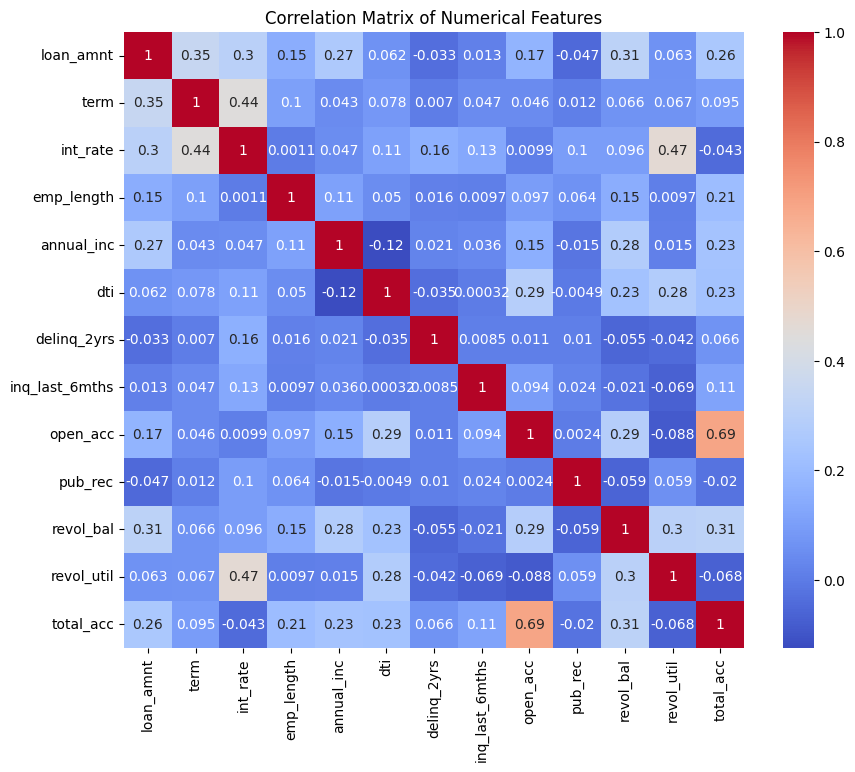

In [ ]:
# Correlation Matrix
# Calculate correlation matrix to check if any of numerical features are highly correlated.

print(numerical_features)
loan_numerical_data = loan_data[numerical_features]
loan_numerical_matrix = loan_numerical_data.corr()
loan_numerical_matrix

#plot a heatmap of the loan_numerical_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(loan_numerical_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()




**Heat Map Observations**/n

***Highly correlated features*** - the Relation between **total_acc and open_acc** is high at **69%** , showing thatas the number of total accounts increases, the number of open accounts tends to increase as well,
For lenders, this could indicate that borrowers with more total accounts are likely to have more open accounts, which might affect their creditworthiness and risk profile. However, the specific threshold for considering this correlation as "high" can vary depending on the lender's criteria and the context of the analysis.
As per the assumption that this correlation is high we can consider dropping either total_acc or open_acc to avoid redundancy and this decision can be taken based on the Domain Knowledge, for Model to better perform. inour case it is better to keep open_acc as it shows borrowers recent history on credit lines(borrowers current financial status) as compared to total_acc.

the relation between **int_rate and revol_util** is moderaetly high at **47%**


, the relation between int_rate and term is moderatly high at 44% denoting that as the term is longer the int_rate increase moderately and Vice versa meaning on term as 36 months the int_rate will be lower compared to term of 60 months.


In [ ]:
#Dropping the highly correlated Attributtes
#dropping total_acc as it is highly co related with open_acc
loan_data.drop(['total_acc'],axis=1,inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            37687 non-null  float64 
 1   term                 37687 non-null  int64   
 2   int_rate             37687 non-null  float64 
 3   grade                37687 non-null  object  
 4   sub_grade            37687 non-null  object  
 5   emp_length           37687 non-null  int64   
 6   home_ownership       37687 non-null  object  
 7   annual_inc           37687 non-null  float64 
 8   verification_status  37687 non-null  object  
 9   purpose              37687 non-null  object  
 10  dti                  37687 non-null  float64 
 11  delinq_2yrs          37687 non-null  int64   
 12  inq_last_6mths       37687 non-null  int64   
 13  open_acc             37687 non-null  int64   
 14  pub_rec              37687 non-null  int64   
 15  revol_bal            376

In [ ]:
#Since our Goal is to Predict whether a loan is likely to default or not.
# we should drop the loan_status attribute before feeding the data into any model
'''loan_data.drop(['loan_status'],axis=1,inplace=True)
loan_data.info()
'''

"loan_data.drop(['loan_status'],axis=1,inplace=True)\nloan_data.info()\n"

In [ ]:
loan_data.shape
loan_data['int_rate'].value_counts()
loan_data['int_rate'].describe()
loan_data['int_rate'].isnull().sum()
loan_data['int_rate_binned'].isnull().sum()
#

0

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [ ]:
# Encoding on all the categorical variables
print(categorical_features)


['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']


In [ ]:
# Calculate int_rate statistics (mean, median, standard deviation) by sub_grade:
# - Group the data by 'sub_grade' and compute the mean, median, and standard deviation of 'int_rate' for each group.
mean_intrate_by_subgrade = loan_data.groupby('sub_grade')['int_rate'].mean()
median_intrate_by_subgrade  = loan_data.groupby('sub_grade')['int_rate'].median()
std_intrate_by_subgrade  = loan_data.groupby('sub_grade')['int_rate'].std()
print(f"mean_intrate_by_subgrade:{mean_intrate_by_subgrade}")
print(f"median_intrate_by_subgrade:{median_intrate_by_subgrade}")
print(f"std_intrate_by_subgrade:{std_intrate_by_subgrade}")

mean_intrate_by_subgrade:sub_grade
A1     5.813679
A2     6.386031
A3     7.172958
A4     7.663990
A5     8.270095
B1    10.014429
B2    10.490538
B3    10.985913
B4    11.394685
B5    11.769728
C1    12.838506
C2    13.328571
C3    13.635307
C4    14.022770
C5    14.470000
D1    14.841877
D2    15.302181
D3    15.713400
D4    16.093384
D5    16.579792
E1    16.944554
E2    17.363542
E3    17.696039
E4    18.184541
E5    18.653948
F1    19.097525
F2    19.336638
F3    19.977829
F4    20.217584
F5    20.682613
G1    20.935761
G2    21.046579
G3    21.475217
G4    21.902407
G5    21.896667
Name: int_rate, dtype: float64
median_intrate_by_subgrade:sub_grade
A1     6.03
A2     6.62
A3     7.14
A4     7.51
A5     8.49
B1     9.91
B2    10.59
B3    10.99
B4    11.49
B5    11.86
C1    12.99
C2    13.49
C3    13.57
C4    13.92
C5    14.26
D1    14.61
D2    15.21
D3    15.58
D4    15.95
D5    16.32
E1    16.45
E2    16.82
E3    17.19
E4    17.56
E5    17.93
F1    18.30
F2    18.67
F3    19.04
F

**Observation of sub_grade with int_rate**
by the above it shows that with SUBGRADE A1 the int_rate is less compared to subgrade with intrate A5 and int_rate - increases in asending order


In [ ]:
# Calculate int_rate statistics (mean, median, standard deviation) by grade:
# - Group the data by 'grade' and compute the mean, median, and standard deviation of 'int_rate' for each group.
mean_intrate_by_grade = loan_data.groupby('grade')['int_rate'].mean()
median_intrate_by_grade  = loan_data.groupby('grade')['int_rate'].median()
std_intrate_by_grade  = loan_data.groupby('grade')['int_rate'].std()
print(f"mean_intrate_by_grade:{mean_intrate_by_grade}")
print(f"median_intrate_by_grade:{median_intrate_by_grade}")
print(f"std_intrate_by_grade:{std_intrate_by_grade}")

mean_intrate_by_grade:grade
A     7.349192
B    11.016738
C    13.531983
D    15.661842
E    17.633664
F    19.666969
G    21.319195
Name: int_rate, dtype: float64
median_intrate_by_grade:grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.41
G    20.90
Name: int_rate, dtype: float64
std_intrate_by_grade:grade
A    1.030748
B    0.897490
C    0.936393
D    1.165225
E    1.396609
F    1.472029
G    1.322274
Name: int_rate, dtype: float64


**Observation of grade with int_rate** by the above it shows that with GRADE A the int_rate is less compared to GRADE 'G' with intrate  and int_rate - increases in asending order.
**AS GRADE AND SUBGRADE AND having the same behaviour on INT_RATE**
we can drop sub_grade to reduce multicolinearty



**The below steps ordinal encoding are executed just to know the correlation between grade and sub grade**
**are commented as will be using one hot encoding for grade and probably dropping sub_grade if correlation is high**


In [ ]:
#Ordinal Encoding for Grade

'''size_mapping_grade = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
loan_data['grade'] = loan_data['grade'].map(size_mapping_grade)'''

"size_mapping_grade = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}\nloan_data['grade'] = loan_data['grade'].map(size_mapping_grade)"

In [ ]:
#Ordinal Encoding for subGrade - Choose this as we have more than 3 unique values for which one_hot encoding will not be as efficeint as Ordinal encoding and also as
#sub grade has a natural order A1- being lowest risk within grade A for lenders and A5 being highest risk with grade A for lenders
'''loan_data['sub_grade'].unique()     # ordinal encoding
size_mapping_subgrade = {'A1':11, 'A2':12, 'A3':13, 'A4':14, 'A5':15, 'B1':21, 'B2':22, 'B3':23, 'B4':24, 'B5':25,
                         'C1':31, 'C2':32, 'C3':33, 'C4':34, 'C5':35, 'D1':41, 'D2':42, 'D3':43, 'D4':44, 'D5':45,
                         'E1':51, 'E2':52, 'E3':53, 'E4':54, 'E5':55, 'F1':61, 'F2':62, 'F3':63, 'F4':64, 'F5':65,
                         'G1':71, 'G2':72, 'G3':73, 'G4':74, 'G5':75}
loan_data['sub_grade'] = loan_data['sub_grade'].map(size_mapping_subgrade)
loan_data.head()'''


"loan_data['sub_grade'].unique()     # ordinal encoding\nsize_mapping_subgrade = {'A1':11, 'A2':12, 'A3':13, 'A4':14, 'A5':15, 'B1':21, 'B2':22, 'B3':23, 'B4':24, 'B5':25,\n                         'C1':31, 'C2':32, 'C3':33, 'C4':34, 'C5':35, 'D1':41, 'D2':42, 'D3':43, 'D4':44, 'D5':45,\n                         'E1':51, 'E2':52, 'E3':53, 'E4':54, 'E5':55, 'F1':61, 'F2':62, 'F3':63, 'F4':64, 'F5':65,\n                         'G1':71, 'G2':72, 'G3':73, 'G4':74, 'G5':75}\nloan_data['sub_grade'] = loan_data['sub_grade'].map(size_mapping_subgrade)\nloan_data.head()"

In [ ]:
# Calculate the correlation between two columns
'''correlation = loan_data['grade'].corr(loan_data['sub_grade'])

print("Correlation between grade and sub_grade:", correlation)
print(correlation.shape)'''

'correlation = loan_data[\'grade\'].corr(loan_data[\'sub_grade\'])\n\nprint("Correlation between grade and sub_grade:", correlation)\nprint(correlation.shape)'

In [ ]:
#dropping sub_grade
loan_data.drop(['sub_grade'],axis=1,inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            37687 non-null  float64 
 1   term                 37687 non-null  int64   
 2   int_rate             37687 non-null  float64 
 3   grade                37687 non-null  object  
 4   emp_length           37687 non-null  int64   
 5   home_ownership       37687 non-null  object  
 6   annual_inc           37687 non-null  float64 
 7   verification_status  37687 non-null  object  
 8   purpose              37687 non-null  object  
 9   dti                  37687 non-null  float64 
 10  delinq_2yrs          37687 non-null  int64   
 11  inq_last_6mths       37687 non-null  int64   
 12  open_acc             37687 non-null  int64   
 13  pub_rec              37687 non-null  int64   
 14  revol_bal            37687 non-null  float64 
 15  revol_util           376

*** Droping sub_grade and keeping grade*** as they are highly correlated and would come to same conclusion with respect to int_rate and loan_status.the correlation between grade and sub_grade is 0.9949537585887042 ~~ 99.50%

In [ ]:
# home_ownership and verification status will go with one hot encoding as small number of categories and as it does not have any ordinal relationship
'''loan_data['home_ownership'].unique()
loan_data['verification_status'].unique()
'''
#one-hot encoding of 'grade','home_ownership','purpose','verification_status'
loan_data_encoded = pd.get_dummies(loan_data, columns=['grade','home_ownership','purpose','verification_status'])
loan_data_encoded.head()
#loan_status will be the Target variable hence not including in ONE-HOT Encoding.


loan_amnt  term  int_rate  emp_length  annual_inc    dti  delinq_2yrs  \
0     5000.0    36     10.65          10     24000.0  27.65            0   
1     2500.0    60     15.27           0     30000.0   1.00            0   
2     2400.0    36     15.96          10     12252.0   8.72            0   
3    10000.0    36     13.49          10     49200.0  20.00            0   
4     5000.0    36      7.90           3     36000.0  11.20            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  loan_status  \
0               1         3        0    13648.0        83.7   Fully Paid   
1               5         3        0     1687.0         9.4  Charged Off   
2               2         2        0     2956.0        98.5   Fully Paid   
3               1        10        0     5598.0        21.0   Fully Paid   
4               3         9        0     7963.0        28.3   Fully Paid   

  int_rate_binned  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0               5    False     True    False    False    False    False   
1              10    False    False     True    False    False    False   
2              10    False    False     True    False    False    False   
3               5    False    False     True    False    False    False   
4               0     True    False    False    False    False    False   

   grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0    False                    False                False   
1    False                    False                False   
2    False                    False                False   
3    False                    False                False   
4    False                    False                False   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                 False               False                 True        False   
1                 False               False                 True         True   
2                 False               False                 True        False   
3                 False               False                 True        False   
4                 False               False                 True        False   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                 True                       False                False   
1                False                       False                False   
2                False                       False                False   
3                False                       False                False   
4                False                       False                False   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                     False          False                   False   
1                     False          False                   False   
2                     False          False                   False   
3                     False          False                   False   
4                     False          False                   False   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0            False           False          False                     False   
1            False           False          False                     False   
2            False           False          False                     False   
3            False           False           True                     False   
4            False           False          False                     False   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                   False             False            False   
1                   False             False            False   
2                    True             False            False   
3                   False             False            False   
4                   False             False             True   

   verification_status_Not Verified  verification_status_S

In [ ]:
# Convert categorical variable loan_status to binary values 0 or 1
# - loan_status: Map 'Charged Off' to 1 and 'Fully Paid' to 0.
loan_status = loan_data_encoded['loan_status'].replace({'Charged Off': 1, 'Fully Paid': 0})   # Label Encoding"""
loan_data_encoded['loan_status'] = loan_status
loan_data_encoded.head()

loan_amnt  term  int_rate  emp_length  annual_inc    dti  delinq_2yrs  \
0     5000.0    36     10.65          10     24000.0  27.65            0   
1     2500.0    60     15.27           0     30000.0   1.00            0   
2     2400.0    36     15.96          10     12252.0   8.72            0   
3    10000.0    36     13.49          10     49200.0  20.00            0   
4     5000.0    36      7.90           3     36000.0  11.20            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  loan_status  \
0               1         3        0    13648.0        83.7            0   
1               5         3        0     1687.0         9.4            1   
2               2         2        0     2956.0        98.5            0   
3               1        10        0     5598.0        21.0            0   
4               3         9        0     7963.0        28.3            0   

  int_rate_binned  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0               5    False     True    False    False    False    False   
1              10    False    False     True    False    False    False   
2              10    False    False     True    False    False    False   
3               5    False    False     True    False    False    False   
4               0     True    False    False    False    False    False   

   grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0    False                    False                False   
1    False                    False                False   
2    False                    False                False   
3    False                    False                False   
4    False                    False                False   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                 False               False                 True        False   
1                 False               False                 True         True   
2                 False               False                 True        False   
3                 False               False                 True        False   
4                 False               False                 True        False   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                 True                       False                False   
1                False                       False                False   
2                False                       False                False   
3                False                       False                False   
4                False                       False                False   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                     False          False                   False   
1                     False          False                   False   
2                     False          False                   False   
3                     False          False                   False   
4                     False          False                   False   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0            False           False          False                     False   
1            False           False          False                     False   
2            False           False          False                     False   
3            False           False           True                     False   
4            False           False          False                     False   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                   False             False            False   
1                   False             False            False   
2                    True             False            False   
3                   False             False            False   
4                   False             False             True   

   verification_status_Not Verified  verification_status_S

In [ ]:
#dropping the binned data of int_rate to avoid NaN values while train and test
loan_data_encoded.drop(['int_rate_binned'],axis=1,inplace=True)
loan_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37687 non-null  float64
 1   term                                 37687 non-null  int64  
 2   int_rate                             37687 non-null  float64
 3   emp_length                           37687 non-null  int64  
 4   annual_inc                           37687 non-null  float64
 5   dti                                  37687 non-null  float64
 6   delinq_2yrs                          37687 non-null  int64  
 7   inq_last_6mths                       37687 non-null  int64  
 8   open_acc                             37687 non-null  int64  
 9   pub_rec                              37687 non-null  int64  
 10  revol_bal                            37687 non-null  float64
 11  revol_util                       

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
(42, 42)


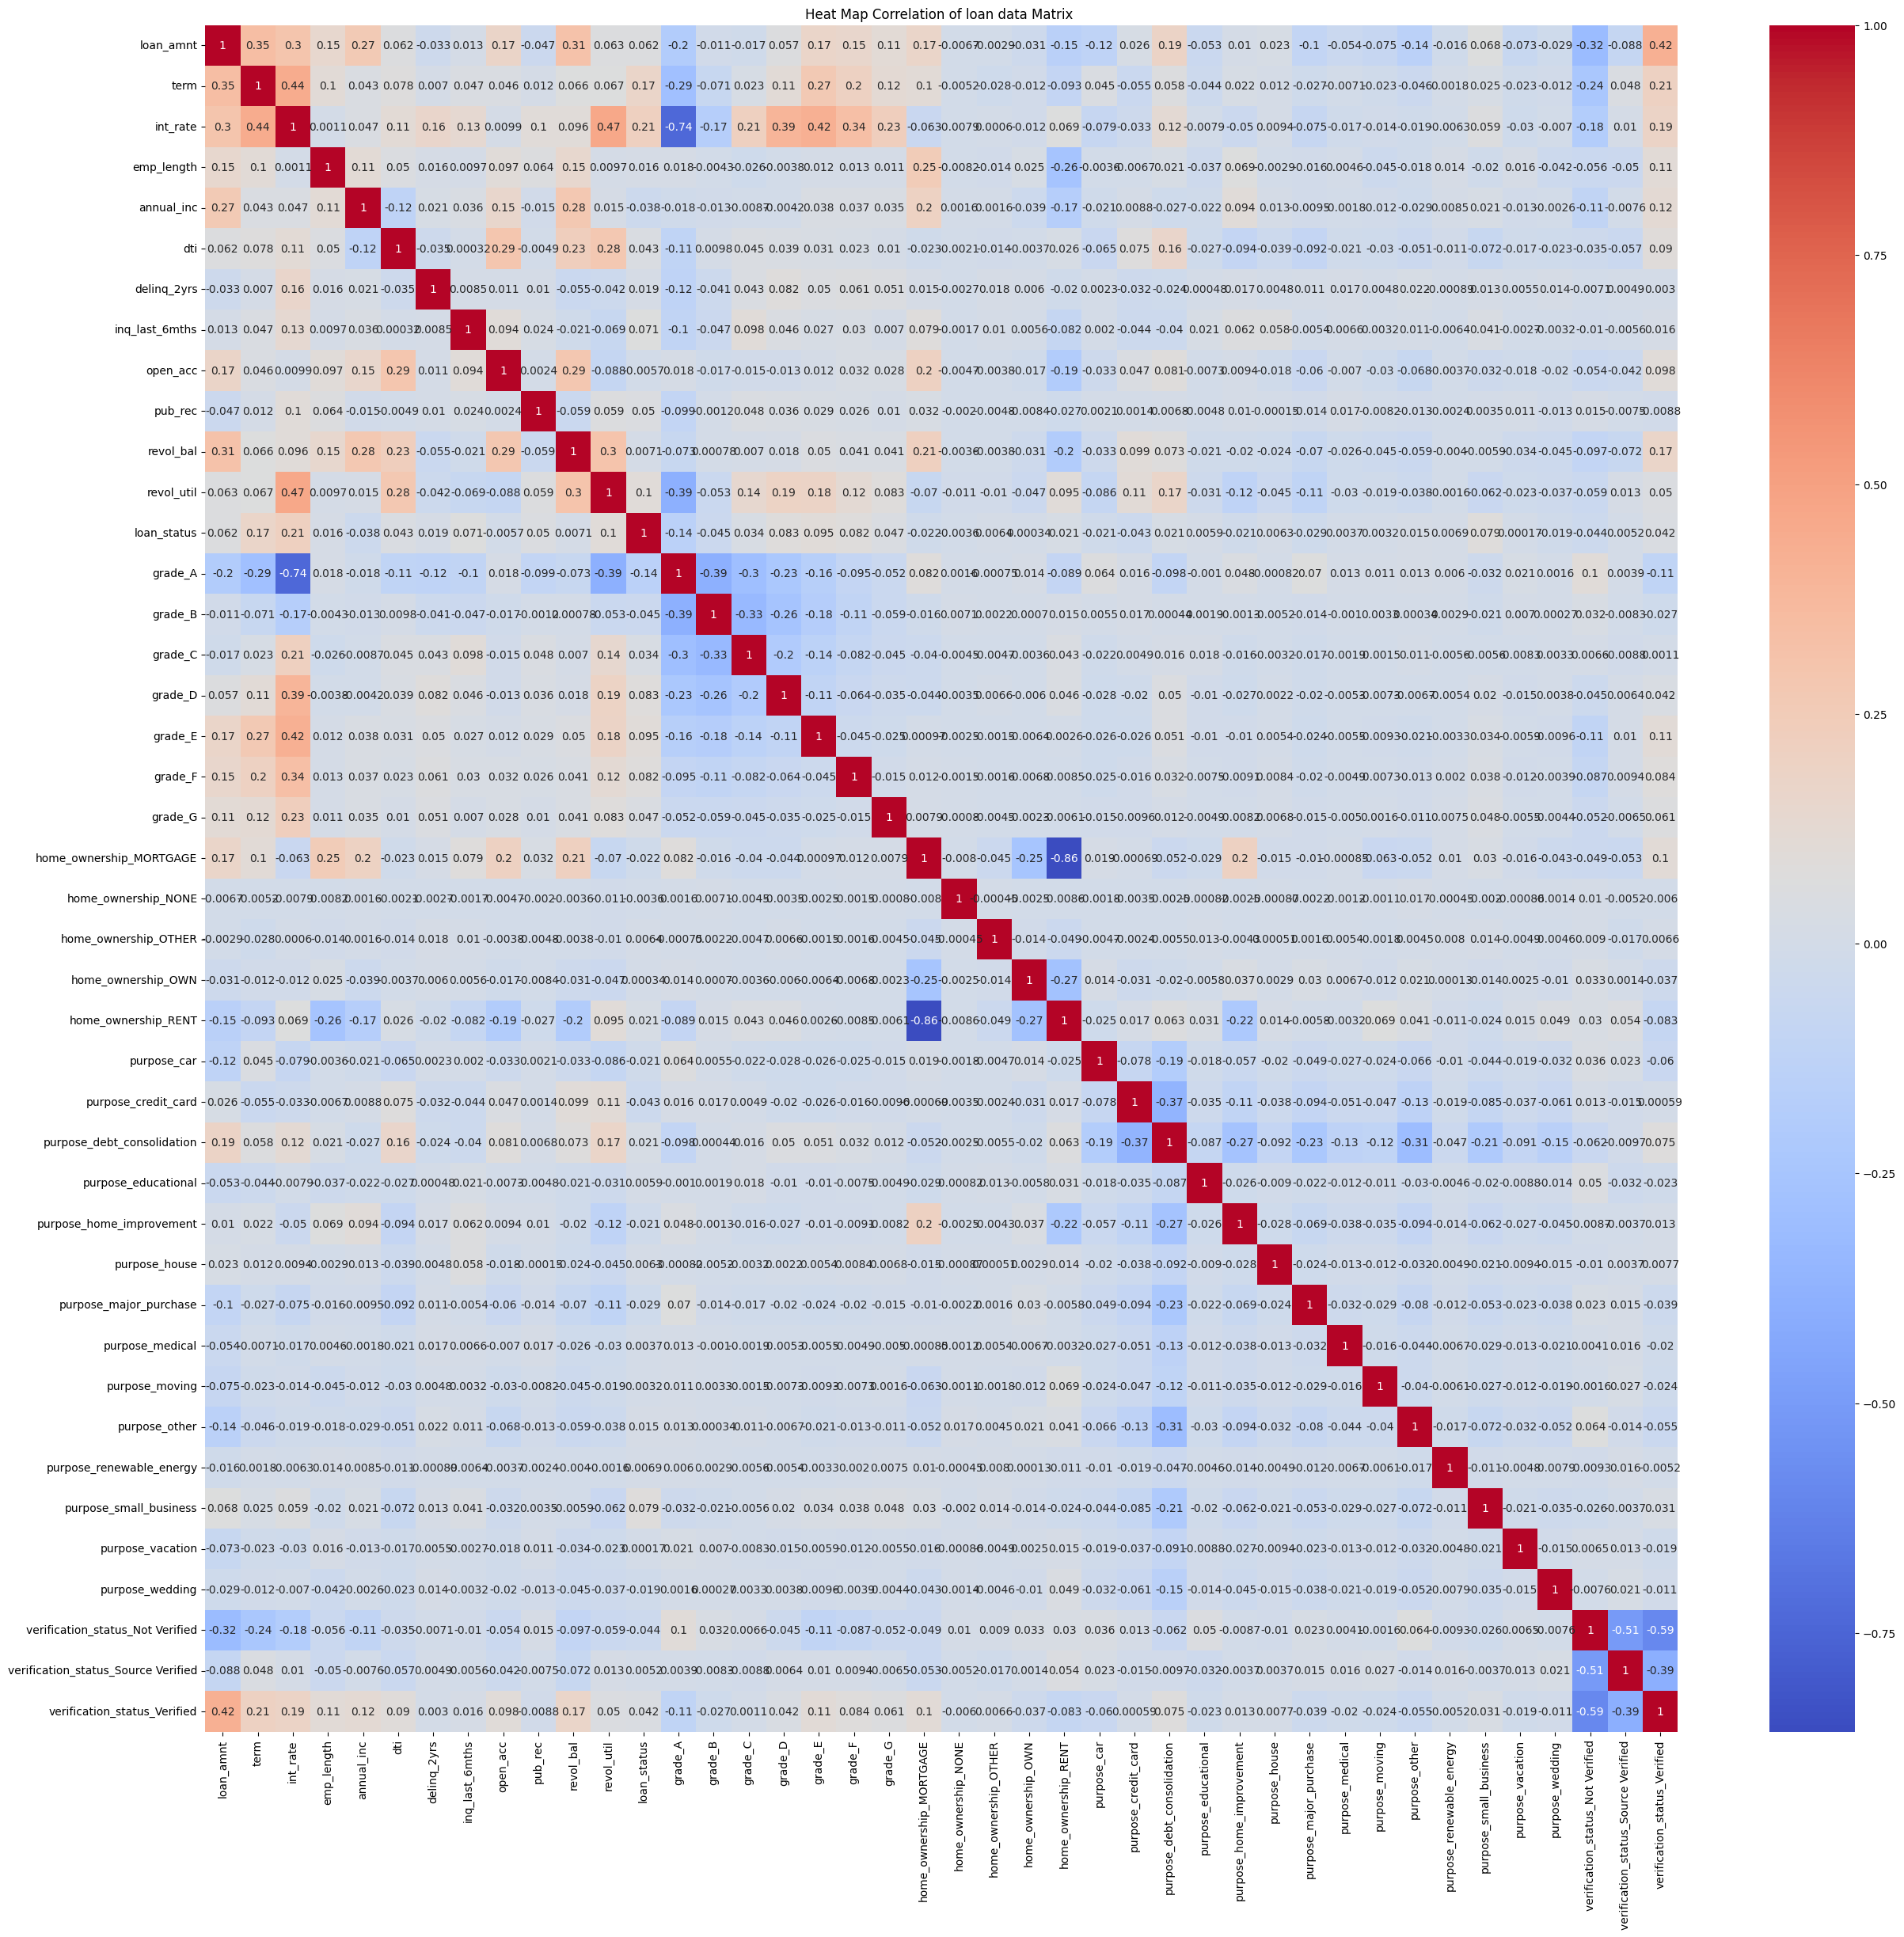

In [ ]:
# Generating Heat map of the whole dataframe of loan_data after Encoding of Categorical variables to Numerical Variables.
print(numerical_features)
loan_data_matrix = loan_data_encoded.corr()
loan_data_matrix
print(loan_data_matrix.shape)

#plot a heatmap of the loan_numerical_matrix
plt.figure(figsize=(30,28))
sns.heatmap(loan_data_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map Correlation of loan data Matrix ')
plt.show()


**Observation**
***Grade A and int_rate*** are negatively corelated with -0.74 meaning as for grade A Customers the int_rate is 74% less compared to other Grades.

***int_rate and revol_util*** is positively correlated denoting More credits increases int_Rate moderately increases
It is a measure of how much of the borrower's available revolving credit (such as credit cards) is currently being used.

***int_rate and term*** higher the term higher the intereste rate, positively correlated.

***loan_amnt and Verification_status_verified*** Borrower gets more loan_amnt if status is verified.


In [ ]:
#loan_data['purpose'].unique()    #Lable encoding can be used for purpose as we have more than 5 unique values for this attribute , also can think of hasihn encoding but it is not a unique value like
#Borrower ID or loan-ID or email addressess
#one-hot encoding is preferred as we canc orelated each value count of an attribute.
'''loan_data['purpose'] = loan_data['purpose'].astype('category').cat.codes
loan_data.head()'''


"loan_data['purpose'] = loan_data['purpose'].astype('category').cat.codes\nloan_data.head()"

In [ ]:
# Splitting our dataset between training and testing set
#split the data into target and features
X=loan_data_encoded.drop('loan_status',axis=1)   #features
y=loan_data_encoded['loan_status']                 #target


**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [ ]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30149, 41)
(7538, 41)
(30149,)
(7538,)


In [ ]:
#Before Applying SMOTE lets look at the Counts of the Target varaible for Each Class
loan_data['loan_status'].value_counts()    #-- Shows Imbalance

loan_status
Fully Paid     32296
Charged Off     5391
Name: count, dtype: int64

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

***Applying SMOTE After Train Test Split***
Always apply SMOTE after the train-test split to avoid data leakage and ensure realistic model evaluation.
Split the data, apply SMOTE to the training set, and then train and evaluate the model.
By following this approach, we can ensure the integrity of my model evaluation and improve its performance on real-world data.

In [ ]:
#Apply SMOTE - Synthetic minority class Oversampling Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Combine resampled data into a DataFrame
loan_data_smote = pd.DataFrame(X_train_smote, columns=X.columns)
loan_data_smote['loan_status'] = y_train_smote
#y_train_smote = y_train_smote.reset_index(drop=True)
loan_data_smote.head()

loan_amnt  term  int_rate  emp_length  annual_inc    dti  delinq_2yrs  \
0     5500.0    36     14.22           2     60070.0   9.23            0   
1    10000.0    36      8.94           3     63000.0  13.64            0   
2    14400.0    60     16.77           5    125000.0   5.88            0   
3    15000.0    36     10.95          10    110000.0   1.07            0   
4    12000.0    60     11.71           4     75000.0  12.08            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  grade_A  grade_B  \
0               2         9        0     7086.0        59.0    False    False   
1               1         9        0    10326.0        27.8     True    False   
2               3        10        1     9168.0        84.9    False    False   
3               0         6        0     3889.0        18.3    False     True   
4               1         7        0     6914.0        44.9    False     True   

   grade_C  grade_D  grade_E  grade_F  grade_G  home_ownership_MORTGAGE  \
0     True    False    False    False    False                    False   
1    False    False    False    False    False                     True   
2    False    False     True    False    False                    False   
3    False    False    False    False    False                     True   
4    False    False    False    False    False                    False   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                False                 False               False   
1                False                 False               False   
2                False                 False                True   
3                False                 False               False   
4                False                 False               False   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                 True        False                False   
1                False        False                False   
2                False        False                False   
3                False        False                False   
4                 True        False                False   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                        True                False                     False   
1                        True                False                     False   
2                        True                False                     False   
3                       False                False                     False   
4                       False                False                      True   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0          False                   False            False           False   
1          False                   False            False           False   
2          False                   False            False           False   
3          False                   False            False           False   
4          False                   False            False           False   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0          False                     False                   False   
1          False                     False                   False   
2          False                     False                   False   
3          False                     False                    True   
4          False                     False                   False   

   purpose_vacation  purpose_wedding  verification_status_Not Verified  \
0             False            False                              True   
1             False            False                              True   
2             False            False                             False   
3             False            False                             False   
4             False            False                              True   

   verification_status_Sourc

In [ ]:
## Check the distribution of class in the newly resampled data
loan_data_smote.describe()

loan_amnt          term      int_rate    emp_length    annual_inc  \
count  51682.000000  51682.000000  51682.000000  51682.000000  5.168200e+04   
mean   11608.335687     43.683758     12.751388      4.804187  6.688977e+04   
std     7620.519135     10.452132      3.570716      3.357530  5.814481e+04   
min      500.000000     36.000000      5.420000      0.000000  4.000000e+03   
25%     5600.000000     36.000000     10.370000      2.000000  4.000000e+04   
50%    10000.000000     36.000000     12.730000      4.000000  5.700000e+04   
75%    15669.046478     58.000000     15.230000      8.000000  8.000000e+04   
max    35000.000000     60.000000     24.590000     10.000000  6.000000e+06   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  51682.000000  51682.000000    51682.000000  51682.000000  51682.000000   
mean      13.595131      0.107542        0.802949      9.113250      0.035389   
std        6.253738      0.416153        0.995309      4.186617      0.191450   
min        0.000000      0.000000        0.000000      2.000000      0.000000   
25%        8.960000      0.000000        0.000000      6.000000      0.000000   
50%       13.800912      0.000000        1.000000      8.000000      0.000000   
75%       18.423755      0.000000        1.000000     11.000000      0.000000   
max       29.990000     11.000000        8.000000     42.000000      4.000000   

           revol_bal    revol_util   loan_status  
count   51682.000000  51682.000000  51682.000000  
mean    13483.453068     51.736829      0.500000  
std     15507.757252     26.838252      0.500005  
min         0.000000      0.000000      0.000000  
25%      3871.102469     31.100000      0.000000  
50%      9047.000000     54.000171      0.500000  
75%     17294.371660     73.501563      1.000000  
max    149588.000000     99.900000      1.000000

In [ ]:
# print resampled/SMOTE Data for loan_status
loan_data_smote['loan_status'].value_counts()

loan_status
0    25841
1    25841
Name: count, dtype: int64

**Observation**
The samples reduced from 30149 for training dataset to 25841 after SMOTE as only for Training as Test_size used is 0.2 meaning 80% for Training and 20% for Testing dataset.

In [ ]:
## Check the samples
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.isnull().sum()
#X_train['int_rate_binned'].value_counts() - this has laready been dropped and error is valid

X_train['int_rate'].isnull().sum()
#
print(X_train_smote.shape)
print(y_train_smote.shape)


(30149, 41)
(7538, 41)
(30149,)
(7538,)
(51682, 41)
(51682,)


*** Using SMOTE we balanced the imbalanced dataset and got
25841 for each category of loan_status ... meaning 25841x2 = 51,682
Out of which we are using 80% to Train the Model and 20% for testing the Model
so far looks good.

In [ ]:
#graphical Representation
#sns.countplot(y_train_smote)
#plt.title('Resampled Class Distribution')
#plt.show()

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler
# need to perform scaling as to ensure Consistent Feature Range , to Improve Model Performance, Prevents data Leakage(scaling shld be done on train
# and Test data seperately.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_smote.shape)

print(y_train_smote.shape)
print(y_test.shape)
print(y_train.shape)

print(y.shape)
print(X.shape)


(51682, 41)
(7538, 41)
(51682, 41)
(51682,)
(7538,)
(30149,)
(37687,)
(37687, 41)


**SCALING APPLIED**
Scaling applied on SMOTE DATA

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## Build the model
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state = 42, max_iter=2000)


# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train_smote)    # this has to be scaled train data


# predict on training data just for comparing
y_pred_train = logistic_model.predict(X_train_scaled)

y_pred_train

# we always Predict on the testing set
y_pred = logistic_model.predict(X_test_scaled)

y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Map the IDs back to the test set
# Get the test set indices
test_indices = X_test.index

# Create a results dataframe with ID, Actual, and Predicted values for the test set
#results_df = pd.DataFrame({'ID': loan_id.iloc[test_indices],'Member_ID':loan_member_id.iloc[test_indices], 'Actual': y_test, 'Predicted': y_pred})


# Create a results dataframe with ID, Actual, and Predicted values for the test set
results_df = pd.concat([loan_id.loc[test_indices].rename('ID'),
                        loan_member_id.loc[test_indices].rename('Member_ID'),
                        pd.Series(y_test, index=test_indices, name='Actual'),
                        pd.Series(y_pred, index=test_indices, name='Predicted')], axis=1)



# Display the results dataframe
results_df.head(100)





ID  Member_ID  Actual  Predicted
37185   364089     374404       0          0
32540   464068     581396       0          0
15319   709846     902520       0          0
3166    943086    1163837       0          0
12597   770771     972480       0          0
...        ...        ...     ...        ...
5574    816712    1024479       0          0
29312   511298     660421       0          0
30592   494000     416195       1          0
854    1058484    1290072       1          0
27088   544138     701960       0          0

[100 rows x 4 columns]

In [ ]:
# Get the coefficients from the model
coefficients = logistic_model.coef_[0]

# Get the feature names
feature_names = X.columns          #FEATURES

# Create a DataFrame to display the coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficient to see the most impactful features
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted coefficients
print(coef_df[['Feature', 'Coefficient']])

                                Feature  Coefficient
12                              grade_A     5.421061
13                              grade_B     5.409506
14                              grade_C     5.317450
15                              grade_D     5.212776
38     verification_status_Not Verified     5.077233
16                              grade_E     5.038202
40         verification_status_Verified     5.030311
39  verification_status_Source Verified     4.989524
35               purpose_small_business     4.869939
17                              grade_F     4.802850
18                              grade_G     4.417149
34             purpose_renewable_energy     4.387302
23                  home_ownership_RENT     4.373244
33                        purpose_other     4.328806
22                   home_ownership_OWN     4.304196
21                 home_ownership_OTHER     4.299720
31                      purpose_medical     4.261667
32                       purpose_moving     4.

How to find whether the model has learnt well to make accurate classifications?
/n

***MODEL EVALUATION***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results ## Plot the Confusion Matrix
print("Accuracy of Logistic Regression model Test data :", accuracy)
print("Confusion Matrix Logistic Model:Test data \n", conf_matrix)
print("Classification Report of Logistic Model:Test data\n", class_report)


# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
conf_matrix_train = confusion_matrix(y_train_smote, y_pred_train)
class_report_train = classification_report(y_train_smote, y_pred_train)

# Display the evaluation results ## Plot the Confusion Matrix
print("Accuracy of Logistic Regression model Train data :", accuracy_train)
print("Confusion Matrix of Logistic Model:Train data \n", conf_matrix_train)
print("Classification Report pf Logistic Model:Train data\n", class_report_train)


Accuracy of Logistic Regression model Test data : 0.856858583178562
Confusion Matrix Logistic Model:Test data 
 [[6441   14]
 [1065   18]]
Classification Report of Logistic Model:Test data
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      6455
           1       0.56      0.02      0.03      1083

    accuracy                           0.86      7538
   macro avg       0.71      0.51      0.48      7538
weighted avg       0.82      0.86      0.79      7538

Accuracy of Logistic Regression model Train data : 0.9103362872953833
Confusion Matrix of Logistic Model:Train data 
 [[25789    52]
 [ 4582 21259]]
Classification Report pf Logistic Model:Train data
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     25841
           1       1.00      0.82      0.90     25841

    accuracy                           0.91     51682
   macro avg       0.92      0.91      0.91     51682
weighted a

***Observation***
Followed the below Steps/n

1.Split Data: Split the original dataset into training and testing sets.

2.Apply SMOTE: Apply SMOTE to the training data only, as if we apply smote on test data the results will be Over optimistic as we do no want that to Happen , we evaluate the model using original imbalanced Test data

3.Scale Data: Scale both the training (after SMOTE) and testing data.

4.Train Model: Train the model on the resampled and scaled training data.

5.Evaluate Model: Evaluate the model on the original, imbalanced test data.

**Class 0:Fully Paid**

Precision (0.86): Out of all the predictions made for class 0, 86% were correct.

Recall (1.00): Out of all the actual instances of class 0, 100% were correctly identified.

F1-Score (0.92): This balances precision and recall, indicating a good overall performance for class 0.

Support (6455): There were 6455 instances of class 0 in the actual dataset.

**Class 1:CHarged Off**

Precision (0.56): Out of all the predictions made for class 1, 56% were correct.

Recall (0.02): Out of all the actual instances of class 1, only 2% were correctly identified. This indicates that the model is not performing well for class 1.

F1-Score (0.03): This combines precision and recall, indicating poor performance for class 1.

Support (1083): There were 1083 instances of class 1 in the actual dataset.Which is way lesser than Class 0 showing Imbalance.

Overall Metrics:

Accuracy (0.86): The model correctly classified 86% of the samples in the dataset.

Macro Average:

Precision (0.71), Recall (0.51), F1-Score (0.48): These are the unweighted averages of precision, recall, and f1-score across all classes.

Weighted Average:

Precision (0.82), Recall (0.86), F1-Score (0.79): These averages take into account the support (number of instances) for each class, providing a more balanced evaluation.

Summary:
Class 0: The model performs exceptionally well, with high precision, recall, and f1-score.

Class 1: The model struggles with class 1, especially in terms of recall, indicating a high number of false negatives. tp/(tp+fn)

Overall Performance: The high accuracy is primarily driven by the model's performance on class 0, but there is room for improvement in handling class 1.

Insights:
Imbalance: The dataset appears to be imbalanced, with a much larger number of instances for class 0 compared to class 1. This could be one reason for the poor performance on class 1. which is expected as we did not Balance the test dataset, we will see if any other models performs well with the same Steps.

High Precision indicates a low False positive rate  TP/(TP+FP).
High Recall indicates a low False negative rate  TP/(TP+FN)
F1-Score - Weighted Average of precision and recall. It provides a balance between precision and recall.==>
Support - The number of actual occurrences of the class in the dataset.

The Train data is balanced hence giving more Accuracy and Classification report looks much better than Test dataset.

***Decision on Overfitting or underfitting*** On evaluation found that the **Metrics for Both Training and Test data are about the same** showing that the model fits/genralizes well without Overfitting or underfitting the data.

The Accuracy

In [ ]:
# # Extract the components of the confusion matrix for Logistic Regression
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate) for Logistic Model: {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate) for Logistic Model: {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate) for Logistic Model: 0.0022
Type 2 Error Rate (False Negative Rate) for Logistic Model: 0.9834


**Observation**

Type 1 Error (False Positive): is 0.2% This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies that a loan is defaulted Chargded Off where as actually it is fully Paid. This could lead to lenders taking incorrect decision of not approving the loan to valid borrowers.or approving with higher interest rates impacts Customer relationship and reduce potential profits in safe loans or this might let lenders loose the customers to other lenders.

Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."

Example: The model incorrectly classifies a loan  to be default to not to be default. This is more serious, as it could lead to lenders to lend money to borrowers who is not going to repay the Loan.
This is typically more severe because it means failing to identify high-risk loans. The result can be significant financial losses due to defaults, impacting the institution's profitability and financial stability.


***Let's plot the Precision- Recall curve and ROC-AUC curve***/n

Precision-Recall Curve: This curve illustrates the trade-off between precision (the proportion of true positive predictions out of all positive predictions) and recall (the proportion of true positive predictions out of all actual positives). It's particularly useful for evaluating models on imbalanced datasets, focusing on the performance in predicting the minority class./n

ROC-AUC Curve: The ROC (Receiver Operating Characteristic) curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity). The AUC (Area Under the Curve) score summarizes the overall performance of the model; a higher AUC indicates better model performance in distinguishing between classes.


<Figure size 640x480 with 0 Axes>

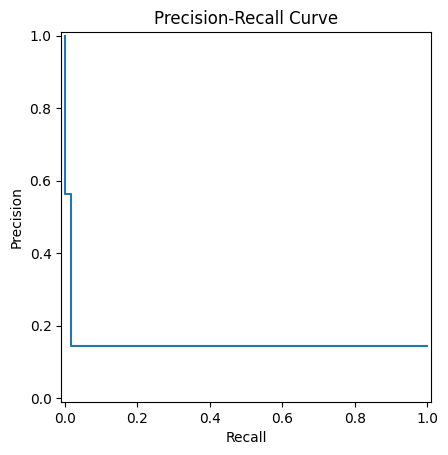

In [ ]:
# Import the required libraries for plotting Precision Recall curve and ROC-AUC curve
from sklearn.metrics import precision_recall_curve, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall curve
plt.figure()
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

**Observation**
The curve starts with a high precision of 1.0 and a recall of 0.0.

As recall increases, precision drops sharply to around 0.6 when recall is approximately 0.1.

The curve then levels off at a precision of around 0.2 for the remaining recall values up to 1.0.

This shows the model performs in terms of precision and recall at various thresholds. A steep drop in precision indicates that as the model tries to capture more relevant instances (higher recall), it also starts capturing more irrelevant instances, thereby reducing precision.

<Figure size 640x480 with 0 Axes>

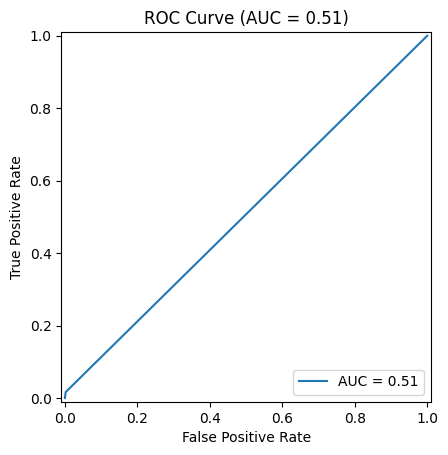

In [ ]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

**Interpreation**

***AUC of 0.51 :***
Evaluates the trade-offs between True Positive Rate and False Positive Rate at different thresholds.
Diagonal Line: The curve in the image is a straight diagonal line from the bottom-left corner (0,0) to the top-right corner (1,1). This diagonal line represents a model that performs no better than random guessing. In other words, it has no discriminative power.


In [ ]:
# Apply Cross Validation (training score on all subsets of training data) on logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation
scores = cross_val_score(logistic_model, X_train_scaled, y_train_smote, cv=5)
print("Cross-Validation Scores for Logistic Reg:", scores)
print("Mean CV Score for Logistic Reg:", scores.mean())


Cross-Validation Scores for Logistic Reg: [0.58256748 0.98848796 0.98897059 0.99129257 0.98887384]
Mean CV Score for Logistic Reg: 0.9080384857695056


**Interpretation of Cross Validation**
Cross-Validation Mean Score (0.91)
Purpose: The cross-validation mean score (0.91) represents the average performance of my model on different subsets of the training data.

Indication: This high score suggests that my model performs well on the training data when evaluated using cross-validation, indicating good fitting to the training data.

Test Data Accuracy (0.86)
Purpose: The test data accuracy (0.86) represents my model's performance on an unseen dataset that was not used during training or cross-validation.

Indication: This score is lower than my cross-validation mean score, suggesting that my model's performance drops when exposed to new, unseen data.

Interpretation
Possible Overfitting:

My model may be overfitting the training data, capturing noise and specific patterns that do not generalize well to new data. This often results in a high training score (or cross-validation score) but a lower test score.

Data Distribution Differences:

There could be differences in the distribution of the training and test datasets. If the test data is not representative of the training data, the model may struggle to generalize.

Model Complexity:

The complexity of my model might be too high. Complex models can fit the training data very well but fail to generalize to new data. I should Consider simplifying the model or applying regularization.

Next Steps to Address Overfitting
Regularization: Apply techniques like L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting.

Feature Engineering: Ensure that the features used are relevant and contribute to the model's predictive power.

Cross-Validation: Using techniques like stratified k-fold cross-validation to ensure a more representative evaluation of model performance.

Simplify Model: Reducing model complexity by using fewer features or a less complex algorithm.

More Data: If possible, I will gather more data to provide the model with more diverse examples.


In [ ]:
# Calculate Cross Entrophy of Logistic regression
#y_pred_proba = logistic_model.predict_proba(X_test) #== not scaled
y_pred_proba = logistic_model.predict_proba(X_test_scaled) #==> scaled
from sklearn.metrics import log_loss
print(y_pred_proba)
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss}")


[[0.89901316 0.10098684]
 [0.82162376 0.17837624]
 [0.96179541 0.03820459]
 ...
 [0.69194375 0.30805625]
 [0.77699413 0.22300587]
 [0.95541151 0.04458849]]
Log Loss: 0.3817582618985071


***Interpreting Log Loss***
Lower Values are Better: Log loss measures the discrepancy between the predicted probabilities and the actual class labels. Lower log loss values indicate better model performance.

Range: Log loss ranges from 0 to infinity, with 0 indicating perfect predictions and higher values indicating poorer predictions.

Contextualizing 0.3817582618985071
ok Performance: A log loss of approximately 0.38 suggests that my model's predictions are reasonably accurate but not perfect. It's better than random guessing but indicates room for improvement.

Impact of Log Loss
Model Evaluation: A log loss around 0.38 implies that my model is making some incorrect predictions but is still fairly reliable but performs bad for Class 1: Loan_status as Charged_off per precison and recall and F1 score on the Test data, need to choose another Model or Grid search or randomized search or applying Regularization(Lasso and Ridge)

Comparative Metric: To understand the significance of this value, I will compare it with the log loss of other models or a baseline model on the same dataset.

In [ ]:
#Hyperparameter Tuning on logistic Regression model with
'''import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='recall')

grid_search.fit(X_train_scaled, y_train_smote)  # this should be done on scaled data

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

y_test_pred = best_model.predict(X_test_scaled)    # need to use scaled to be consistent
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of Hyper Tune Logistic Reg:", accuracy)
conf_matrix_test_logGrid = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix Hyper Tune Logistic reg with GridSearch :\n", conf_matrix_test_logGrid)
class_report_test_logGrid = classification_report(y_test, y_test_pred)
print("Classification Report Hyper Tune Logistic reg with GridSearch :\n", class_report_train)
'''

'import numpy as np\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nparam_grid = {\n    \'C\': [0.01, 0.1, 1, 10, 100],  # Regularization strength\n    \'solver\': [\'liblinear\', \'lbfgs\']  # Optimization algorithm\n}\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=\'recall\')\n\ngrid_search.fit(X_train_scaled, y_train_smote)  # this should be done on scaled data\n\nbest_model = grid_search.best_estimator_\nprint("Best Hyperparameters:", grid_search.best_params_)\nprint("Best Cross-Validation Score:", grid_search.best_score_)\n\ny_test_pred = best_model.predict(X_test_scaled)    # need to use scaled to be consistent\naccuracy = accuracy_score(y_test, y_test_pred)\nprint("Test Accuracy of Hyper Tune Logistic Reg:", accuracy)\nconf_matrix_test_logGrid = confusion_matrix(y_test, y_test_pred)\nprint("Confusion Matrix Hyper Tune Logistic reg with GridSearch :\n", conf_matrix_test_logGrid)\nclass_report_test_lo

**Observation of Logistic Regression with GridSearchCV**
used GridSearchCV for logistic regression model with bet parameters with 5 cross Validation and used recall as score as we need to improve Type 2 Errors (reducing the False Negatives). Out of all the actual instances of class 1, 82% were correctly identified. This indicates that the model is performing quite well for class 1 and also Class 0.


In [ ]:
# # Extract the components of the confusion matrix for Logistic reg with Hyperparameter Tuning
'''TN, FP, FN, TP = conf_matrix_test_logGrid.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate) for Hper Tune Logistic Model: {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate) for Hyper Tune Logistic Model: {type_2_error_rate:.4f}')'''

"TN, FP, FN, TP = conf_matrix_test_logGrid.ravel()\n\n# Calculate Type 1 Error Rate (False Positive Rate)\ntype_1_error_rate = FP / (FP + TN)\n\n# Calculate Type 2 Error Rate (False Negative Rate)\ntype_2_error_rate = FN / (FN + TP)\n\nprint(f'Type 1 Error Rate (False Positive Rate) for Hper Tune Logistic Model: {type_1_error_rate:.4f}')\nprint(f'Type 2 Error Rate (False Negative Rate) for Hyper Tune Logistic Model: {type_2_error_rate:.4f}')"

**Observation**

Type 1 Error (False Positive): is 0.2% This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies that a loan is defaulted Chargded Off where as actually it is fully Paid. This could lead to lenders taking incorrect decision of not approving the loan to valid borrowers.or approving with higher interest rates impacts Customer relationship and reduce potential profits in safe loans or this might let lenders loose the customers to other lenders.

Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."


**Logistic regression with balanced class weight and hyperparameter tuning
class_weight='balanced':**

Adjusts the importance or weight of classes during the training process without changing the original dataset.
It makes the model focus more on the minority class (e.g., deafults - Charged-off) by giving them higher weight in the loss function.
As Recall is Low for Minority Class will apply logictic regression along with Randomized search with L1 ans L2 regularization to see which gives the best score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
import numpy as np

# Step 1: Create polynomial features to increase complexity
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 2, 1),          # C values from 0.0001 to 100
    'penalty': ['l2'],              # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear', 'saga']       # Solvers that support L1 and L2
}
#'penalty'['l1', 'l2'],
# Step 3: Define the Logistic Regression model with class_weight='balanced'
logreg = LogisticRegression(random_state=42, max_iter=10, class_weight='balanced')

# Step 4: Set up scoring metrics for RandomizedSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}

# Step 5: Perform RandomizedSearchCV for Ridge only
random_search_logreg = RandomizedSearchCV(estimator=logreg,
                                          param_distributions=param_distributions,
                                          n_iter=10,  # Limiting to 10 random configurations
                                          scoring=scoring,
                                          refit='Recall',  # Refit using best recall score
                                          cv=5,
                                          n_jobs=-1,
                                          random_state=42)


In [ ]:
# Step 6: Fit the model to the training data
random_search_logreg.fit(X_train_poly, y_train_smote)

# Step 7: Get the best parameters based on Recall as we want to focus on not predicting False Negatives more
print(f"Best parameters based on Recall: {random_search_logreg.best_params_}")
print(f"Best Recall Score (from training set): {random_search_logreg.best_score_:.4f}")

# Step 8: Evaluate the best model on the test set for both Recall and F1-Score
best_logreg_model = random_search_logreg.best_estimator_
y_test_pred = best_logreg_model.predict(X_test_poly)

test_recall = recall_score(y_test, y_test_pred)
#test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
class_report_test_logRand = classification_report(y_test, y_test_pred)

print(f"Test Recall after RandomizedSearchCV (Ridge): {test_recall:.4f}")
#print(f"Test Precision after RandomizedSearchCV (Lasso/Ridge): {test_precision:.4f}")
print(f"Test F1-Score after RandomizedSearchCV (Ridge): {test_f1:.4f}")
print("Classification Report Logistic reg with GridSearch :\n", class_report_test_logRand)

Best parameters based on Recall: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.0001}
Best Recall Score (from training set): 0.8477
Test Recall after RandomizedSearchCV (Ridge): 0.4377
Test F1-Score after RandomizedSearchCV (Ridge): 0.3097
Classification Report Logistic reg with GridSearch :
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      6455
           1       0.24      0.44      0.31      1083

    accuracy                           0.72      7538
   macro avg       0.57      0.60      0.57      7538
weighted avg       0.80      0.72      0.75      7538



**Logistic regression with balanced class weight and hyperparameter tuning**
***RandomizedSearchCV and PolynomialFeatures***
Degree 2, Penalty l2==> Ridge, # of iterations 10, scoring for Recall and F1.
Again the recall score on the training dataset is 84.77% but recall score on Test data is just 43.77% denoting out of actual instances of class 1(Charged off) only 43.77% were correctly identified as charged -off and remianing 56.23% were identified as Fully Paid  which is type 2 Error Causing serious risk for Lenders as they will lean towards lending the loan to borrowers who might not repay the loan.


***F1- Score - It provides a balance between precision and recall***

In [ ]:
#Naive Bayes Classifier
#Applying PCA -Principal Component Analysis
# Import the required module
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=20)  # Starting with 2 components to visualize, PCA takes the scaled Input of our training dataset.
principal_components = pca.fit_transform(X_train_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a list of (Principal Component, Variability) tuples and sort them in descending order
components_variability = [(f'PC{i+1}', var) for i, var in enumerate(explained_variance)]
components_variability.sort(key=lambda x: x[1], reverse=True)

# Print the variability captured by each component
for component, variability in components_variability:
    print(f'{component}: {variability:.4f}')


PC1: 0.1346
PC2: 0.1121
PC3: 0.0798
PC4: 0.0761
PC5: 0.0717
PC6: 0.0651
PC7: 0.0574
PC8: 0.0440
PC9: 0.0394
PC10: 0.0371
PC11: 0.0305
PC12: 0.0294
PC13: 0.0276
PC14: 0.0249
PC15: 0.0224
PC16: 0.0186
PC17: 0.0162
PC18: 0.0145
PC19: 0.0131
PC20: 0.0096


***Given the above PCA Analysis*** -finalizing 18 PCs is a reasonable choice, as it captures close to 90% of the data’s variance while reducing dimensionality significantly.

In [ ]:
#Building Naive Bayes Classifier.
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

# Apply PCA to reduce to the first 10 principal components with 70% to reduce dimensionality
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train_smote)

# Predict on the test set
y_pred = nb.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Test set: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Test Set Naive Bayes :')
print(conf_matrix)
print('Classification Report Test Set Naive Bayes:')
print(classification_report(y_test, y_pred))

# Predict on the train set
y_pred_train = nb.predict(X_train_pca)

# Evaluate the model
accuracy = accuracy_score(y_train_smote, y_pred_train)
print(f'Accuracy on train Naive Bayes: {accuracy:.4f}')
print('Classification Report pn Train Naive Bayes:')
print(classification_report(y_train_smote, y_pred_train))

Accuracy Test set: 0.7048
Confusion Matrix Test Set Naive Bayes :
[[4855 1600]
 [ 625  458]]
Classification Report Test Set Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      6455
           1       0.22      0.42      0.29      1083

    accuracy                           0.70      7538
   macro avg       0.55      0.59      0.55      7538
weighted avg       0.79      0.70      0.74      7538

Accuracy on train Naive Bayes: 0.7505
Classification Report pn Train Naive Bayes:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     25841
           1       0.76      0.74      0.75     25841

    accuracy                           0.75     51682
   macro avg       0.75      0.75      0.75     51682
weighted avg       0.75      0.75      0.75     51682



**Observations** Naive Bayes is performing better on Minority Class 1 - Charged off as compared to Logistic regression as we can see Recall which shows the of the actual instances of class 1 42% were correctly identifed as Defaulted (Charged off) performing better than logistic regression which had only 2%.

The goal is to identify the loan is deafulted or not. How efficient is this model in doing that?

To answer this, let's understand about Type 1 and Type 2 errors.




In [ ]:
# Extract the components of the confusion matrix of Naive Bayes Classifier
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate) for Naive Bayes: {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate) for Baive Bayes: {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate) for Naive Bayes: 0.2479
Type 2 Error Rate (False Negative Rate) for Baive Bayes: 0.5771


In [ ]:
#cross validation on Naive bayes on recall
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB

recall_scorer = make_scorer(recall_score, average='macro')

# Perform cross-validation on decision tree
scores = cross_val_score(nb, X, y, cv=20,scoring=recall_scorer)  # as Cross-validation on recall
print("Cross-Validation Scores for Naive Bayes:", scores)
print("Mean CV Score for Naive Bayes:", scores.mean())


Cross-Validation Scores for Naive Bayes: [0.58529985 0.65415663 0.6204965  0.60479303 0.58933035 0.59398578
 0.56710813 0.58492179 0.58554099 0.58646173 0.60751896 0.55051273
 0.53193688 0.54835361 0.53006664 0.56319703 0.50154206 0.5
 0.5        0.5       ]
Mean CV Score for Naive Bayes: 0.5652611352591211


**Observation**
with 10 Principal Components the

Type 1 Error (False Positive): is 24% This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies that a loan is defaulted Chargded Off where as actually it is fully Paid. This could lead to lenders taking incorrect decision of not approving the loan to valid borrowers.or approving with higher interest rates impacts Customer relationship and reduce potential profits in safe loans or this might let lenders loose the customers to other lenders.

Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."

Example: The model incorrectly classifies a loan  58% to be default to not to be default. This is more serious, as it could lead to lenders to lend money to borrowers who is not going to repay the Loan.
This is typically more severe because it means failing to identify high-risk loans. The result can be significant financial losses due to defaults, impacting the institution's profitability and financial stability.

The Cross-Validation score of Naive Bayes for recall 56%  than the recall of the Test 42% even with 20 folds which is still not accurate as model correctly idenfies 56% of defauled making the rest still incorrectly predicting as not deafulted.


In [ ]:
_# Import the required libraries
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with gini impurity
loan_dt = DecisionTreeClassifier(criterion='gini',random_state=42)

# Train the classifier on the training data
#loan_dt.fit(X_train, y_train)
loan_dt.fit(X_train_scaled,y_train_smote)        #==for this scaled data is not required per research but recommened to use smote(train) and scaled data for all Models

# Predict on the test set
y_pred = loan_dt.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Decision Tree with Gini : {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of Decision Tree with Gini:')
print(conf_matrix)

# Print classification report
print('Classification Report of Decision Tree with Gini:')
print(classification_report(y_test, y_pred))


Accuracy Decision Tree with Gini : 0.7580
Confusion Matrix of Decision Tree with Gini:
[[5453 1002]
 [ 822  261]]
Classification Report of Decision Tree with Gini:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6455
           1       0.21      0.24      0.22      1083

    accuracy                           0.76      7538
   macro avg       0.54      0.54      0.54      7538
weighted avg       0.77      0.76      0.77      7538



In [ ]:
# Calculating the error metrics
# Create the confusion matrix for decision tree

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.1543
Type 2 Error Rate (False Negative Rate): 0.7645


In [ ]:
#Lets try to apply Cross validation for Decision tree
# Apply Cross Validation (training score on all subsets of training data) on Decision trees
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

recall_scorer = make_scorer(recall_score, average='macro')
accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation on decision tree
scores = cross_val_score(loan_dt, X, y, cv=5,scoring=recall_scorer)  # as Cross-validation on recall
accuracy_scores=cross_val_score(loan_dt, X, y, cv=5,scoring=accuracy_scorer)
print("Cross-Validation recall Scores:", scores)
print("Mean CV recall Score:", scores.mean())
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean CV Accuracy Score:", accuracy_scores.mean())

Cross-Validation recall Scores: [0.5350668  0.56096866 0.53969235 0.53483612 0.52117955]
Mean CV recall Score: 0.5383486964419416
Cross-Validation Accuracy Scores: [0.74422924 0.75165826 0.74618548 0.75905533 0.78200876]
Mean CV Accuracy Score: 0.7566274144220959


**Observation**
observed that the accuracy and classification report on your test dataset for a decision tree model are almost same as the cross-validation results.

IF MORE THIS CAN lead to This can
happen due to several reasons:
Overfitting:

Explanation: Decision trees are prone to overfitting, which means they can perform very well on the training data (or a specific test set) but poorly on unseen data.

Indication: If the accuracy on the training set or a specific test set is significantly higher than the cross-validation score, your model might be overfitting.

Data Split Variability:

Explanation: The train-test split might result in a test set that is not representative of the general population.

Indication: Cross-validation provides a more robust estimate of model performance by averaging results across multiple folds.

Sample Size:

Explanation: The size of the dataset can influence performance metrics. Smaller datasets might show more variability in performance metrics between different splits.

Indication: Cross-validation tends to smooth out these variations by using multiple splits.

The Cross-Validation score of Decision tree for recall 53%  than the recall of the Test 24% with 5 folds which is still not accurate as model correctly idenfies only 53% of defaulted making the rest still incorrectly predicting as not deafulted.

In [ ]:
# Visualize the decision tree
from sklearn import tree

# Plot the decision tree
#plt.figure(figsize=(48,32))
#tree.plot_tree(loan_dt, filled=True, feature_names=X.columns, class_names=['Fully Paid', 'Charged-Off'])
#plt.show()

***Key Observations:***
Feature Importance: The features that appear closer to the root, such as concave points_mean, radius_worst, and concave points_worst, are the most important for distinguishing between Fully_Paid and Charged_Off in this model.
Class Prediction:
Blue Nodes: Represent cases where the model predicts the loan is Fully_paid
Orange Nodes: Represent cases where the model predicts the loan is Charged off

In [ ]:
# Initialize and train the Decesion tree classifier with Information gain - Entropy
dt = DecisionTreeClassifier(criterion= 'entropy', random_state=42)
dt.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy dt with Entropy  : {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix dt with Entropy:')
print(conf_matrix)

print('Classification Report dt with Entropy:')
print(classification_report(y_test, y_pred))

Accuracy dt with Entropy  : 0.7580
Confusion Matrix dt with Entropy:
[[5459  996]
 [ 828  255]]
Classification Report dt with Entropy:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6455
           1       0.20      0.24      0.22      1083

    accuracy                           0.76      7538
   macro avg       0.54      0.54      0.54      7538
weighted avg       0.77      0.76      0.77      7538



In [ ]:
# Calculating the error metrics
# Create the confusion matrix for dt with Entropy

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.1543
Type 2 Error Rate (False Negative Rate): 0.7645


**Observation**
***Decison tree with gini and Entropy** both are resulting into almost same results for recall and classification Metrics.
Decision Tree Classifier it gives the same result with gini impurity and information gain i.e. entropy Accuracy being at 75.80% As we are interested in recall , it correctly identifes 24% as Defaulted (Charged off) performing better than logistic regression which had only 2%. but the rest of 76% it incorrectly classifies as not- dafaulted which is Type 2 error and serious probelm for the lendign company.Mean Cross-Validation score of Decision tree for recall 53% than the recall of the Test 24% with 5 folds which is still not accurate as model correctly idenfies only 53% of defaulted making the rest still incorrectly predicting as not deafulted.

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=70, random_state=42)

print(X_train.shape)
print(y_train.shape)

# Train the model
rf_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Random Forest:')
print(conf_matrix)

# Print classification report
print('Classification Report Random Forest:')
print(classification_report(y_test, y_pred))

(30149, 41)
(30149,)
Accuracy of Random Forest: 0.85
Confusion Matrix Random Forest:
[[6357   98]
 [1040   43]]
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6455
           1       0.30      0.04      0.07      1083

    accuracy                           0.85      7538
   macro avg       0.58      0.51      0.49      7538
weighted avg       0.78      0.85      0.80      7538



In [ ]:
# # Extract the components of the confusion matrix for Random Forest
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.0152
Type 2 Error Rate (False Negative Rate): 0.9603


In [ ]:
# Feature importance with feature names
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to show feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                                Feature    Importance
2                              int_rate  1.082977e-01
1                                  term  1.008965e-01
4                            annual_inc  5.239280e-02
11                           revol_util  4.730051e-02
10                            revol_bal  4.721593e-02
0                             loan_amnt  4.383400e-02
5                                   dti  4.381825e-02
38     verification_status_Not Verified  3.875808e-02
14                              grade_C  3.734686e-02
15                              grade_D  3.628816e-02
19              home_ownership_MORTGAGE  3.617545e-02
23                  home_ownership_RENT  3.511630e-02
39  verification_status_Source Verified  3.432419e-02
13                              grade_B  3.370117e-02
40         verification_status_Verified  3.232113e-02
3                            emp_length  3.125049e-02
8                              open_acc  3.060173e-02
26           purpose_debt_co

***Interpretation:***
The most influential features in the model are int_rate, term, annual_inc,    revol_util , revol_bal indicating that their mean is critical to derive predictions.

In [ ]:
# Define the hyperparameters for Random Forests
n_estimators = [5,20,50,100] # Number of trees in the forest
max_features = ['auto', 'sqrt'] # Number of features to consider at each split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # Maximum depth of each tree
min_samples_split = [2, 6, 10] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 3, 4] # Minimum number of samples required to be at a leaf node
bootstrap = [True, False] # Method for sampling data points (True for bootstrap sampling, False otherwise)

In [ ]:
# Define the hyperparameter grid for Random Forest
random_grid = {
    'n_estimators': n_estimators,           # Number of trees in the forest
    'max_features': max_features,           # Number of features to consider at each split
    'max_depth': max_depth,                 # Maximum depth of each tree
    'min_samples_split': min_samples_split, # Minimum number of samples required to split an internal node
    'min_samples_leaf': min_samples_leaf,   # Minimum number of samples required to be at a leaf node
    'bootstrap': bootstrap                  # Method for sampling data points (True for bootstrap sampling, False otherwise)
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest model
model = RandomForestClassifier()

# Set up the RandomizedSearchCV with the Random Forest model and hyperparameter grid
rf_random = RandomizedSearchCV(
    estimator = model,                     # The model to tune (Random Forest in this case)
    param_distributions = random_grid,     # The hyperparameter grid to sample from
    n_iter = 10,                          # Number of different combinations to try (iterations)
    cv = 5,                                # Number of folds for cross-validation
    verbose = 2,                           # Controls the verbosity: higher numbers give more details
    random_state = 35,                     # Ensures reproducibility by setting a random seed
    n_jobs = -1                            # Utilizes all available processors for parallel computation
)

In [ ]:
# Perform the hyperparameter search on the training data
!pip install -U scikit-learn
rf_random.fit(X_train_scaled, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
# Print the hyperparameter grid that was used for RandomizedSearchCV
print('Random grid: ', random_grid, '\n')

# Print the best hyperparameters found by RandomizedSearchCV
print('Best Parameters: ', rf_random.best_params_, '\n')


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False} 



Recall of Random Forest RepeatedStratifiedKFold: 0.840 (0.007)


<Axes: ylabel='Density'>

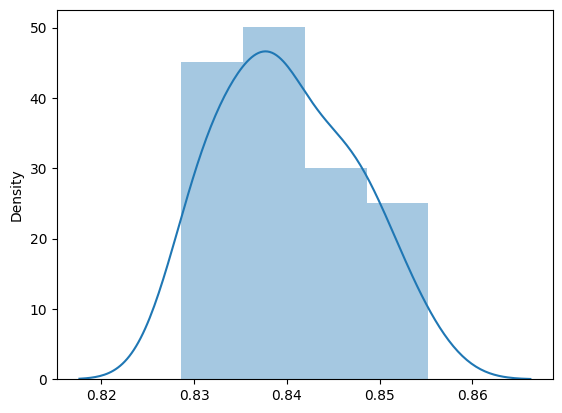

In [ ]:
# Import necessary modules
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Extract the best parameters from RandomizedSearchCV
best_params = rf_random.best_params_

# Initialize the best model with the best hyperparameters from RandomizedSearchCV
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],            # Best number of trees
    min_samples_split=best_params['min_samples_split'],  # Best min samples required to split an internal node
    min_samples_leaf=best_params['min_samples_leaf'],    # Best min samples required at a leaf node
    max_features=best_params['max_features'],            # Best number of features to consider at each split
    max_depth=best_params['max_depth'],                  # Best maximum depth of each tree
    bootstrap=best_params['bootstrap']                   # Best bootstrap sampling setting
)

# Set up the cross-validation method with repeated stratified k-fold
cv = RepeatedStratifiedKFold(
    n_splits=10,                # Number of folds in each round of cross-validation
    n_repeats=3,                # Number of times the cross-validation process is repeated
    random_state=1              # Ensures reproducibility by setting a random seed
)

# Evaluate the model using cross-validation
n_scores = cross_val_score(
    best_model,                 # The model to evaluate
    X_train_scaled,                          # Features dataset
    y_train_smote,                          # Target labels
    scoring='recall',         # Scoring metric to use (accuracy in this case)
    cv=cv,                      # Cross-validation strategy
    n_jobs=-1,                  # Utilize all available processors for parallel computation
    error_score='raise'         # Raise an error if a problem occurs during scoring
)

# Report the performance of the model
#print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print('Recall of Random Forest RepeatedStratifiedKFold: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Plot the distribution of cross-validation scores
sns.distplot(n_scores)


**Observation**
On Application of RepeatedStratifiedKFold on Random forest for recall as Score got the Recall as 84%.

In [ ]:
# Create a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_model.fit(X_train_scaled, y_train_smote)

# Make predictions
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the Accuary an classification report
print(f'Accuracy GradientBoostingClassifier: {accuracy:.2f}')
print('Confusion Matrix GradientBoostingClassifier :')
print(conf_matrix)
print('Classification Report GradientBoostingClassifier:')
print(report)

Accuracy GradientBoostingClassifier: 0.85
Confusion Matrix GradientBoostingClassifier :
[[6363   92]
 [1036   47]]
Classification Report GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6455
           1       0.34      0.04      0.08      1083

    accuracy                           0.85      7538
   macro avg       0.60      0.51      0.50      7538
weighted avg       0.79      0.85      0.80      7538



In [ ]:
# # Extract the components of the confusion matrix for Gradient Boosting Algorithm
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.0143
Type 2 Error Rate (False Negative Rate): 0.9566


In [ ]:
#cross validation on GradientBoostingClassifier on recall
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier

recall_scorer = make_scorer(recall_score, average='macro')

# Perform cross-validation on GradientBoostingClassifier
scores = cross_val_score(gb_model, X, y, cv=5,scoring=recall_scorer)  # as Cross-validation on recall
print("Cross-Validation Recall Scores for GradientBoostingClassifier:", scores)
print("Mean CV Score for Recall GradientBoostingClassifier:", scores.mean())

Cross-Validation Recall Scores for GradientBoostingClassifier: [0.51251974 0.51898831 0.50069089 0.50084959 0.5       ]
Mean CV Score for Recall GradientBoostingClassifier: 0.5066097056389101


**Interpretation:**
The model achieved an overall accuracy of 85%, correctly predicting the target in 85% of cases, but the recall is only 4% out of the actual instances of class 1 (charged off) only 4% was correclty predicting as charged off, rest 96% were wrongly classified as Fully Paid which is Type 2 Error and serious Risk for Lenders.Cross Validation recall Score for GradientBoosting Algorithm is only
50.65% , still not good as compared to Randon forest Repeated Stratified Fold.


In [ ]:
#XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=25, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_classifier.fit(X_train_scaled, y_train_smote)

# Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the Accuary an classification report
print(f'Accuracy XGBClassifier: {accuracy:.2f}')
print('Classification Report XGBClassifier :', report)
print("Confusion Matrix XGBClassifier :\n", conf_matrix)

Accuracy XGBClassifier: 0.82
Classification Report XGBClassifier :               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6455
           1       0.28      0.15      0.19      1083

    accuracy                           0.82      7538
   macro avg       0.57      0.54      0.55      7538
weighted avg       0.78      0.82      0.80      7538

Confusion Matrix XGBClassifier :
 [[6041  414]
 [ 924  159]]


In [ ]:
# # Extract the components of the confusion matrix for XGBClassifier
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate) XGBClassifier: {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate) XGBClassifier: {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate) XGBClassifier: 0.0641
Type 2 Error Rate (False Negative Rate) XGBClassifier: 0.8532


**XGBClassifier** Accuracy XGBClassifier: 0.82 but recall of minority class is just 15% correctly identifies the Charged off (deafult) and rest (85%) it incorrectly classifies as Fully Paid which is a serious risk to Lenders.

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary


-***Analysis of loan_data Given as a Problem Statement***
**The Member_id** is supposed to be Integer but can see Decimal value for Member_id.

**int_rate** is having the symbol % makes it Categorical, % needs to be dropped to make it Float
**emp_length** is categorical value with values example 10+years and <1 year needs to either 10 or 0 per definition of this column Integer.

**revol_util** is having the symbol % makes it Categorical, % needs to be dropped to make it Float

**deling_2yrs** is showing float but it is integer per definition of the column , so needs to be converted to Integer

**inq_last_6mths** is showing float but it is integer per definition of the column , so needs to be converted to Integer

**open_acc** is showing float but it is integer per definition of the column , so needs to be converted to Integer

**pub_rec** is showing float but it is integer per definition of the column , so needs to be converted to Integer

**revol_bal** is having the % character making it categorical, % needs to be dropped to make it Float

**total_acc** is showing float but it is integer per definition of the column , so needs to be converted to Integer

**Term** is showing with months but needs to be converted to Integer per definiton of the column.

***Missing Values***

We have **emp_length** 1036 missing values denoting that some of the
Loan _Seekers may not be employees where they are getting paid on a monthly basis, this should be replaced by the mean or dropped out for proper classification results.

**2.revol_util** has 50 missing values denoting that borrower might not be using the credit on revolving basis and hence these 50 rows can be dropped from the dataframe.

**3.As the missing values percentage in columns emp_length and revol_util** ==> is less than 5%, we can drop the rows instead of imputing them with Mean/Median and or Mode(for Categorical) of the particular column in question

**4.As per the information of the DataFrame we have only 1 integer Column, which is ID , Float datatype we have 12 columns,
1 member_id (Should have been actually Integer)
2 loan_amnt
3 installment
4 annual_inc
5 dti 6 delinq_2yrs
7 inq_last_6mths
8 open_acc
9 pub_rec
10 revol_bal
11 total_acc
12 last_pymnt_amnt Object - categorical values we have 10 columns and are as below as per the DataFrame 0 term (Should have been Integer) 1 int_rate (Should have been Float) 2 grade
3 sub_grade
4 emp_length (Should have been Integer) 5 home_ownership
6 verification_status
7 purpose
8 revol_util (should have been Float)
9 loan_status**

**All above columns looks Good except for emp_length** where we will replace the 10+ years to 10 and < 1 year to 0 per the problem statement requirement given.

**Did not consider converting id, member_id into Integer, as we might be dropping it for EDA**

**Columns which are not available at the time of loan approval  - installment and last_pymnt_amnt**

**Outliers predictions** looking at the describe()
Loan-amt => Q1-1.5IQR = 5500 - 1.5 (15000-5500) = -8750 , not practical so we can ignore as Minimum value is 500.00 and Q3 + 1.5 * IQR = 15000 + 1.5 *(15000-5500) = 29250, all Values above 29250 might be outliers

Term max Value is 60 - so this attribute looks Good without any Outliers

int_rate we may or may not have Outliers for int_rate , need to further analyse and calculate the outliers to be perfect.

emp_length Does not look like having any outliers per definition of this attributte in problem statement

Annula_income does look like having Outliers as Max vlaue is much more than the mean value

dti debt to income ratios - the mean and 50% almost matches , no outliers here most probably

delinq_2yrs all Zero values , so any non zero value can be an outlier for this Attribute

inq_last_6mths the Max value is 8 , might have Outliers

open_acc Max value is 44 - it definitly has Outliers

pub_rec any Non zero value will be an outlier for this attribute

revol_bal max value is too much compared to mean and or 50% , it might have outliers

revol_util anf tot_Acc the mean and 50% are close , they might not have any outliers

**Observation for Object attributes Value B consideres to be at Low risk for Lender and the Freq is more 11408 out of 37687 (atleast 11408 will be Given the approval of loan) sub_grade -A4 is also good 2792 Many of the people are applying loan for the reason of debt_consolidation.**

**Exploratory Data Analysis**

**Univariate Analysis of Categorical Attributes** The borrowers with grades can be B 11408 A 9666 C 7701 D 4999 E 2645 F 970 G 298 for Lending_club the grade A is the highest quality and lowest risk and grade G is lowest quality and high risk for lenders, from the above data looks like we have majority Good grades but other attributes of borrowers needs to be analysed

The borrowers subgrades can be sub_grade A4 2792 B3 2767 A5 2640 B5 2569 B4 2397 C1 2022 B2 1950 C2 1904 A3 1741 B1 1725 C3 1464 A2 1441 D2 1261 C4 1184 C5 1127 D3 1097 A1 1052 D4 913 D1 911 D5 817 E1 718 E2 607 E3 510 E4 425 E5 385 F1 303 F2 232 F3 175 F4 149 F5 111 G1 92 G2 76 G4 54 G3 46 G5 30 Subgrades range from A1 to G5, with A1 being the highest quality and lowest risk, and G5 being the lowest quality and highest risk, we have majority counts present for high quality and lower risk per this loan data.

home_ownership home_ownership RENT 18117 MORTGAGE 16690 OWN 2781 OTHER 96 NONE 3 majority of the borrowers are currently renting or on mortgage for current home.

income_verification_status Not Verified 16287 Verified 11858 Source Verified 9542 majority of loan appliers or borrowers income is not been verified.

purpose of application of loan purpose debt_consolidation 17754 credit_card 4912 other 3714 home_improvement 2808 major_purchase 2084 small_business 1721 car 1459 wedding 916 medical 655 moving 552 house 356 vacation 348 educational 314 renewable_energy 94 majority of the loan application is for debt_consolidation

loan_status loan_status Fully Paid 32296 Charged Off 5391

majority of loan applicants/borrowers have current loan fully paid while rest of them 5391 of them are charged off showing risk for lending club/lenders to approve the loan for them as their previous loan was Charged Off

** univariate analysis for int and float data attributes**
***loan_amt*** majority of the borrowers have applied loan for around  5000,thenforaround 10,000 and the gradually decreases until  30000 and little jump which sound ssuspicious could be outliers as when it increases little for 35,000.

***loan_term*** is more applied for 36 months than 60 months int_rate majority of the borrowers(906) are getting interest_rate for 10.99%.

***emp_length*** majority of the borrowers are having employment period of 10 or more years, increasing the chances of low risk lending for lenders.

***annual_inc***The Annual income between  30,000 and 60,000 is more among borrowers compared to other bins.

***Dept to income ratio*** almost looks like Normal distribution with more Borrowers between 12% to 15% showing average and less borrowers having 27% and 30%, Looks risk free for Lenders to lend money for more Loan appliers/Borrowers. With more in dept analysis we can come to conclusion for safer lending.

** delinq_2yrs*** Very few Borrowers are having more than 30+days past due instances Over a period of 2 years showing safe lending.
***inq_last_6mths***The number of inquiries in the past 6 months (excluding auto and mortgage inquiries) it is in the decreasing order Borrowers between 0 and 1 have more inquiries compared between 1 and 2 and so on.

***open_acc*** The number of open credit lines in the borrower's credit file.its decreasing graph which is a good thing but if we look closly we have more Borrowers having Number of credit lines between 3 and 15 might effect decision of Loan.

***pub_rec*** Number of derogatory public records- as this refers to negative entries on your credit report that are publicly available and indicate financial issues such as Bankrupties, Tax Liens , Judgements, we have more more Borrowers who are having pub_rec 0 pub_rec making it safe for lenders but other factors need to be condsidered as well.
***revol_bal*** Total credit revolving balance this is more for borrowers between 0 and 18000 and decreases further, Other Factors needs to be considered.
***revol_util*** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit ==> the lower utilization rate the better mostly below 30% but the data looks like we have more borrowers having utilization rate between 0 and 20% and is about the same for other borrowers denoting most of the borrowers are utlizating the credit line to the fullest.
***total_acc*** The total number of credit lines currently in the borrower's credit file. The data is right skewed as we have more Borrowers having credit lines between 10 and 20 at peak and gradually decreases.

**Observation of Bivariate Analysis of Categorical VAriables against Loan_Status**

***Grade v/s Loan_status*** Borrowers having Grade B have the highest #(10051)who Fully Paid but they also have highest # of Borrowers who had their Loan defaulted (1357). Borrowers with Grade A is the 2nd highest for Fully Paid (9108) and the default is 558. Where as Borrowers with Grade G (200 Fully Paid and 98 Charged off) is the lowest of all Grades denoting not safe for Lenders.

***Home_Ownership v/s Loan_status*** Borrowers current status of Home_Ownership is more for Rent and then Mortgage and then Own Showing Most of the loan application Lenders get is from people who are currently renting or on MOrtgae of their current living status.

***Verification Status v/s Loan_Status*** if we see Verified and Source_Verified they both could be same and together they show good count for saying borrowers who are verified and source_verifies together are safe to approve loan v/s Not verified.

***Purpose v/s Loan_status Borrowers*** are applying for loan for the major reasons of debt_consolidation, credit_card, other, home_improvement, major_purchase, car, small_Business, wedding, Medical, moving , Vacation,
house and Educational in the above order has majoriy Fully Paid. May be risky to lend a loan for purpose debt_consolidation Charged Off 2679 other Charged Off 592 credit_card Charged Off 510 small_business Charged Off 463 home_improvement Charged Off 328 major_purchase Charged Off 210 car Charged Off 154 medical Charged Off 100 wedding Charged Off 92 moving Charged Off 84 house Charged Off 59 educational Charged Off 52 vacation Charged Off 50 renewable_energy Charged Off 18 Hence this Bivariate analysis alone cannot be considered for coming to a decision. The dataframe needs to be Analysed further.

**Bivariate Analysis loan_status v/s int_rate** shows that int_Rate increases up until 0 to 10% showing that int_rate is reasonable for borrowers to Pay off but Fully Paid count decreases with increase in int_rate above 10%. Need to consider other Factors to come to a conclusion abt what effects int_rate.

** Bivariate Analysis of Loan_Status against Numericla features**

***loan_status v/s loan_amnt*** Looking at the Box Plot Graph it is clear that we have Outliers, Lower bound of Loan_amnt is -8750.0 and Upper Bound is 29250.0 Median is 10,000 for both Fully Paid and Charged off and lot of Outliers exists above 30,000 for Fully Paid and for Charged off the Outliers are fe and above around 34,000.

***loan_status v/s Term*** The majority of loan terms fall within the interquartile range (36 to 60).The median loan term is around 36. There is at least one loan term that is significantly higher than the others, identified as an outlier.

***loan_status v/s int_rate*** The median for Fully Paid is 11.50 and for Charged off is 13.75 , Outliers for Fully Paid 22% and for Charged off is 23.75%.

***loan_status v/s emp_length*** Cannot see any outliers for both Fully_Paid and Charged_Off. The median for Fully Paid is 4 years and Median for Charged_off is 5 years.

***loan_status v/s dti*** There are no Outliers for Both Fully_Paid and Charged_Off with respect to Depth to Income ratio. The median for Fully_Paid is 13% and Charged_off is 14%.

***loan_status v/s inq_last_6mths*** The median of # of inquires past 6 months for Fully_Paid is None but for Charged_Off is 1. There are outliers though found for Fully Paid above 3 and above 5 for Charged_Off.

***loan_status v/s open_acc and total_Acc*** The median for Both Fully Charged and Charged off is about the same 11 open credit lines and outliers for both exist above 21 credit lines. Similarly for total_Acc.

***loan_status v/s revol_bal*** The median for both Fully Paid and Charged_Off is $9000 total amount of debt that the borrower currently owes on their revolving credit accounts.Outliers for Both above #39000.

***loan_status v/s revol_util*** It is a measure of how much of the borrower's available revolving credit (such as credit cards) is currently being used. For fully Paid the Mean is 45% and Charged Off it is 55%. Cannot see any outliers.

**Observation of int_rate against Numerical Features***

We see outliers in loan_amnt , open_acc, Total_acc, inq_last_6mnths, revol_util has lowed bound outliers below 5% on 15% int_rate, revol_bal Outliers above about 30000 for between 0 to 5 int_rate , above 38,000 between 5 to 10% int_rate, above 40,000 between 10 to 15%, above 45000 betweeb 15 to 20%.

**Heat Map Observations**
***total_Acc and opne_Acc***
Highly correlated features - the Relation between total_acc and open_acc is high at 69% , showing thatas the number of total accounts increases, the number of open accounts tends to increase as well, For lenders, this could indicate that borrowers with more total accounts are likely to have more open accounts, which might affect their creditworthiness and risk profile. However, the specific threshold for considering this correlation as "high" can vary depending on the lender's criteria and the context of the analysis. As per the assumption that this correlation is high we can consider dropping either total_acc or open_acc to avoid redundancy and this decision can be taken based on the Domain Knowledge, for Model to better perform. inour case it is better to keep open_acc as it shows borrowers recent history on credit lines(borrowers current financial status) as compared to total_acc.

the relation between int_rate and revol_util is moderaetly high at 47%

, the relation between int_rate and term is moderatly high at 44% denoting that as the term is longer the int_rate increase moderately and Vice versa meaning on term as 36 months the int_rate will be lower compared to term of 60 months.


***Observation of grade with int_rate by the above it shows that with GRADE A the int_rate is less compared to GRADE 'G' with intrate and int_rate - increases in asending order. AS GRADE AND SUBGRADE AND having the same behaviour on INT_RATE we can drop sub_grade to reduce multicolinearty***
***Droping sub_grade and keeping grade*** as they are highly correlated and would come to same conclusion with respect to int_rate and loan_status.the correlation between grade and sub_grade is 0.9949537585887042 ~~ 99.50%

**Dropping the highly correlated features**
total_acc, sub_grade

**Observation Grade A and int_rate** are negatively corelated with -0.74 meaning as for grade A Customers the int_rate is 74% less compared to other Grades.

**int_rate and revol_util** is positively correlated denoting More credits increases int_Rate moderately increases It is a measure of how much of the borrower's available revolving credit (such as credit cards) is currently being used.

**int_rate and term** higher the term higher the intereste rate, positively correlated.

**loan_amnt and Verification_status_verified** Borrower gets more loan_amnt if status is verified.

***Build Model**
Observation Followed the below Steps/n

1.Split Data: Split the original dataset into training and testing sets.

2.Apply SMOTE: Apply SMOTE to the training data only, as if we apply smote on test data the results will be Over optimistic as we do no want that to Happen , we evaluate the model using original imbalanced Test data

3.Scale Data: Scale both the training (after SMOTE) and testing data.

4.Train Model: Train the model on the resampled and scaled training data.

5.Evaluate Model: Evaluate the model on the original, imbalanced test data.

**Train-Test-Split**
Train Data (30149, 41)
Test data (7538, 41)
***Applying SMOTE After Train Test Split***
appling SMOTE after the train-test split to avoid data leakage and ensure realistic model evaluation.
Split the data, apply SMOTE to the training set, and then train and evaluate the model.
By following this approach, we can ensure the integrity of my model evaluation and improve its performance on real-world data.

Observation The samples reduced from 30149 for training dataset to 25841 after SMOTE as only for Training as Test_size used is 0.2 meaning 80% for Training and 20% for Testing dataset.
*** Using SMOTE we balanced the imbalanced dataset and got 25841 for each category of loan_status ... meaning 25841x2 = 51,682 Out of which we are using 80% to Train the Model and 20% for testing the Model so far looks good.

***Scaling***
# need to perform scaling as to ensure Consistent Feature Range , to Improve Model Performance, Prevents data Leakage(scaling shld be done on train
# and Test data seperately
Train data (51682, 41)
Test Data (7538, 41)

***Building Logistic Regression***
Class 0:Fully Paid

Precision (0.86): Out of all the predictions made for class 0, 86% were correct.

Recall (1.00): Out of all the actual instances of class 0, 100% were correctly identified.

F1-Score (0.92): This balances precision and recall, indicating a good overall performance for class 0.

Support (6455): There were 6455 instances of class 0 in the actual dataset.

Class 1:CHarged Off

Precision (0.56): Out of all the predictions made for class 1, 56% were correct.

Recall (0.02): Out of all the actual instances of class 1, only 2% were correctly identified. This indicates that the model is not performing well for class 1.

F1-Score (0.03): This combines precision and recall, indicating poor performance for class 1.

Support (1083): There were 1083 instances of class 1 in the actual dataset.Which is way lesser than Class 0 showing Imbalance.

Overall Metrics:

Accuracy (0.86): The model correctly classified 86% of the samples in the dataset.

Macro Average:

Precision (0.71), Recall (0.51), F1-Score (0.48): These are the unweighted averages of precision, recall, and f1-score across all classes.

Weighted Average:

Precision (0.82), Recall (0.86), F1-Score (0.79): These averages take into account the support (number of instances) for each class, providing a more balanced evaluation.

Summary: Class 0: The model performs exceptionally well, with high precision, recall, and f1-score.

Class 1: The model struggles with class 1, especially in terms of recall, indicating a high number of false negatives. tp/(tp+fn)

Overall Performance: The high accuracy is primarily driven by the model's performance on class 0, but there is room for improvement in handling class 1.

Insights: Imbalance: The dataset appears to be imbalanced, with a much larger number of instances for class 0 compared to class 1. This could be one reason for the poor performance on class 1. which is expected as we did not Balance the test dataset, we will see if any other models performs well with the same Steps.

High Precision indicates a low False positive rate TP/(TP+FP). High Recall indicates a low False negative rate TP/(TP+FN) F1-Score - Weighted Average of precision and recall. It provides a balance between precision and recall.==> Support - The number of actual occurrences of the class in the dataset.

The Train data is balanced hence giving more Accuracy and Classification report looks much better than Test dataset.

Decision on Overfitting or underfitting On evaluation found that the Metrics for Both Training and Test data are about the same showing that the model fits/genralizes well without Overfitting or underfitting the data.

**Conponents of the confusion matrix for Logistic Regression**
Type 1 Error (False Positive): is 0.2% This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies that a loan is defaulted Chargded Off where as actually it is fully Paid. This could lead to lenders taking incorrect decision of not approving the loan to valid borrowers.or approving with higher interest rates impacts Customer relationship and reduce potential profits in safe loans or this might let lenders loose the customers to other lenders.

Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."

Example: The model incorrectly classifies a loan to be default to not to be default. This is more serious, as it could lead to lenders to lend money to borrowers who is not going to repay the Loan. This is typically more severe because it means failing to identify high-risk loans. The result can be significant financial losses due to defaults, impacting the institution's profitability and financial stability.

***precision recall curve as we have imbalanced dataset for test data***
Observation The curve starts with a high precision of 1.0 and a recall of 0.0.

As recall increases, precision drops sharply to around 0.6 when recall is approximately 0.1.

The curve then levels off at a precision of around 0.2 for the remaining recall values up to 1.0.

This shows the model performs in terms of precision and recall at various thresholds. A steep drop in precision indicates that as the model tries to capture more relevant instances (higher recall), it also starts capturing more irrelevant instances, thereby reducing precision.

**ROC Curve**
Interpreation

AUC of 0.51 : Evaluates the trade-offs between True Positive Rate and False Positive Rate at different thresholds. Diagonal Line: The curve in the image is a straight diagonal line from the bottom-left corner (0,0) to the top-right corner (1,1). This diagonal line represents a model that performs no better than random guessing. In other words, it has no discriminative power.

***Mean CV Score for Logistic Reg: 0.9080384857695056 ~ 91%
Interpretation of Cross Validation Cross-Validation Mean Score (0.91) Purpose: The cross-validation mean score (0.91) represents the average performance of my model on different subsets of the training data.

Indication: This high score suggests that my model performs well on the training data when evaluated using cross-validation, indicating good fitting to the training data.

Test Data Accuracy (0.86) Purpose: The test data accuracy (0.86) represents my model's performance on an unseen dataset that was not used during training or cross-validation.

Indication: This score is lower than my cross-validation mean score, suggesting that my model's performance drops when exposed to new, unseen data.

Interpretation Possible Overfitting:

My model may be overfitting the training data, capturing noise and specific patterns that do not generalize well to new data. This often results in a high training score (or cross-validation score) but a lower test score.

Data Distribution Differences:

There could be differences in the distribution of the training and test datasets. If the test data is not representative of the training data, the model may struggle to generalize.

Model Complexity:

The complexity of my model might be too high. Complex models can fit the training data very well but fail to generalize to new data. I should Consider simplifying the model or applying regularization.

Next Steps to Address Overfitting Regularization: Apply techniques like L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting.

Feature Engineering: Ensure that the features used are relevant and contribute to the model's predictive power.

Cross-Validation: Using techniques like stratified k-fold cross-validation to ensure a more representative evaluation of model performance.

Simplify Model: Reducing model complexity by using fewer features or a less complex algorithm.

** Log Loss for Logistic Regression**
Contextualizing 0.3817582618985071 ok Performance: A log loss of approximately 0.38 suggests that my model's predictions are reasonably accurate but not perfect. It's better than random guessing but indicates room for improvement.

Impact of Log Loss Model Evaluation: A log loss around 0.38 implies that my model is making some incorrect predictions but is still fairly reliable but performs bad for Class 1: Loan_status as Charged_off per precison and recall and F1 score on the Test data, need to choose another Model or Grid search or randomized search or applying Regularization(Lasso and Ridge)


**Observation of Logistic Regression with GridSearchCV** used GridSearchCV for logistic regression model with bet parameters with 5 cross Validation and used recall as score as we need to improve Type 2 Errors (reducing the False Negatives). Out of all the actual instances of class 1, 82% were correctly identified. This indicates that the model is performing quite well for class 1 and also Class 0.

**Logistic regression with balanced class weight and hyperparameter tuning**
***RandomizedSearchCV and PolynomialFeatures***
Degree 2, Penalty l2==> Ridge, # of iterations 10, scoring for Recall and F1.
Again the recall score on the training dataset is 84.77% but recall score on Test data is just 43.77% denoting out of actual instances of class 1(Charged off) only 43.77% were correctly identified as charged -off and remianing 56.23% were identified as Fully Paid  which is type 2 Error Causing serious risk for Lenders as they will lean towards lending the loan to borrowers who might not repay the loan.

**Naive Bayes Classifier**

Performs better than Plain Logistic regression for the first 10 Principal Components
***Naive Bayes is performing better on Minority Class 1*** - Charged off as compared to Logistic regression as we can see Recall which shows the of the actual instances of class 1 42% were correctly identifed as Defaulted (Charged off) performing better than logistic regression which had only 2%.

The goal is to identify the loan is deafulted or not. How efficient is this model in doing that?

To answer this, let's understand about Type 1 and Type 2 errors.

***Observation with 10 Principal Components***

Type 1 Error (False Positive): is 24% This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies that a loan is defaulted Chargded Off where as actually it is fully Paid. This could lead to lenders taking incorrect decision of not approving the loan to valid borrowers.or approving with higher interest rates impacts Customer relationship and reduce potential profits in safe loans or this might let lenders loose the customers to other lenders.

Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."

Example: The model incorrectly classifies a loan 58% to be default to not to be default. This is more serious, as it could lead to lenders to lend money to borrowers who is not going to repay the Loan. This is typically more severe because it means failing to identify high-risk loans. The result can be significant financial losses due to defaults, impacting the institution's profitability and financial stability.

Mean Cross-Validation score of Naive Bayes for recall 56% than the recall of the Test 42% even with 20 folds which is still not accurate as model correctly idenfies 56% of defauled making the rest still incorrectly predicting as not deafulted.

**Decision Tree Classifier**
***it gives the same result with gini impurity and information gain i.e. entropy***
Accuracy being at 75.80%
As we are interested in recall , it correctly identifes 24%  as Defaulted (Charged off) performing better than logistic regression which had only 2%.
but the rest of 76% it incorrectly classifies as not- dafaulted which is Type 2 error and serious probelm for the lendign company.Mean Cross-Validation score of Decision tree for recall 53% than the recall of the Test 24% with 5 folds which is still not accurate as model correctly idenfies only 53% of defaulted making the rest still incorrectly predicting as not deafulted.

**Random Forest Classifier**
Accuracy of Random Forest: 0.85, performs very well on majority class but not on the minority class as Recall is 4% meaning it correctly identifies the Charged off (deafult) and rest (96%) it incorrectly classifies as Fully Paid which is a serious risk to Lenders.

***Random Forest with Hyperparameter Tunning and Cross Validation RepeatedStratifiedKFold with recall Score, CV parameters as 10 splits and 3 repeats the Recall Score came as 84%***
which is the best so Far we Evaluateda and the distribution Looks Normal.

**Interpretation:for Gradient Boosting Algorithm**
The model achieved an overall accuracy of 85%, correctly predicting the target in 85% of cases, but the recall is only 4% out of the actual instances of class 1 (charged off) only 4% was correclty predicting as charged off, rest 96% were wrongly classified as Fully Paid which is Type 2 Error and serious Risk for Lenders.Cross Validation recall Score for GradientBoosting Algorithm is only
50.65% , still not good as compared to Randon forest Repeated Stratified Fold.

**XGBClassifier**
Accuracy XGBClassifier: 0.82 but recall of minority class is just 15% correctly identifies the Charged off (deafult) and rest (85%) it incorrectly classifies as Fully Paid which is a serious risk to Lenders.

**Of all the above Model predictions Randon forest with Repeated Stratified Fold is performing better for Recall of Minority class**On the downside it could be computatioanly Expensive and consume lot of memory but with a
Mean Accuracy: 0.85 and Mean Recall: 0.84
shows it preforms consistenly well across different folds with reasonable recall and precision, making it suitable for a balanced classification problem.


---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.